<a href="https://colab.research.google.com/github/Gitstrong3333/MachineLearning_Projects/blob/main/Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

In [ ]:
# Attribute Information: Column descriptions

In [ ]:


    ID                    :Customer ID

    Age                   :Customer's age in completed years

    Experience            :#years of professional experience

    Income                :Annual income of the customer ($000)

    ZIPCode               :Home Address ZIP code

    Family                :Family size of the customer

    CCAvg                 :Avg. spending on credit cards per month ($000)

    Education             :Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

    Mortgage              :Value of house mortgage if any. ($000)

    Personal Loan         :Did this customer accept the personal loan offered in the last campaign?

    Securities Account    :Does the customer have a securities account with the bank?

    CD Account            :Does the customer have a certificate of deposit (CD) account with the bank?

    Online                :Does the customer use internet banking facilities? CreditCard Does the customer
    Credit card           :uses a credit card issued  by UniversalBank?

In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Bank_Personal_Loan_Modelling.csv'  # adjust if it's in a subfolder
bank_per_loan_df = pd.read_csv(file_path)

bank_per_loan_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
### Acknowledgements
#This data set was given as part of course in machine learning. I have also added my observations on the data. I thank Great Learning and my faculty for giving an opportunity to work on this dataset.

In [ ]:
### Inspiration

In [ ]:
#Study the data distribution in each attribute, share my findings. Used a classification model to predict the likelihood of a liability customer buying personal loans.

In [ ]:
### Technologies & Libraries

In [ ]:
#Python3

  #  Logistic Regression ; KNN Classifier ; Naive Bayes ; SVM ; Metrics ; Preprocessing ;

   # Pandas ; NumPy ; Matplotlib ; SeaBorn ; SKLearn ; SciPy ; Statsmdels ; Copy ; OS ; re ; traceback ; string , Scikitplot;







In [8]:
## Necessary libraries are imported

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import os
import statsmodels.api as sm
import scipy.stats as stats
import copy
import pandas.core.algorithms as algos
from pandas import Series
import re
import traceback
import string
#import scikitplot as skplt
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.model_selection import FeatureImportances

In [4]:
%pip install scikit-learn

In [5]:
%pip install scikit-plot
import scikitplot as skplt


ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.12/dist-packages/scipy/__init__.py)

In [1]:
# 1. Reinstall scikit-plot to reset any broken edits
!pip install --force-reinstall scikit-plot

# 2. Patch scikitplot/metrics.py to replace scipy.interp with numpy.interp
import fileinput

metrics_file = "/usr/local/lib/python3.12/dist-packages/scikitplot/metrics.py"

with fileinput.FileInput(metrics_file, inplace=True) as file:
    for line in file:
        # replace ONLY the bad import line
        if "from scipy import interp" in line:
            print("from numpy import interp")
        else:
            print(line, end="")  # preserve file formatting correctly

# 3. Now try importing again
import scikitplot as skplt
print("✅ scikitplot is patched and ready to use!")


  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cach

KeyboardInterrupt: 

In [1]:
# 1. Reinstall fresh copy of scikit-plot
!pip install --force-reinstall scikit-plot

# 2. Patch all scikitplot files that import scipy.interp
import fileinput, glob

for filepath in glob.glob("/usr/local/lib/python3.12/dist-packages/scikitplot/*.py"):
    with fileinput.FileInput(filepath, inplace=True) as file:
        for line in file:
            if "from scipy import interp" in line:
                print("from numpy import interp")
            else:
                print(line, end="")

# 3. Test import
import scikitplot as skplt
print("✅ scikitplot patched across all files and ready to use!")


  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp312-cp312-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached numpy-2.3.2-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cach

✅ scikitplot patched across all files and ready to use!


In [ ]:
# Question 1: Read the column description and ensure you understand each attribute well

In [3]:
print(bank_per_loan_df.columns)
print(bank_per_loan_df.shape)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
(5000, 14)


In [4]:
##### Observation

3We have 13 independent variables and 1 dependent variable i.e. ‘Personal Loan’ in the data set. Also, we got 5000 rows which can be split into test & train datasets.

SyntaxError: invalid character '‘' (U+2018) (ipython-input-4136227808.py, line 2)

In [5]:
bank_per_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
    ##### Observation
    #No Missing Values

In [6]:
bank_per_loan_df.isna().apply(pd.value_counts)   #null value check

/tmp/ipython-input-3581909313.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  bank_per_loan_df.isna().apply(pd.value_counts)   #null value check


ID   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
False  5000  5000        5000    5000      5000    5000   5000       5000   

       Mortgage  Personal Loan  Securities Account  CD Account  Online  \
False      5000           5000                5000        5000    5000   

       CreditCard  
False        5000

In [ ]:
    ##### Observation
    #No Null values

In [ ]:
bank_per_loan_df.duplicated().any()

np.False_

In [ ]:
##### Observation
    #No duplicate  records

In [ ]:
   #Observation
   # Column 'Experience' has negative values

   # Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data

   # Ordinary Cat variables "Family" and "Education" are clean too

In [ ]:
#Replacing the negative values with the mean value of the column

In [ ]:
any(bank_per_loan_df['Experience'] < 0)

True

In [ ]:
exp_med = bank_per_loan_df.loc[:,"Experience"].median()
print(" Experience median is", exp_med)
bank_per_loan_df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)

 Experience median is 20.0


In [ ]:
any(bank_per_loan_df['Experience'] < 0)

True

In [ ]:
bank_per_loan_df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

In [ ]:
# Question2: Study the data distribution in each attribute, share your findings.

In [ ]:
##### Finding: ( analysis is shown below)

#1). ID: This attribute can be dropped.Though the data distribution is normal.

#2). Age:Three small peaks can be indicating three values of age would be slightly more in number.However, the mean and median of the attribute is equal.The distribution is in considerable shape.

#3). Eductaion : Mean and median is almost equal. Data is finely distributed. A few peaks shows different values dominance.

#4). Income : We can clearly see data is highly left skewed.Data for less income customers is more in the sample.

#5). ZIP Code: The attribute has sharp peaks telling the data from particular places are collected more.Spread is also less in the sample. More data from different places can be collected.

#6).Family: It has 4 peaks(4 values) , families with least member is highest in the sample.

#7).Mortage: This attribute is highly left skewed with a very high peak on the left telling us that most customer are having least mortage while a very few have some mortage.

#8).Securities Account : This attributes tells us that majorly cutomers are not having Security account.

#9).CD account: Most of the customers dont have CDaccounts.

#10).Online: Higher number of customers use online banking in the sample.

#11).Credit Card: This attribute has less customers using CC in comparison to the CC users.


In [ ]:
# Univariate Analysis of the continuous variables - 1

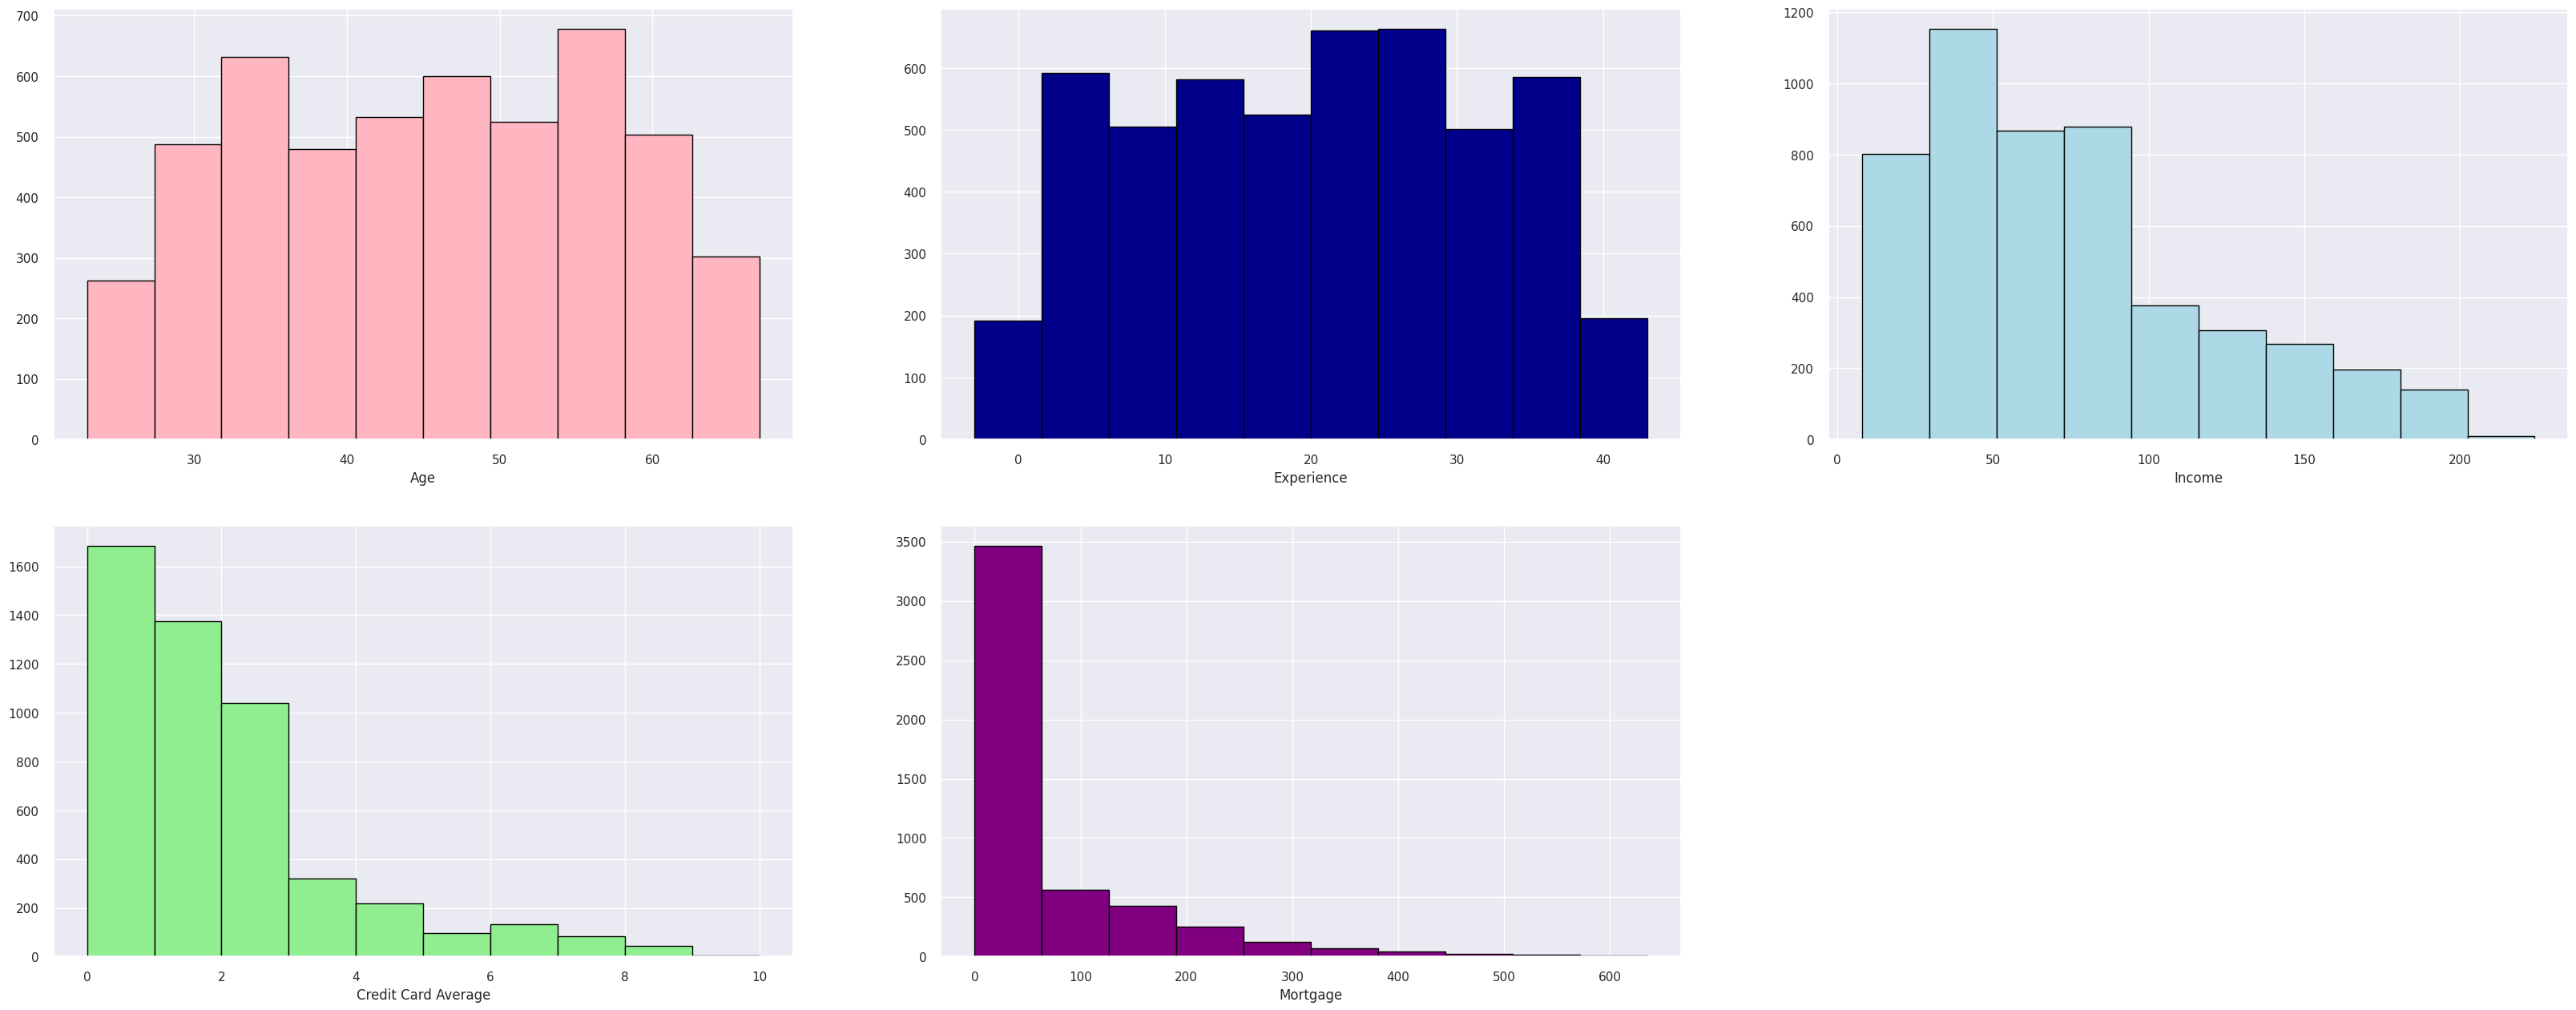

In [ ]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(bank_per_loan_df.Age, color='lightpink', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(bank_per_loan_df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(bank_per_loan_df.Income, color='lightblue', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(bank_per_loan_df.CCAvg, color='lightgreen', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(bank_per_loan_df.Mortgage, color='purple', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

In [ ]:
   # Age & Experience seems to be quiet normally distributed

    #Income, CC Average & Mortgage are highly skewed



In [ ]:
# Checking for Skewness of data
Skewness = pd.DataFrame({'Skewness' : [stats.skew(bank_per_loan_df.Age),stats.skew(bank_per_loan_df.Experience),stats.skew(bank_per_loan_df.Income),stats.skew(bank_per_loan_df.CCAvg)
                                      ,stats.skew(bank_per_loan_df.Mortgage)]},index=['Age','Experience','Income','CCAvg','Mortgage'])
Skewness

Skewness
Age        -0.029332
Experience -0.026317
Income      0.841086
CCAvg       1.597964
Mortgage    2.103371

In [ ]:
   # Age and Experience seems to be quiet Symmetrical

   # Income, CCAvg and Mortgage are Positively skewed, as they are highly skewed there will be quiet a lot of extreme values

In [ ]:
# Univariate Analysis of the continuous variables - 2

<Axes: xlabel='Mortgage'>

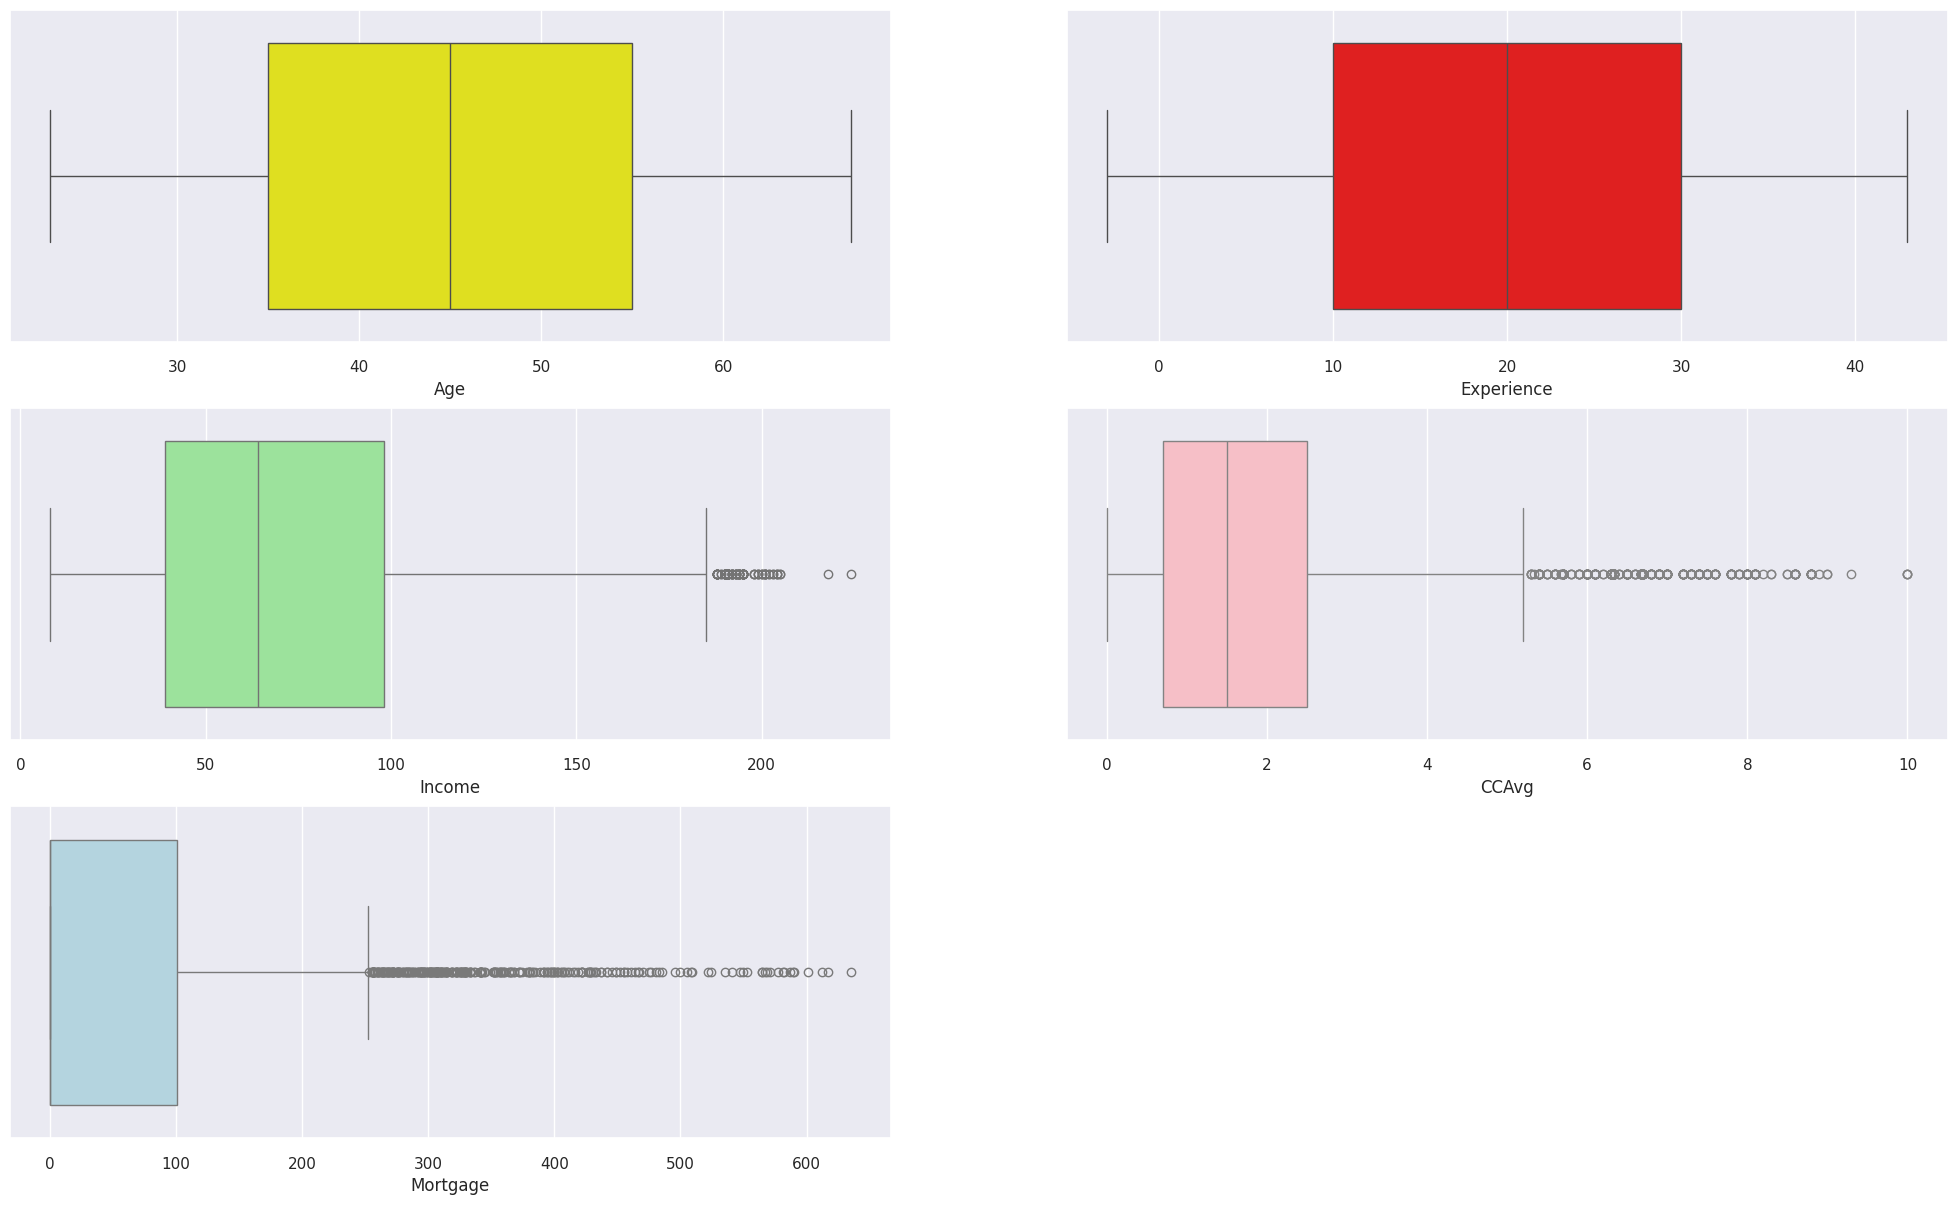

In [ ]:
plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= bank_per_loan_df.Age, color='yellow')

plt.subplot(5,2,2)
sns.boxplot(x= bank_per_loan_df.Experience, color='red')

plt.subplot(5,2,3)
sns.boxplot(x= bank_per_loan_df.Income, color='lightgreen')

plt.subplot(5,2,4)
sns.boxplot(x= bank_per_loan_df.CCAvg, color='lightpink')

plt.subplot(5,2,5)
sns.boxplot(x= bank_per_loan_df.Mortgage, color='lightblue')

In [ ]:
   # Age feature is normally distributed with majority of customers falling between 35 years and 55 years of age. We can infer from the boxplot above, and also in info attained from describe() shows mean is almost equal to median.

   # Experience is normally distributed with more customer having experience starting from 11 years to 30 Years. Here also the mean is equal to median.

    #Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.

    #CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K.

   # Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K.



In [ ]:
# Univariate Analysis of the categorical variables

Text(0.5, 1.0, 'Credit Card Distribution')

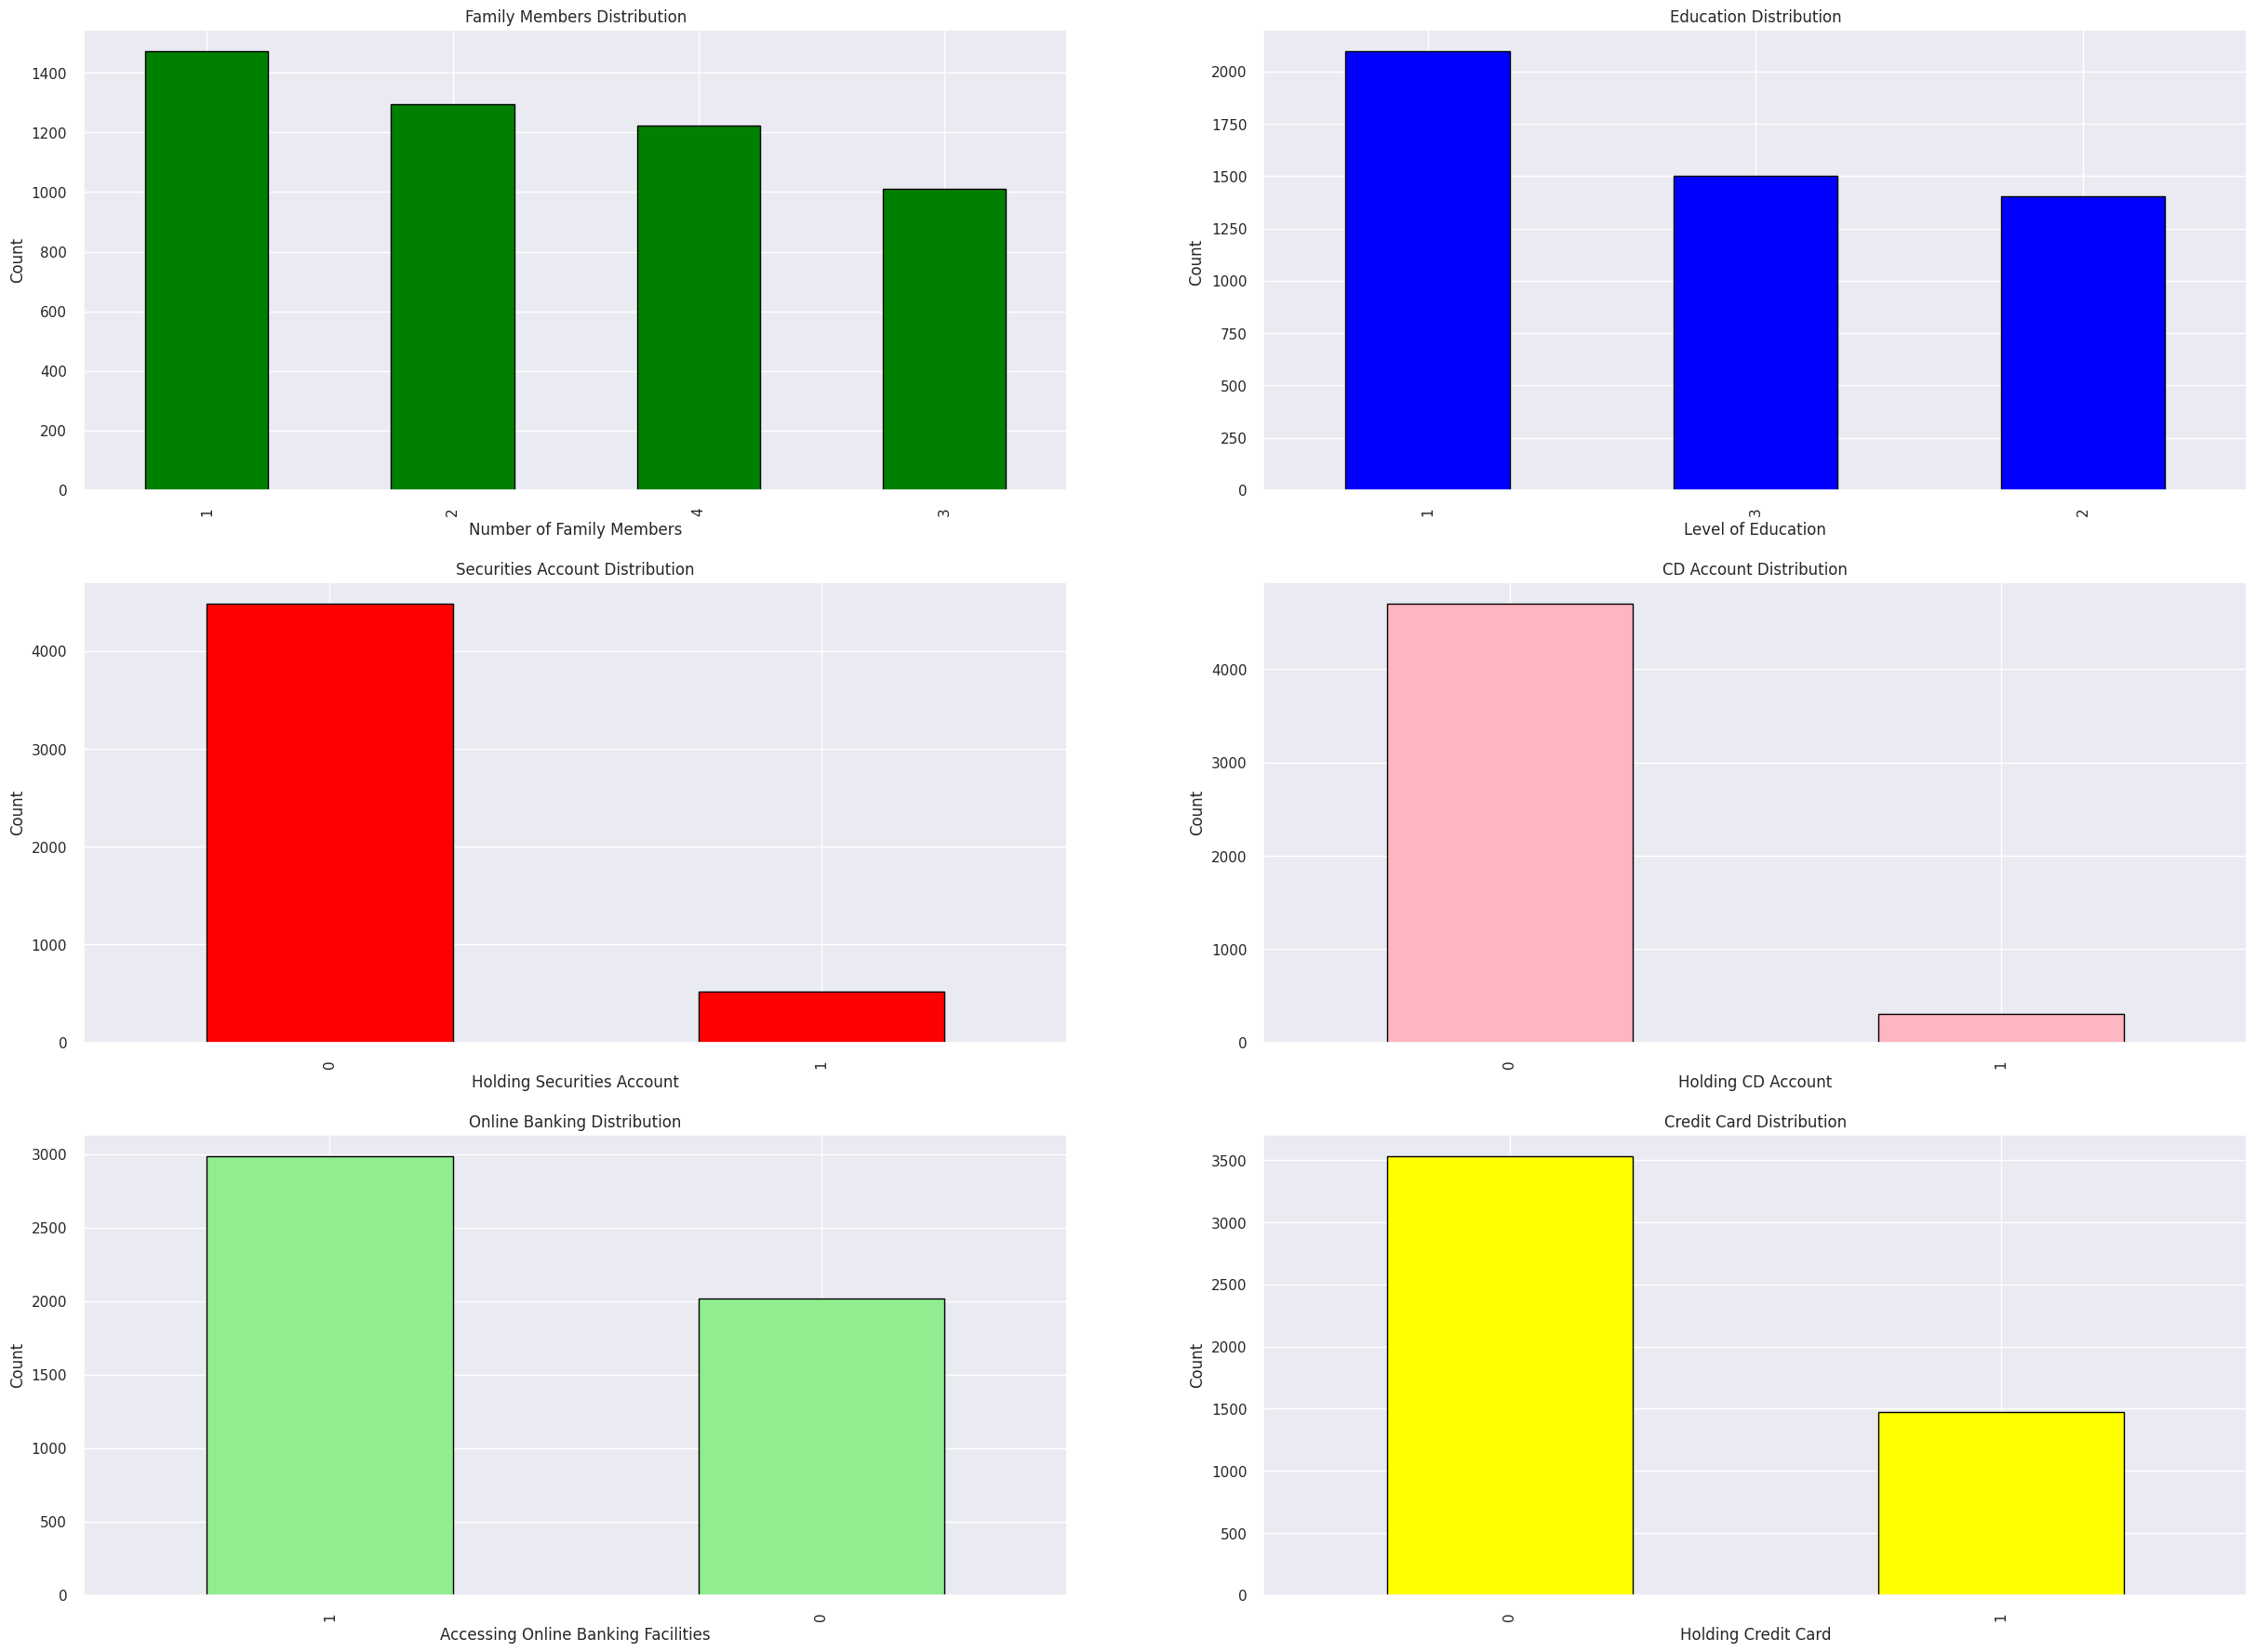

In [ ]:
plt.figure(figsize=(30,45))

plt.subplot(6,2,1)
bank_per_loan_df['Family'].value_counts().plot(kind="bar", align='center',color = 'green',edgecolor = 'black')
plt.xlabel("Number of Family Members")
plt.ylabel("Count")
plt.title("Family Members Distribution")

plt.subplot(6,2,2)
bank_per_loan_df['Education'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')

plt.subplot(6,2,3)
bank_per_loan_df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'red',edgecolor = 'black')
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')

plt.subplot(6,2,4)
bank_per_loan_df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'lightpink',edgecolor = 'black')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")

plt.subplot(6,2,5)
bank_per_loan_df['Online'].value_counts().plot(kind="bar", align='center',color = 'lightgreen',edgecolor = 'black')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")

plt.subplot(6,2,6)
bank_per_loan_df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'yellow',edgecolor = 'black')
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("Credit Card Distribution")

In [ ]:
##### Observations
    #The variables family and education are ordinal variables. The distribution of families is evenly distributed
    #It seems that many of the population is not holding Securities Account and CD Account, vast difference is visible

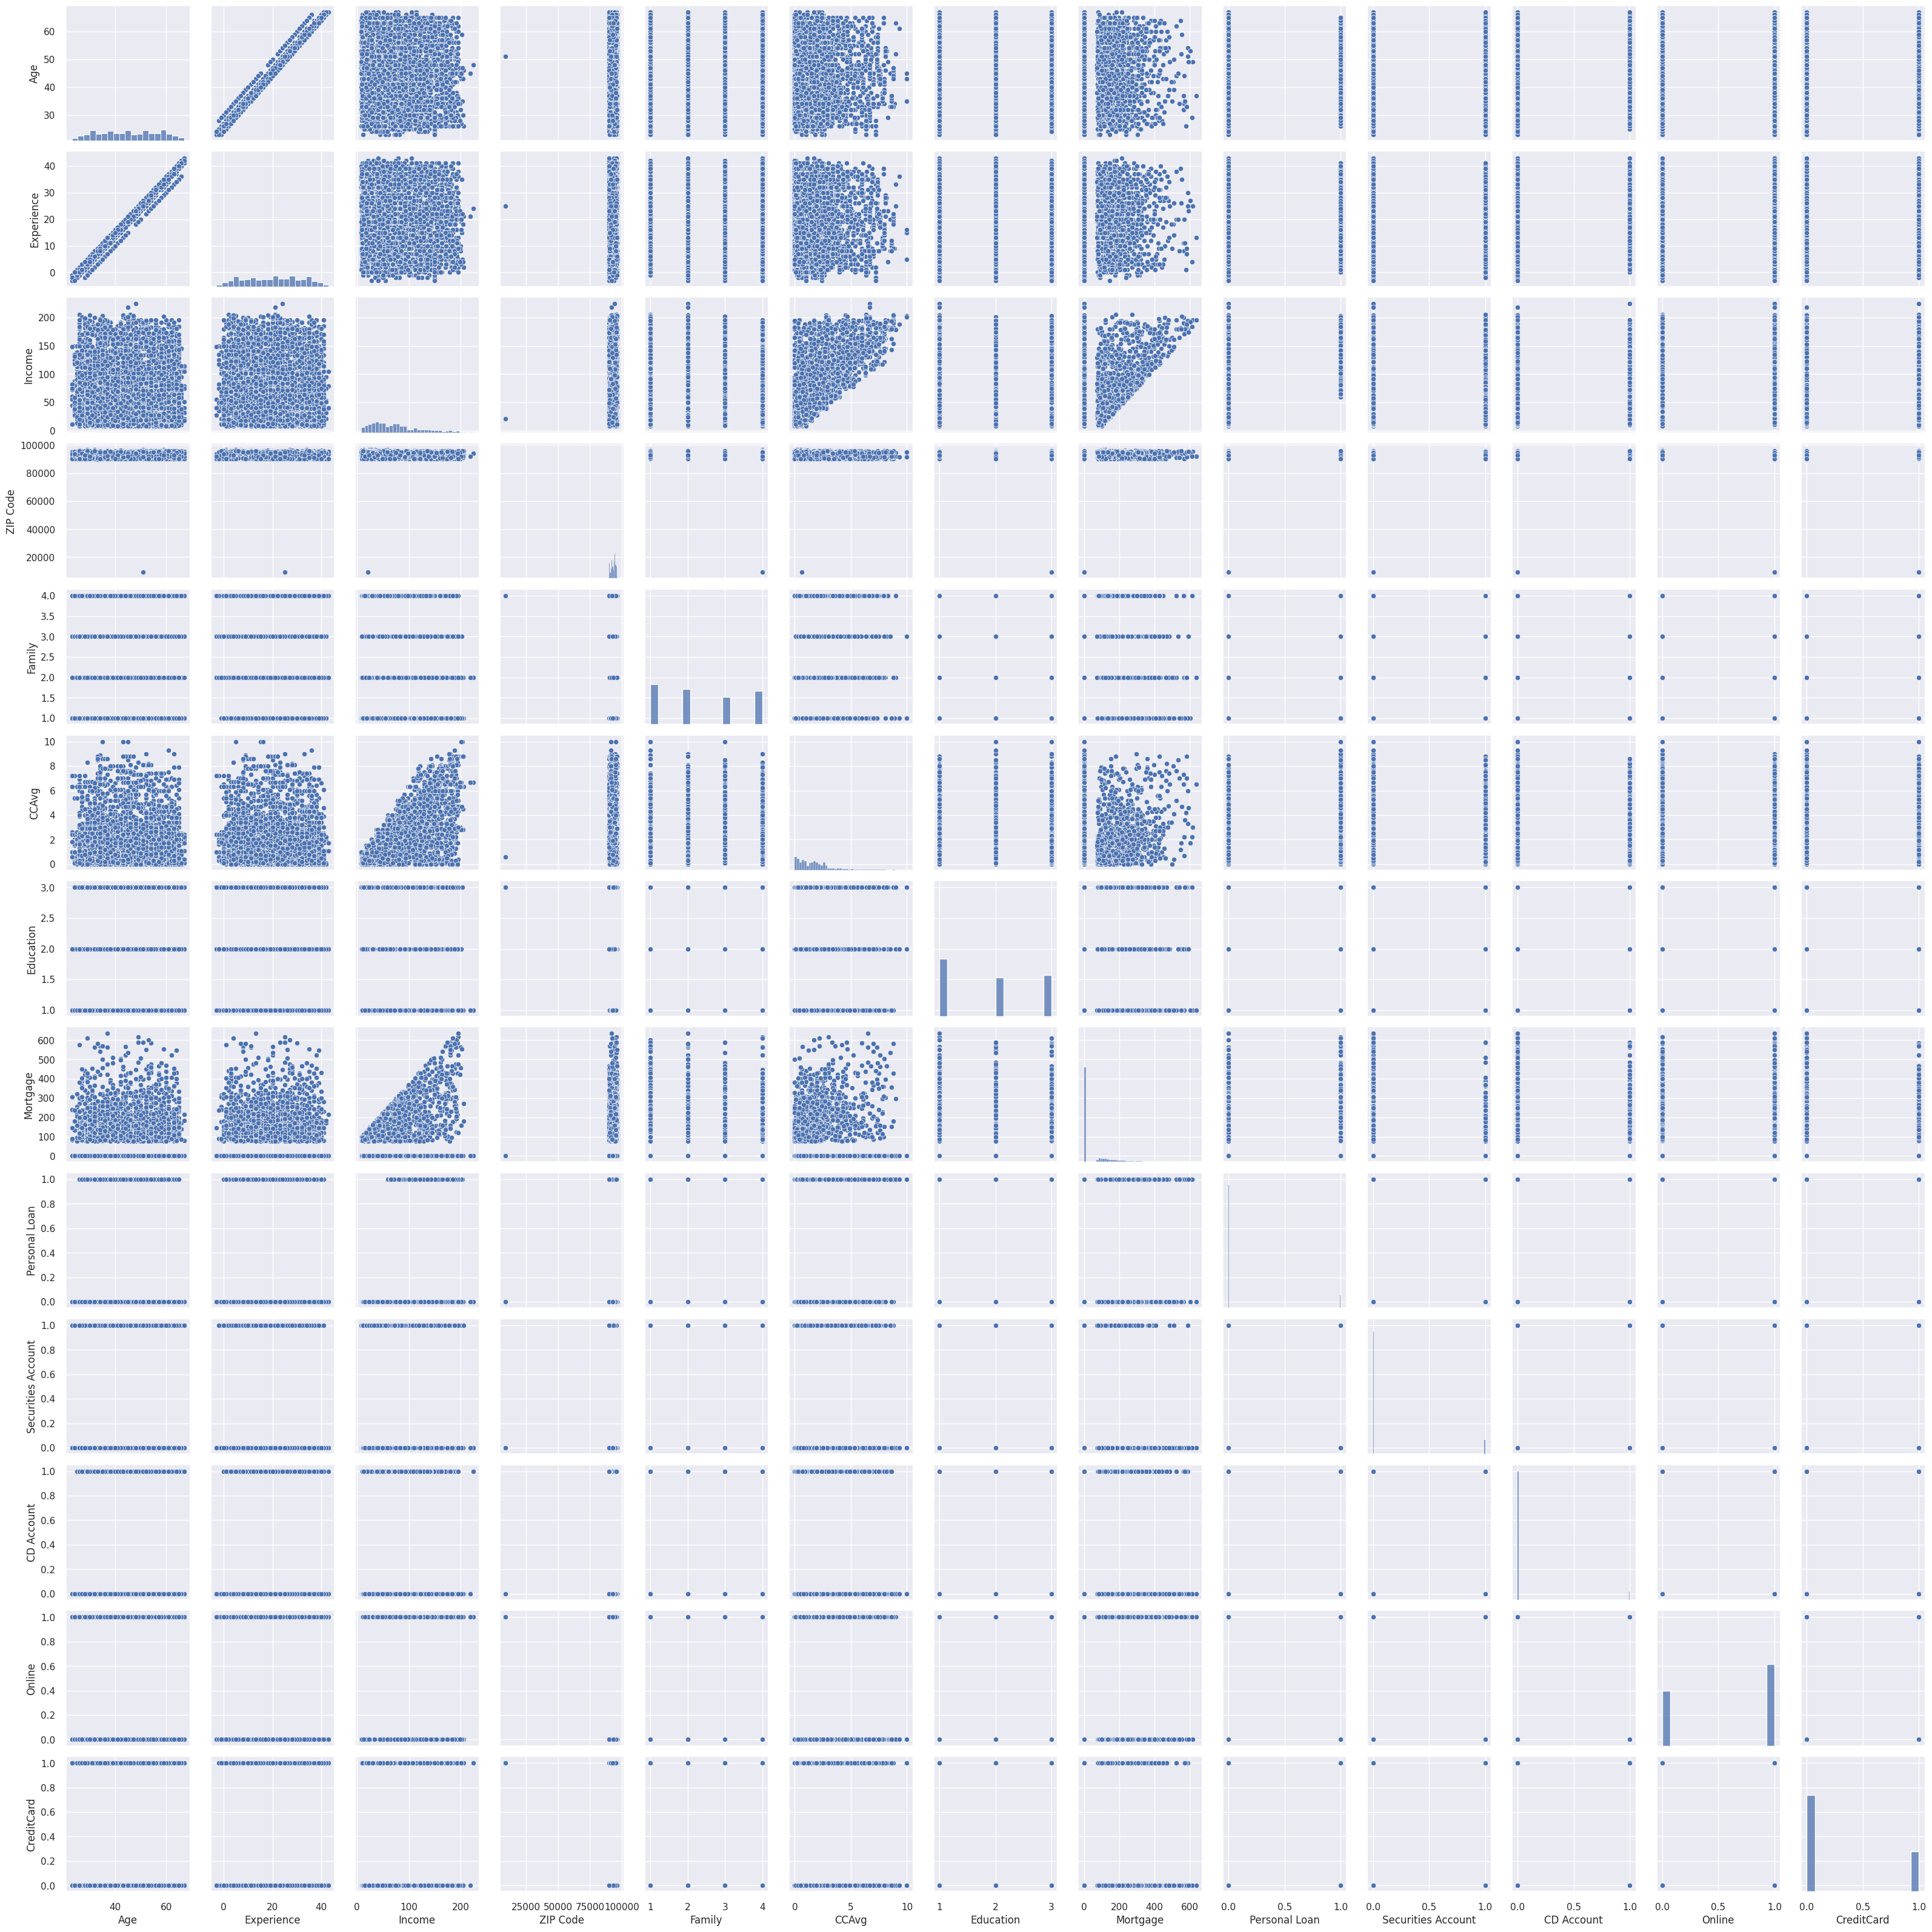

In [ ]:
#Pairplot
sns.pairplot(bank_per_loan_df.iloc[:,1:])

In [ ]:
    #'Age' has an association with 'Experience

   # Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median


    #Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.


    #Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

   # CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

    #Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

    #The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [ ]:
# Dependant variable analysis

In [ ]:
bank_per_loan_df["Personal Loan"].value_counts().to_frame()

count
Personal Loan       
0               4520
1                480

<Axes: xlabel='Personal Loan'>

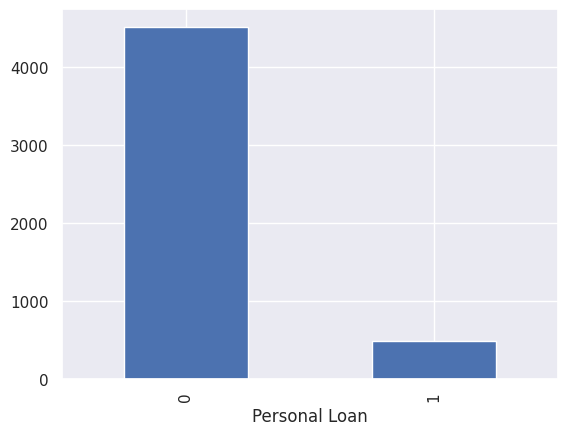

In [ ]:
pd.value_counts(bank_per_loan_df["Personal Loan"]).plot(kind="bar")

In [ ]:
# Bivariate Analysis

In [ ]:
#Hypotheses based on the data and loan awarness:

    3-High salaries are less feasible to buy personal loans while customers with medium or low salaries are more feasible for buying personal loans.


    #-More the number of earning family members, less probability of buying personal loans.


    #-Customers with probably the age of 30–50 will buy personal loans.


    #-The customer is a graduate or under-graduate can affect the buying probability, people who are graduated or Advanced Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.

In [ ]:
###### Categorical Independent Variable vs Target Variable

Text(0, 0.5, 'Proportion of Loans')

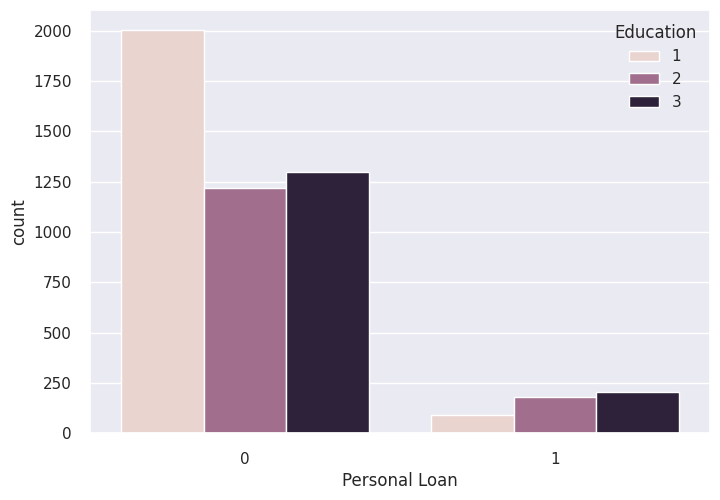

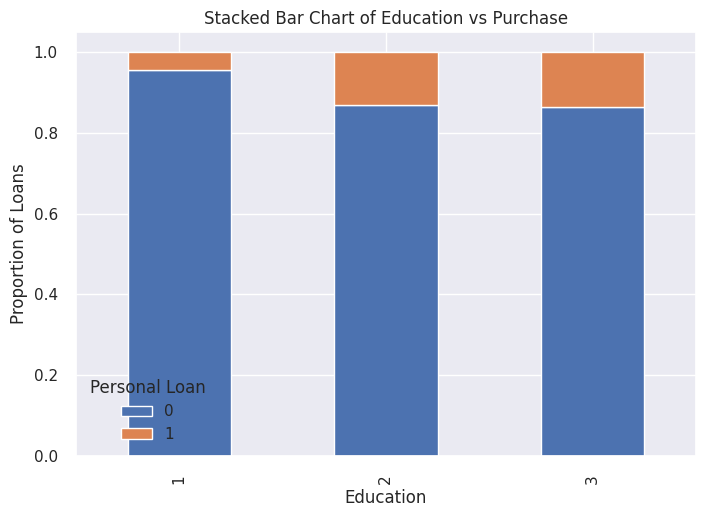

In [ ]:
sns.countplot(x='Personal Loan',hue='Education',data=bank_per_loan_df)
table=pd.crosstab(bank_per_loan_df['Education'],bank_per_loan_df['Personal Loan'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Loans')
# undergraduate has very less prob of taking the loan

cross tabulation can be given as :  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


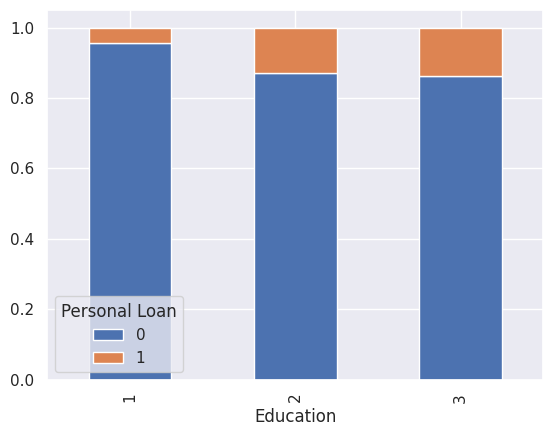

In [ ]:
education = pd.crosstab(bank_per_loan_df['Education'],bank_per_loan_df['Personal Loan'])
education.div(education.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', education)
print('cross tabulation can be given in percentage as : ', '\n', education.div(education.sum(1).astype(float),axis =0))

In [ ]:
#Observation
#From the above plots, we can infer that customers who are more educated have a higher probability of buying personal loans. Hence our hypothesis was true…!

<Axes: xlabel='Family', ylabel='count'>

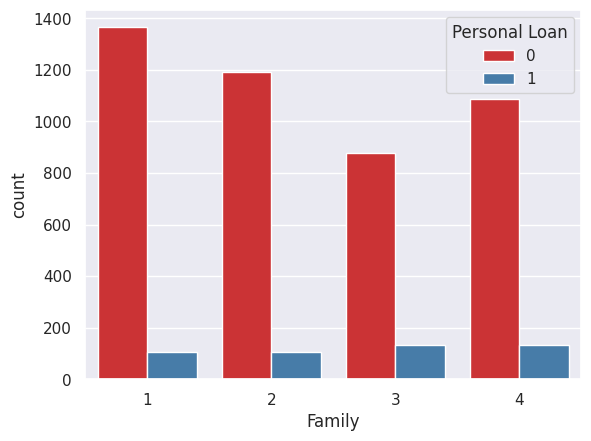

In [ ]:
sns.countplot(x='Family',data=bank_per_loan_df,hue='Personal Loan',palette='Set1')

cross tabulation can be given as :  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


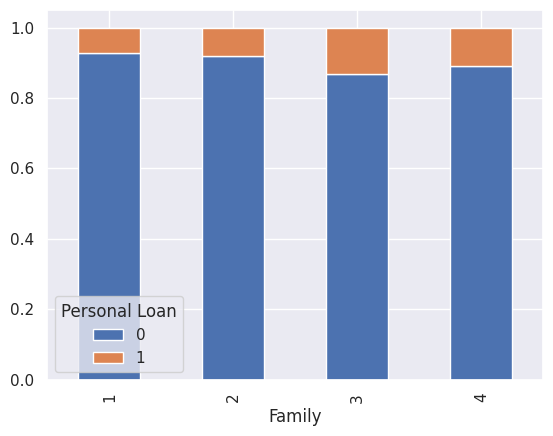

In [ ]:
family = pd.crosstab(bank_per_loan_df['Family'],bank_per_loan_df['Personal Loan'])
family.div(family.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', family)
print('cross tabulation can be given in percentage as : ', '\n', family.div(family.sum(1).astype(float),axis =0))

In [ ]:
#Observation
#The number of family members not significantly affect probability. Hence it contradicts our hypothesis that the number of family members will affect the probability.

In [ ]:
# Influence of income and education on personal loan

<Axes: xlabel='Education', ylabel='Income'>

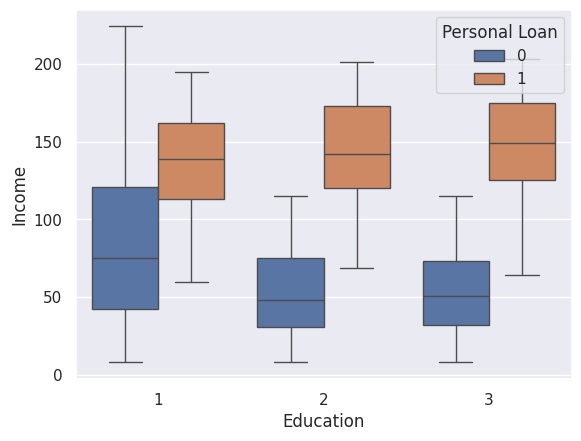

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_per_loan_df)

In [ ]:
##### Observation :




   # It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

<Axes: xlabel='Education', ylabel='Mortgage'>

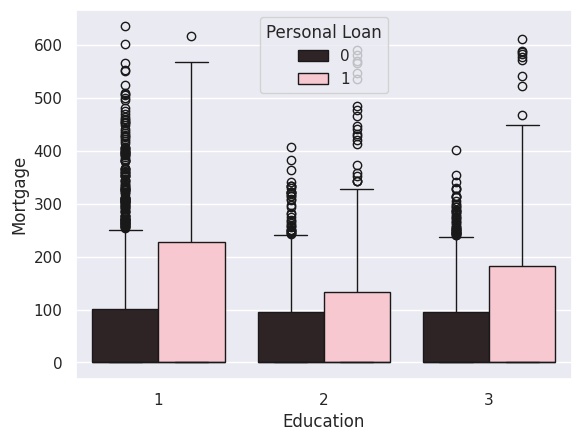

In [ ]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_per_loan_df,color='pink')

In [ ]:
##### Observation

#From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

In [ ]:
# Boolean Independent Variable vs Target Variable

In [ ]:
#Let us now look at the Boolean variables (‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Securities Account’) vs Target variable (‘Personal_Loan’)

<Axes: xlabel='CD Account', ylabel='count'>

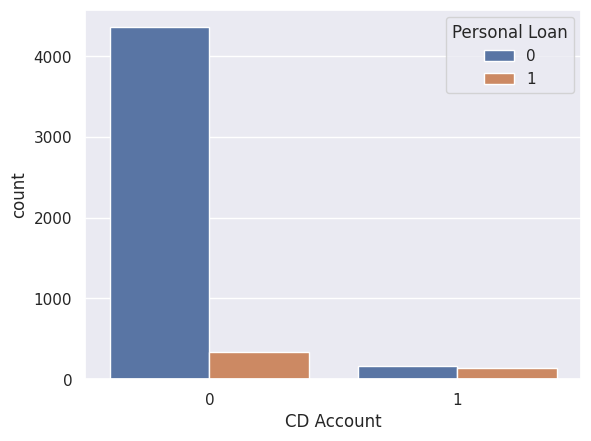

In [ ]:
sns.countplot(x='CD Account',data=bank_per_loan_df,hue='Personal Loan')

cross tabulation can be given as :  
 Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576


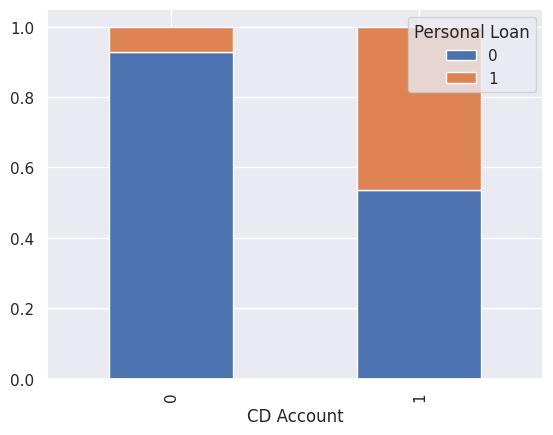

In [ ]:
CD_Account = pd.crosstab(bank_per_loan_df['CD Account'],bank_per_loan_df['Personal Loan'])
CD_Account.div(CD_Account.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', CD_Account)
print('cross tabulation can be given in percentage as : ', '\n', CD_Account.div(CD_Account.sum(1).astype(float),axis =0))

In [ ]:
# Observation
#The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.

In [ ]:
##### Let us now compare between the personal loan buyers who use or doesn’t use a credit card issued by UniversalBank

cross tabulation can be given as :  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation can be given in percentage as :  
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


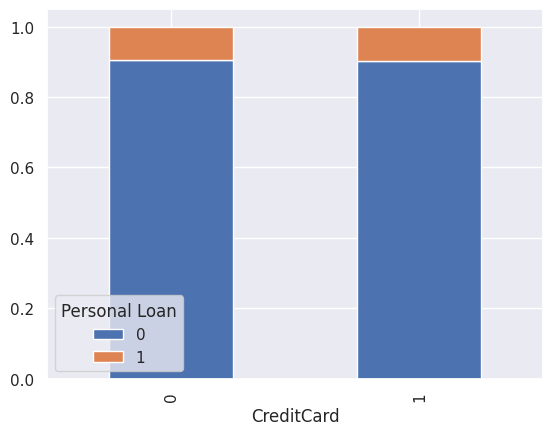

In [ ]:
credit = pd.crosstab(bank_per_loan_df['CreditCard'],bank_per_loan_df['Personal Loan'])
credit.div(credit.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', credit)
print('cross tabulation can be given in percentage as : ', '\n', credit.div(credit.sum(1).astype(float),axis =0))

In [ ]:
##### Observation

#The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

In [ ]:
##### Let us now compare the personal loan buyer’s customer who uses or doesn’t use internet banking facilities:

cross tabulation can be given as :  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation can be given in percentage as :  
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


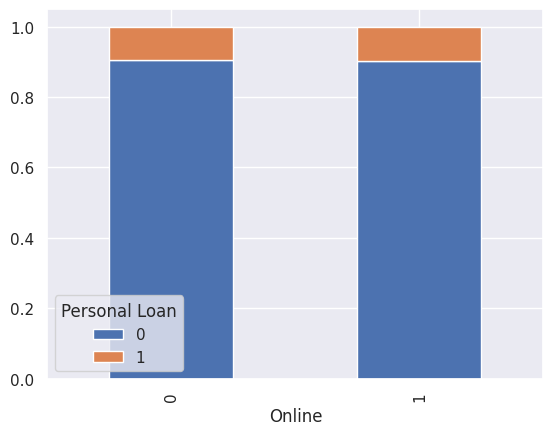

In [ ]:
online = pd.crosstab(bank_per_loan_df['Online'],bank_per_loan_df['Personal Loan'])
online.div(online.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', online)
print('cross tabulation can be given in percentage as : ', '\n', online.div(online.sum(1).astype(float),axis =0))

In [ ]:
###### Observation

#The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

In [ ]:
##### Let us now compare between the personal loan buyer’s customer who has or doesn’t have a securities account with the bank:

<Axes: xlabel='Securities Account', ylabel='count'>

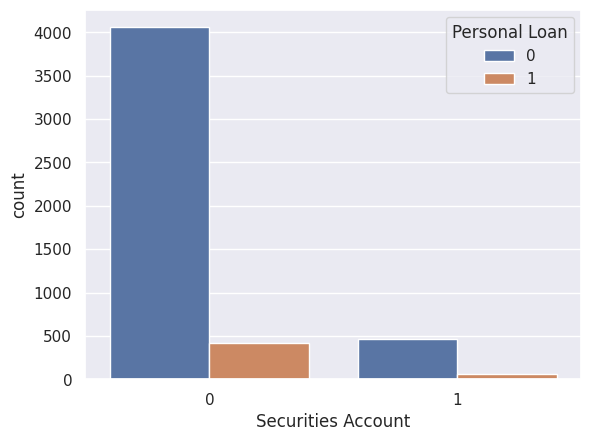

In [ ]:
sns.countplot(x="Securities Account", data=bank_per_loan_df,hue="Personal Loan")

cross tabulation can be given as :  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation can be given in percentage as :  
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


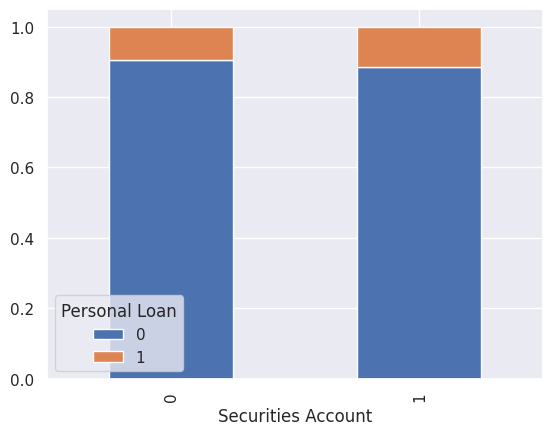

In [ ]:
securities = pd.crosstab(bank_per_loan_df['Securities Account'],bank_per_loan_df['Personal Loan'])
securities.div(securities.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', securities)
print('cross tabulation can be given in percentage as : ', '\n', securities.div(securities.sum(1).astype(float),axis =0))

In [ ]:
##### Obervations

#The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

In [ ]:
# Influence of few attributes on 'Personal Loan' - Dependant Variable

<Axes: xlabel='Age', ylabel='Income'>

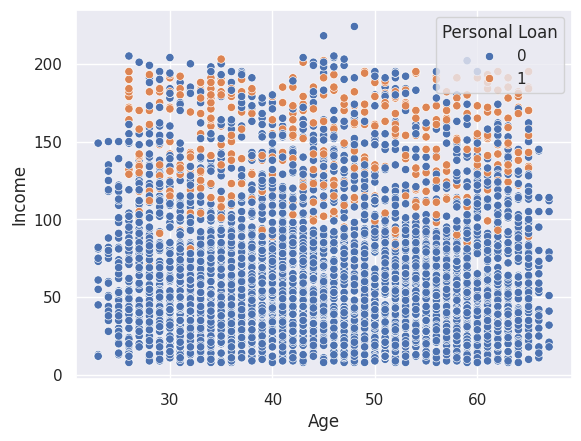

In [ ]:
sns.scatterplot(y = 'Income', x = 'Age', data = bank_per_loan_df, hue = 'Personal Loan')

<Axes: xlabel='Income', ylabel='Mortgage'>

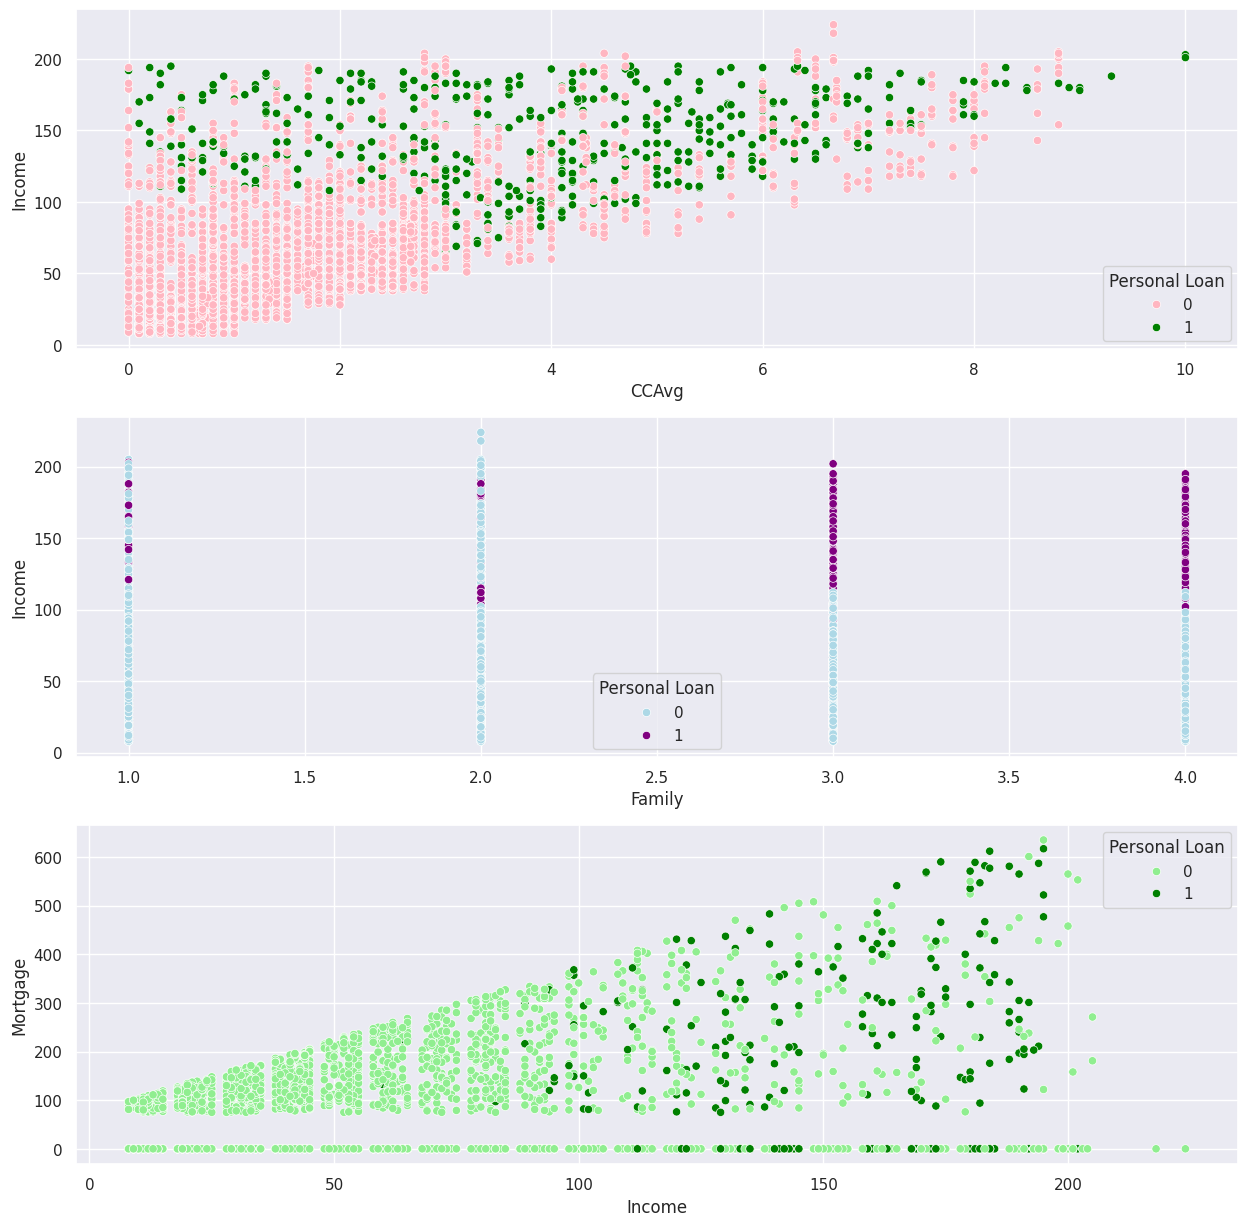

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x=bank_per_loan_df.CCAvg, y=bank_per_loan_df.Income, hue = bank_per_loan_df['Personal Loan'], palette= ['lightpink','green'])

plt.subplot(3,1,2)
sns.scatterplot(x=bank_per_loan_df.Family, y=bank_per_loan_df.Income, hue = bank_per_loan_df['Personal Loan'], palette= ['lightblue','purple'])

plt.subplot(3,1,3)
sns.scatterplot(x=bank_per_loan_df.Income, y=bank_per_loan_df.Mortgage, hue = bank_per_loan_df['Personal Loan'], palette= ['lightgreen','green'])

In [ ]:
##### Observation
  #  The graph show persons who have personal loan have a higher credit card average.

  #  It is clearly visible that as the members of family increases (say >=3) the necessity of loan is also increasing.

   #  It is very precise that as the income increases (approx 100K) the mortgage value also increases gradually wiht the necessity of personal loan.

<Axes: xlabel='Education', ylabel='Mortgage'>

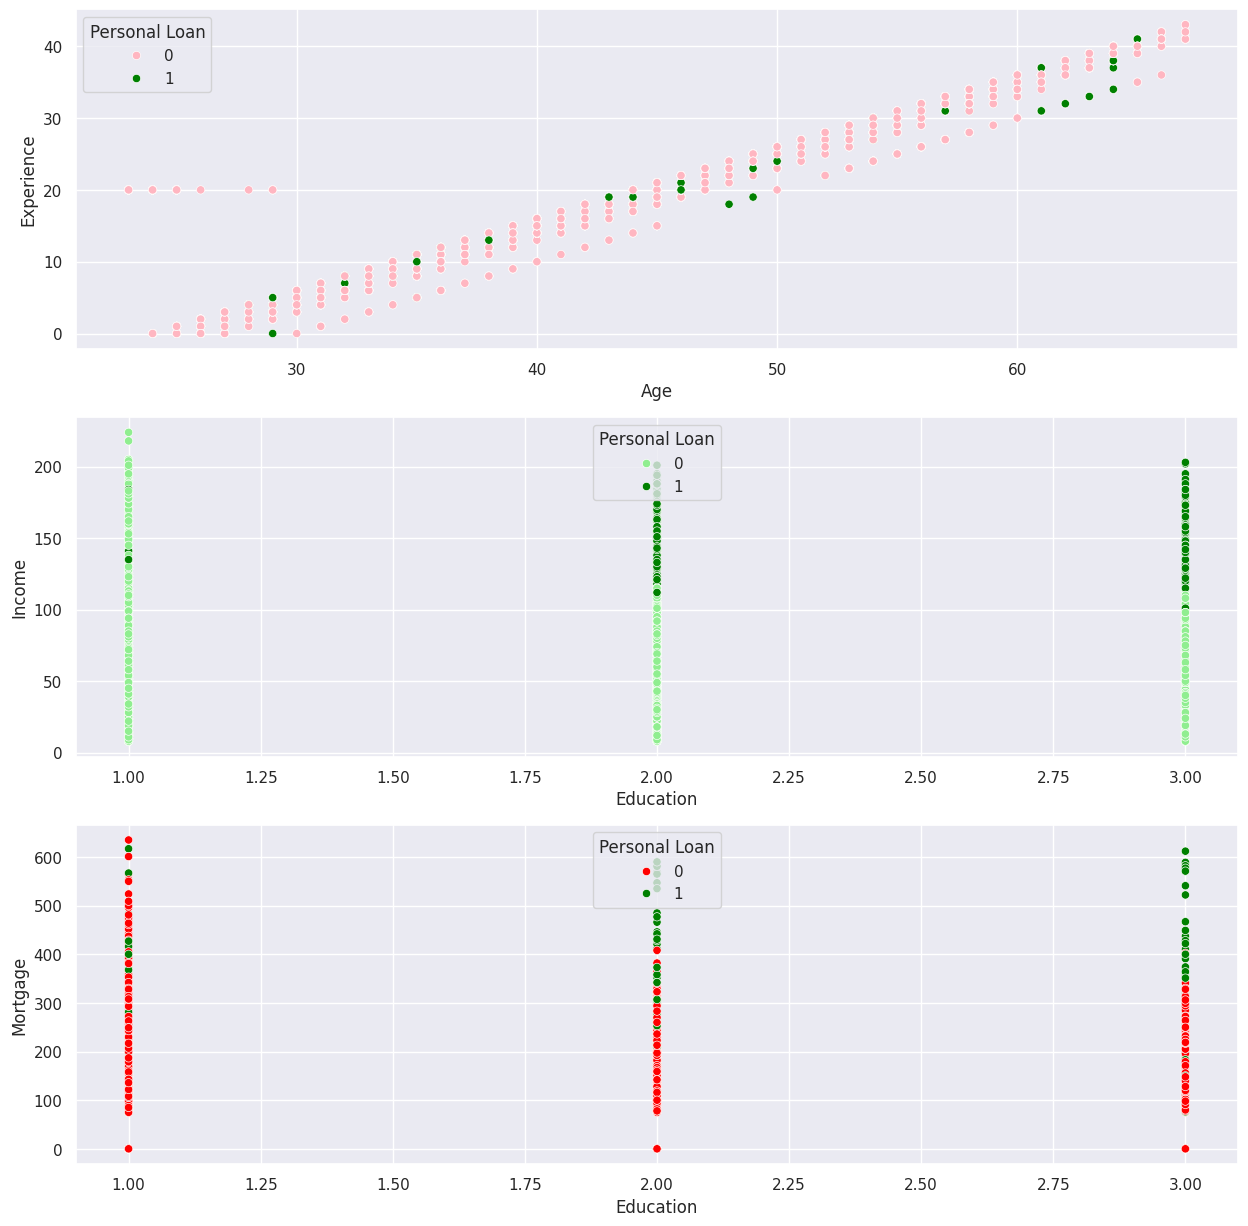

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(x=bank_per_loan_df.Age, y=bank_per_loan_df.Experience, hue = bank_per_loan_df['Personal Loan'], palette= ['lightpink','green'])

plt.subplot(3,1,2)
sns.scatterplot(x=bank_per_loan_df.Education, y=bank_per_loan_df.Income, hue = bank_per_loan_df['Personal Loan'], palette= ['lightgreen','green'])

plt.subplot(3,1,3)
sns.scatterplot(x=bank_per_loan_df.Education, y=bank_per_loan_df.Mortgage, hue = bank_per_loan_df['Personal Loan'], palette= ['red','green'])

In [ ]:
# Observation
  #  'Age' has a very strong association with 'Experience' but nothing gets affected with loan attribute.
   # It seems that customers with education level is 1 is having more income which is mere equal to the customers who has taken the personal loan.
  #  Customers with education level 2 & 3 seems to take personal loan as they have high mortgage.

<Axes: xlabel='CD Account', ylabel='count'>

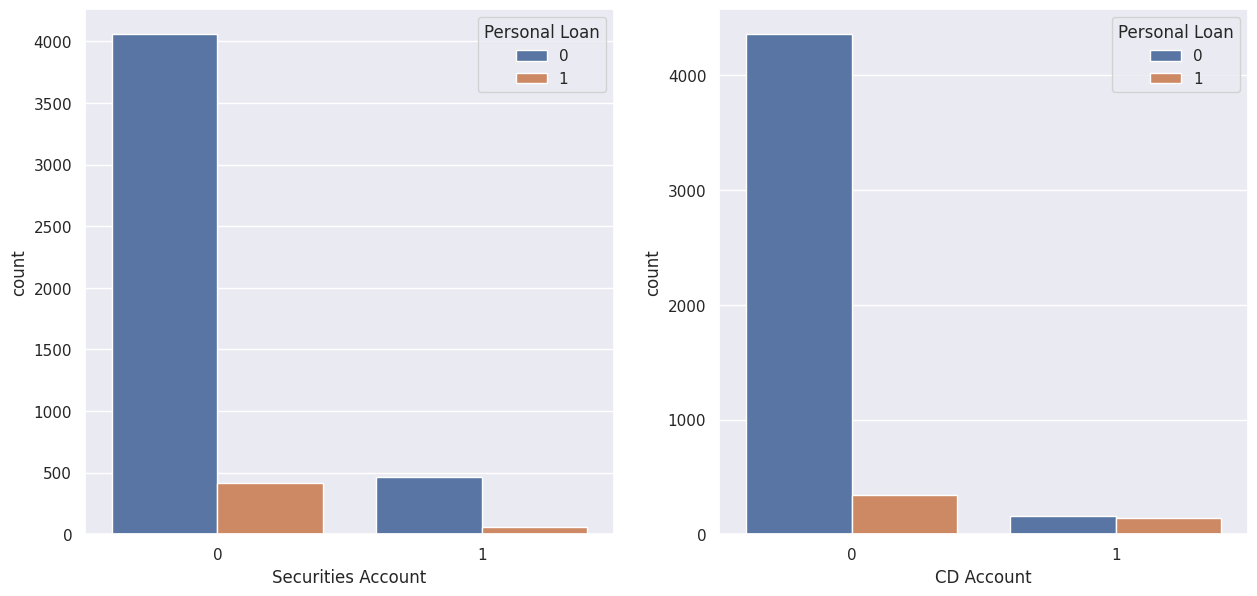

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x="Securities Account", data=bank_per_loan_df ,hue="Personal Loan")

plt.subplot(2,2,2)
sns.countplot(x='CD Account' ,data=bank_per_loan_df ,hue='Personal Loan')

In [ ]:
    #Observations
    #Majority of customers who does not have loan is holding securities account, Whereas small proportion of customers having loan does hold but majority of them do not have securities account.
    #Customers who does not have CD account, does not have loan as well, but almost all customers who has CD account has loan as well

<Axes: xlabel='Income', ylabel='Density'>

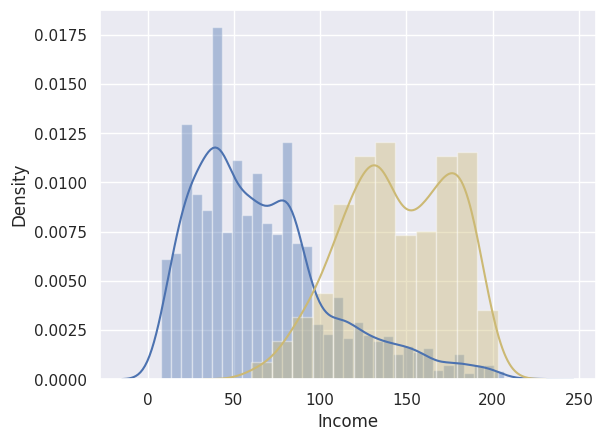

In [ ]:
sns.distplot(bank_per_loan_df[bank_per_loan_df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot(bank_per_loan_df[bank_per_loan_df["Personal Loan"] == 1]['Income'], color = 'y')

In [ ]:
#Observation
#The graph show those who have personal loan also have a higher income.

<Axes: xlabel='CCAvg', ylabel='Density'>

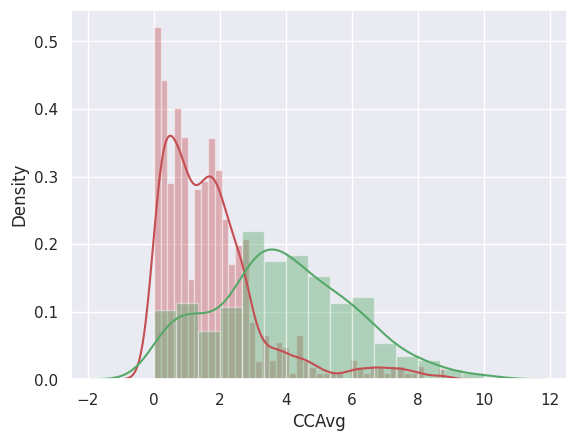

In [ ]:
sns.distplot( bank_per_loan_df[bank_per_loan_df['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( bank_per_loan_df[bank_per_loan_df['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [ ]:
print('Credit card spending of Non-Loan customers: ',bank_per_loan_df[bank_per_loan_df['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', bank_per_loan_df[bank_per_loan_df['Personal Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


In [ ]:
##### Observation:

#The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

<Figure size 1000x500 with 0 Axes>

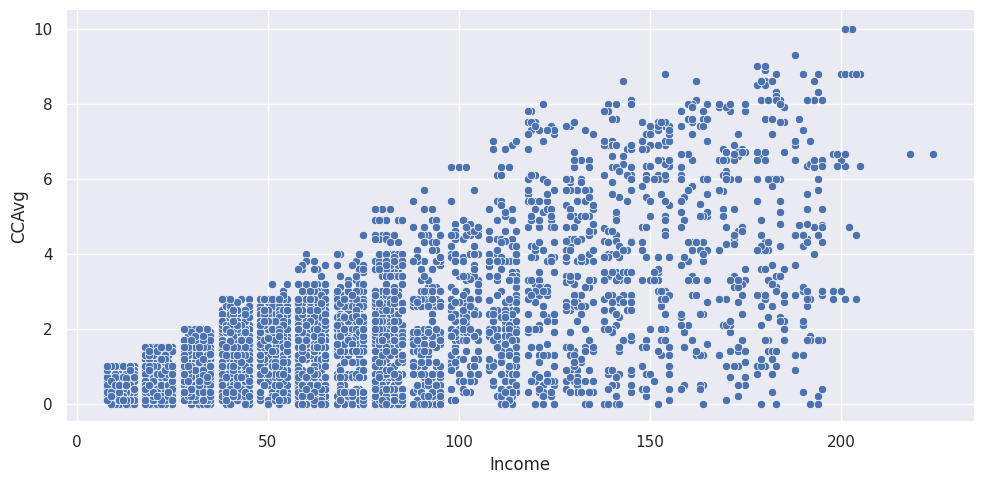

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="CCAvg" ,aspect = 2 ,data=bank_per_loan_df)
plt.show()
plt.clf()

In [ ]:
##### Observation

#Income and credit card average use is also related in a linear fashion and is more dense in the income bracket of 50k-100k bracket.

Text(0, 0.5, 'Age')

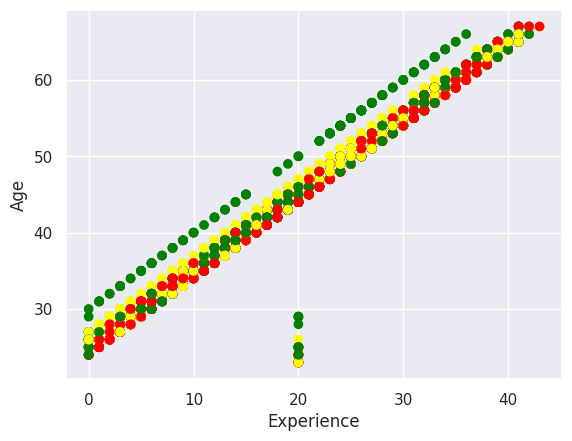

In [ ]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(bank_per_loan_df['Experience'],bank_per_loan_df['Age'],c=bank_per_loan_df['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

In [ ]:
##### Observation:

#The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

<Figure size 1000x500 with 0 Axes>

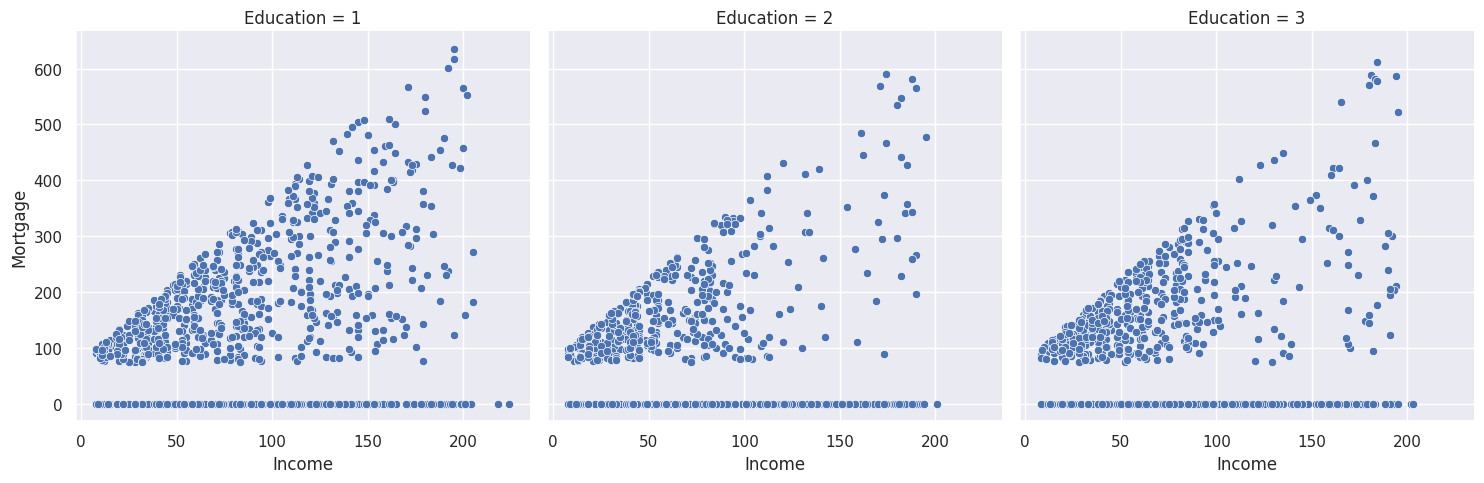

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.relplot(x="Income", y="Mortgage", #hue="Personal Loan",
            col="Education", data=bank_per_loan_df)
plt.show()
plt.clf()

In [ ]:
###### Observation


#Higher income level and higher education level customers have very few mortgages on them. Plus there are some smart people who dont have any mortgages across all education levels.

#The mortgages are mainly concentrated between 0k-80k annual income individuals irrespective of the education background.

<Figure size 500x500 with 0 Axes>

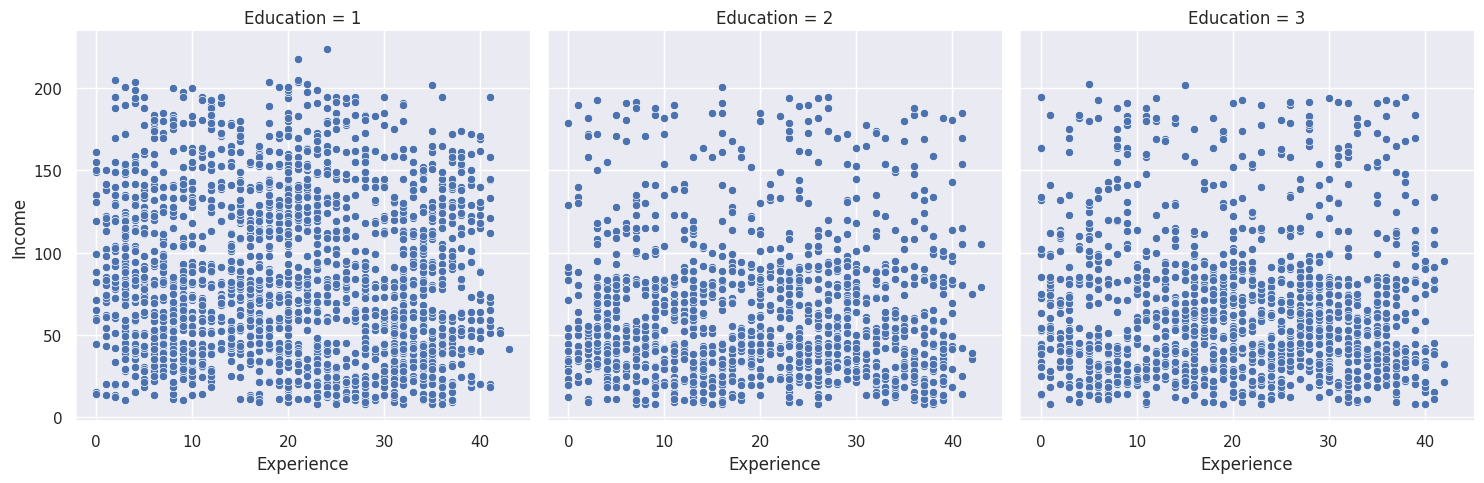

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.relplot(x="Experience", y="Income",col = "Education",
             data=bank_per_loan_df)
plt.show()
plt.clf()

In [ ]:
##### Observation:

#Income of customers with higher experiences is an even spread and not related linearly.

#It should be noted that even with Bachelors level education, higher experience indivudals have higher income as compared to their more educated counterparts.

#The scatter plot is sparse above 100k USD for higher educated customers with the same experience.

<Figure size 500x500 with 0 Axes>

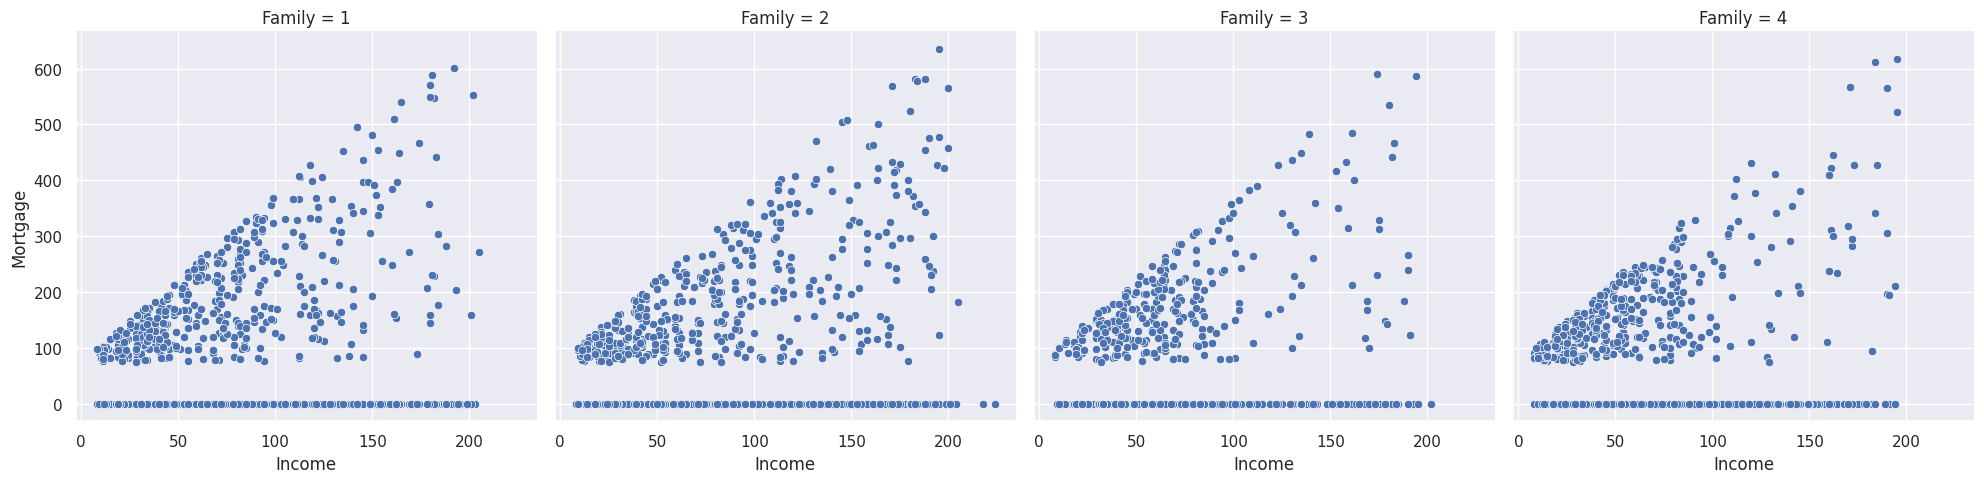

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))
sns.relplot(x="Income", y="Mortgage",col = "Family",# hue="Education",
             data=bank_per_loan_df)
plt.show()
plt.clf()

In [ ]:
##### Observation

#Income and Mortgage was linearly related.

#When we see this relation with respect to the number of family members we see that above 100k USD annual income, families of 3 and 4 have lesser mortgages as compared to families of 1 or 2.

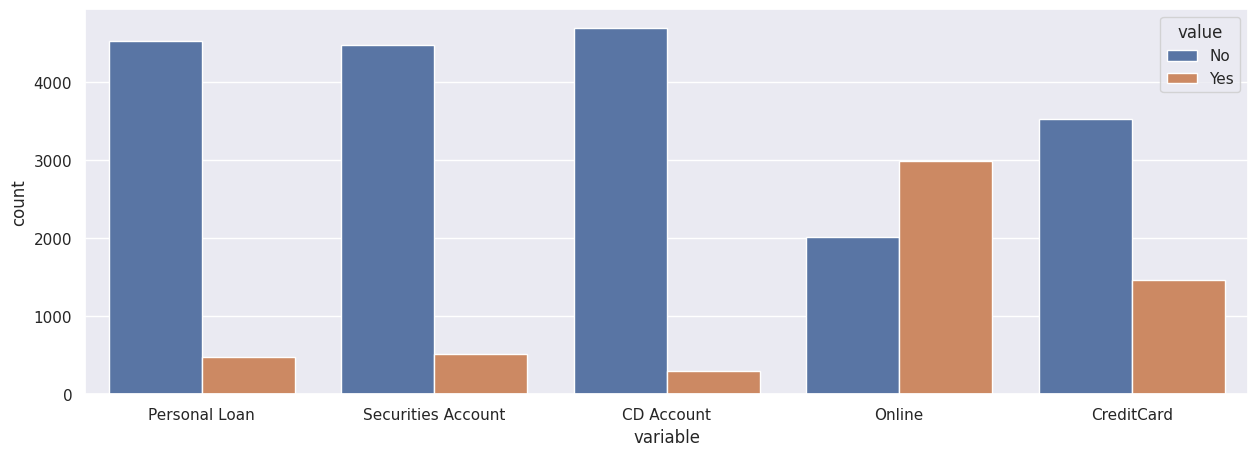

In [ ]:
melted_data = pd.melt(bank_per_loan_df.iloc[:,9:])
melted_data.loc[melted_data['value'] == 0 , ['value']] = 'No'
melted_data.loc[melted_data['value'] == 1 , ['value']] = 'Yes'
plt.figure(figsize=(15,5))
sns.countplot(x="variable", hue="value", data=melted_data)
plt.show()
plt.close()

In [ ]:
##### Observation
#From the above graph we can observe that a major portion of the customers have no securities or CD Accounts.

#Around 3000 use Online banking but not many use credit cards.

#Credit cards usage is mostly among youngsters generally.

#The average age of this dataset is 45, so it makes sense that credit card users are less.

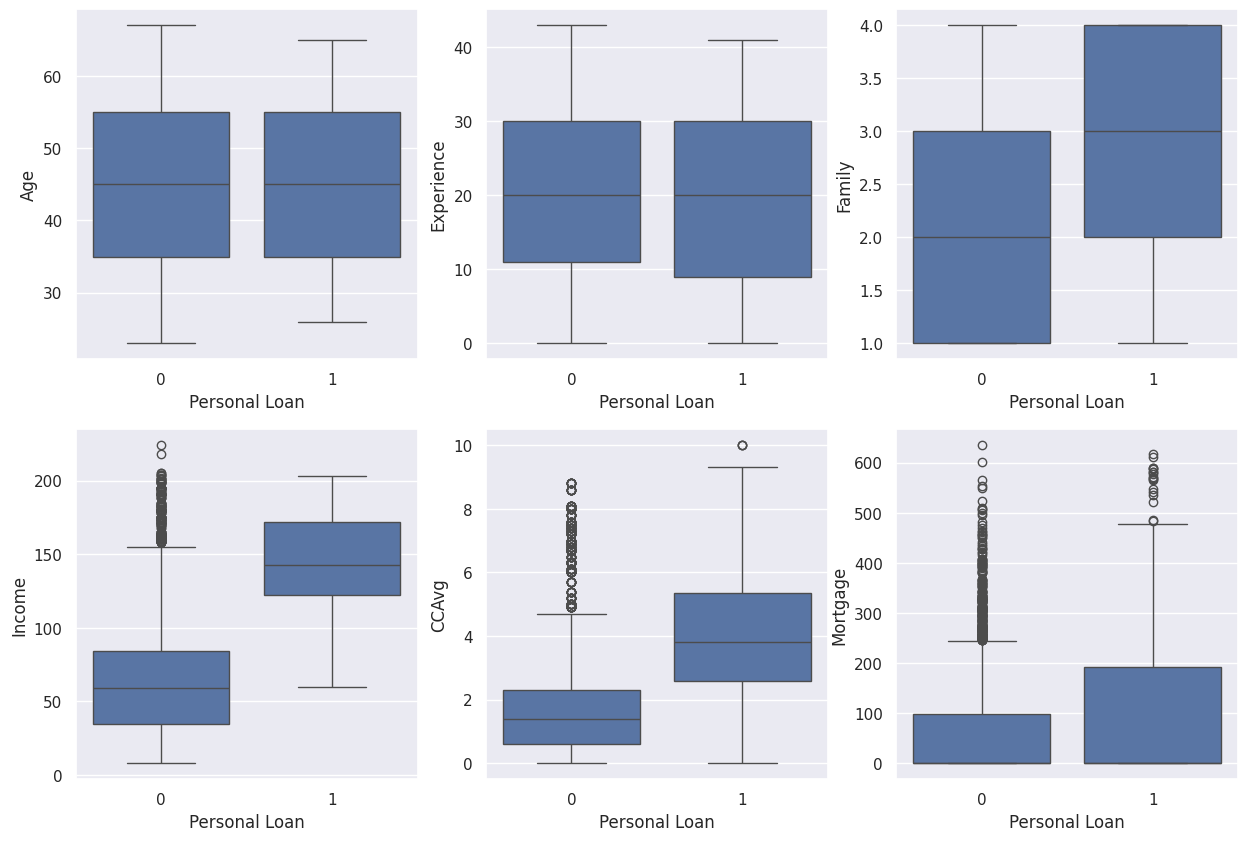

<Figure size 640x480 with 0 Axes>

In [ ]:
numerical_1 = ['Age' , 'Experience' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax_1 = plt.subplots(2, 3, figsize=(15, 10))
for var_1, subplot in zip(numerical_1, ax_1.flatten()):
    sns.boxplot(x='Personal Loan', y=var_1, data=bank_per_loan_df, ax=subplot)
plt.show()
plt.clf()

In [ ]:
#Our EDA can conclude with analysis of the numerical values with a categorical Personal Loan feature, and a box plot is the best way to do it

#Age of the customer is not a defining factor if the person will accept a personal loan or not.
#Professional years of experience also not a governing factor.

#As we saw in the previous graph, a family of 3 or 4 has lesser mortgages even with higher incomes. The reason, based on this box plot can be the fact that taking a personal loan with higher interest rate might seem justified to them. Will show it in a graph below.

#As expected, higher the income more is the chance that a person will accept a personal loan offer from the bank.

#If one's credit card average spending per month is higher, they will probably accept a personal loan offer.
#Higher mortgage means a custome might accept a personal loan offer.

In [ ]:
# Checking for correlation

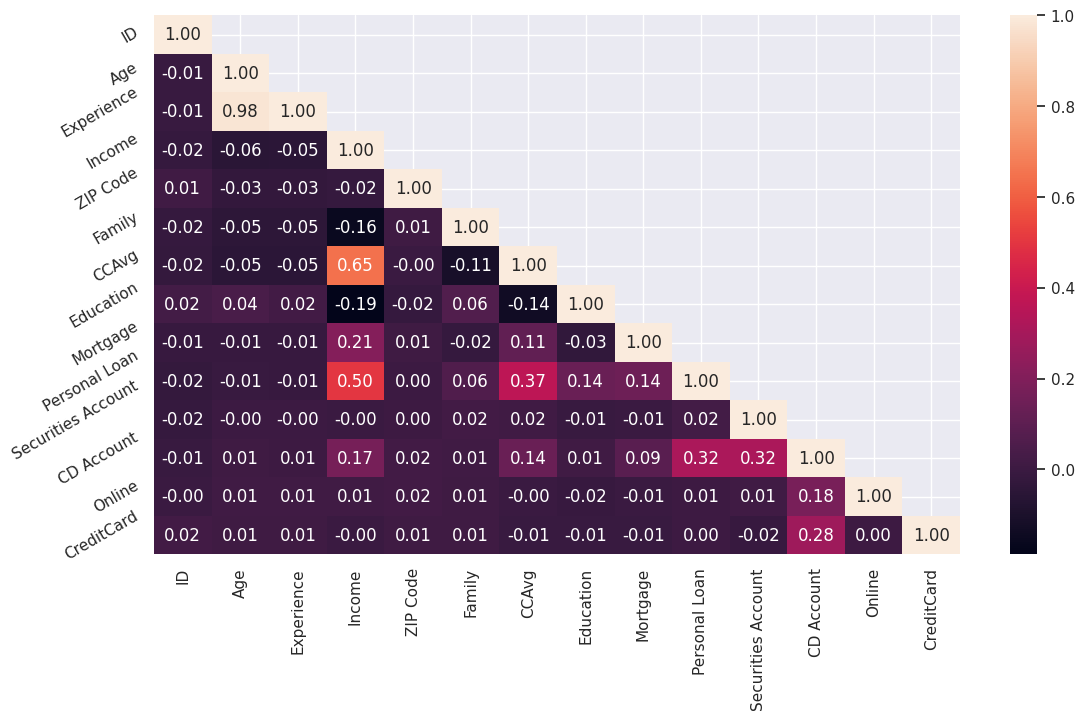

In [ ]:
# Correlation with heat map
corr_overall = bank_per_loan_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr_overall)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr_overall,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [ ]:
###### Observation

#Income and CCAvg is moderately correlated.

#Age and Experience is highly correlated

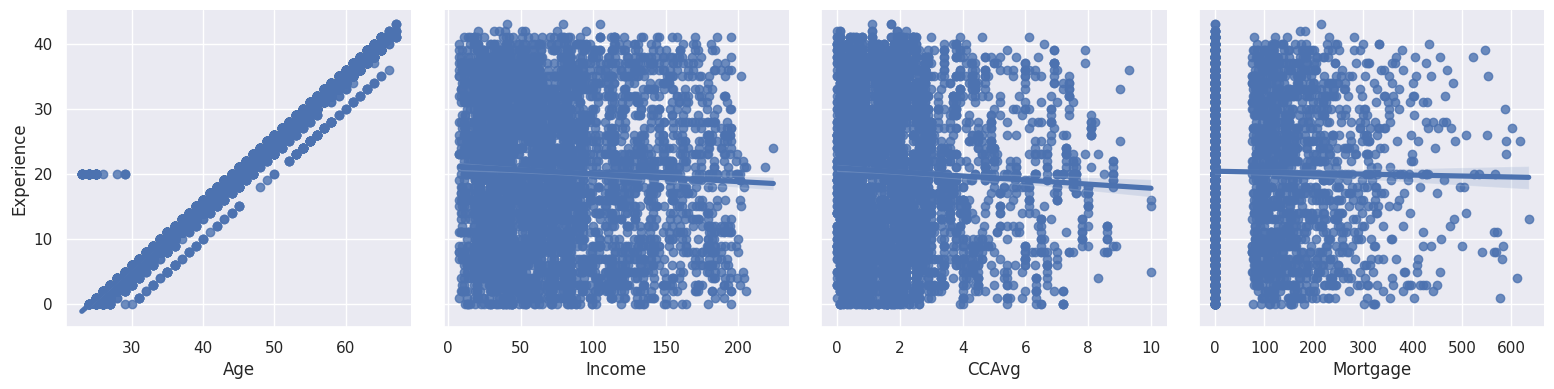

In [ ]:
ncol_2 = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(bank_per_loan_df, y_vars = 'Experience', x_vars = ncol_2, height = 4)
grid.map(sns.regplot);

In [ ]:
##### Observation:

#Age' has a very strong association with 'Experience

#Is there some association between personal characteristics and the fact that person obtained Personal Loan?

#Let's check what the values or group of values of each variable lies inside group that have 'Personal Loan' and don't have that.

#Since we found strong association between 'Age' and 'Experience' we decided to exclud 'Experience' from analysis steps to avoid multicollinearity.

In [ ]:
##### QUANTATIVE VARIABLES

#['Age', 'Income', 'CCAvg', 'Mortgage'] with Personal Loan

In [ ]:
quant_df=bank_per_loan_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']]

In [ ]:
bank_per_loan_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

Personal Loan       Age    Income     CCAvg  Mortgage
Personal Loan       1.000000 -0.007726  0.502462  0.366889  0.142095
Age                -0.007726  1.000000 -0.055269 -0.052012 -0.012539
Income              0.502462 -0.055269  1.000000  0.645984  0.206806
CCAvg               0.366889 -0.052012  0.645984  1.000000  0.109905
Mortgage            0.142095 -0.012539  0.206806  0.109905  1.000000

<Axes: >

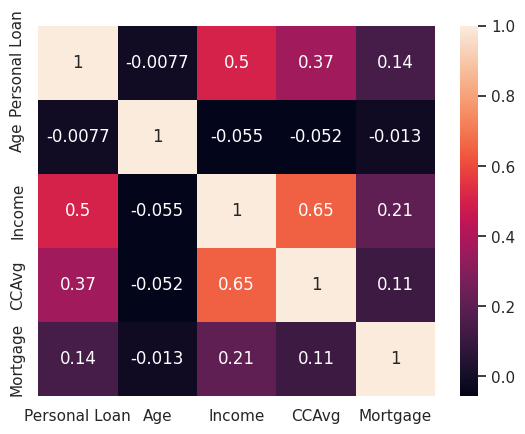

In [ ]:
sns.heatmap(bank_per_loan_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), annot = True)

<Axes: >

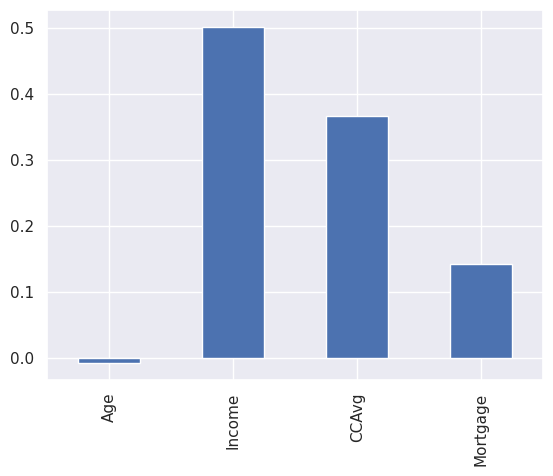

In [ ]:
bank_per_loan_df[['Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()['Personal Loan'][1:].plot.bar()

In [ ]:
##### Observation
   # The above diagram shows a clear vision on the correlation between the independant variable and dependant variables, we see that 'Income' and 'Credit Card Average' has some correlation with 'Personal Loan'.

In [ ]:
##### Let's check our confidense about this statment with logistic regression model:

In [ ]:
quant_df['intercept'] = 1
log_mod_check = sm.Logit(quant_df['Personal Loan'], quant_df[['intercept', 'Age', 'Income', 'CCAvg', 'Mortgage']]).fit()

Optimization terminated successfully.
         Current function value: 0.200574
         Iterations 8


In [ ]:
log_mod_check.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Aug 2025   Pseudo R-squ.:                  0.3657
Time:                        23:53:00   Log-Likelihood:                -1002.9
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                4.742e-249
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -6.5144      0.308    -21.155      0.000      -7.118      -5.911
Age            0.0080      0.005      1.550      0.121      -0.002       0.018
Income         0.0351      0.002     22.313      0.000       0.032       0.038
CCAvg          0.0688      0.029      2.409      0.016       0.013       0.125
Mortgage       0.0007      0.000      1.757      0.079   -8.49e-05       0.002
==============================================================================
"""

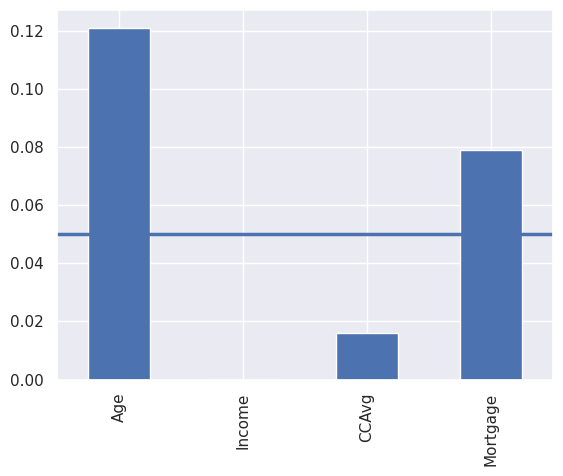

In [ ]:
# include 'intercept'
log_mod_check.pvalues[1:5].plot.bar()
plt.axhline(y = 0.05);

In [ ]:
##### Observation

#We can say with confidence that 'Income' and 'CCAvg' both has statisticaly significant association with 'Personal Loan', since their p-value in logistic regression < 0.05

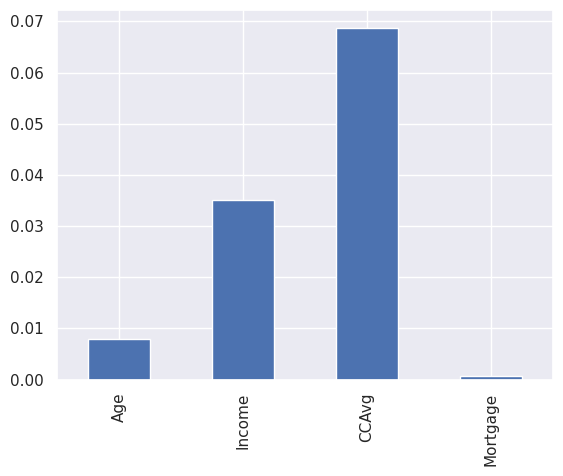

In [ ]:
###### The bar chart of coefficient distribution
# exclude 'intercept'
log_mod_check.params[1:5].plot.bar();

In [ ]:
##### Observation

#'CCAvg' has strongest association with 'Personal Loan'

In [ ]:
#Filter columns with P-values less then 0.05 and store variables and it's coefficients into the dictionary

In [ ]:
quant_df_main = {}
for i in log_mod_check.params[1:5].to_dict().keys():
    if log_mod_check.pvalues[i] < 0.05:
        quant_df_main[i] = log_mod_check.params[i]
    else:
        continue

In [ ]:
quant_df_main

{'Income': np.float64(0.035086749707789175),
 'CCAvg': np.float64(0.06879676197631965)}

In [ ]:
quant_df_main_odds = {k : np.exp(v) for k, v in quant_df_main.items()}
quant_df_main_odds

{'Income': np.float64(1.0357095524036393),
 'CCAvg': np.float64(1.0712184746974085)}

In [ ]:
##### Observation :

#'Personal Loan' has statisticaly significant association with:

  #  'Income' : coef = 0.03508
    'CCAvg' : coef = 0.06879
#Both variables are positively associated with 'Personal Loan'. As soon as both have one unit as $1000 we may say the following:

   # For each $1000 increase in 'Income' we expect the odds to sell Personal Loan to increase by 3.57%, holding everything else constant

  #  For each $1000 increase in 'CCAvg' we expect the odds to sell Personal Loan to increase by 7.12%, holding everything else constant

In [ ]:
###### CATEGORICAL VARIABLES

#'ZIP Code', 'Family', 'Education'

#'Family' and 'Education' are ordinal categorical variables so we may apply logistic regression direct to them. 'ZIP Code' is nominal, so we need to build dummy variables to check the association existence

In [151]:
cat_df = bank_per_loan_df[['ZIP Code', 'Family', 'Education', 'Personal Loan']].copy()

In [ ]:
#'Family' and 'Education'

In [152]:
cat_df.corr()

ZIP Code    Family  Education  Personal Loan
ZIP Code       1.000000  0.011778  -0.017377       0.000107
Family         0.011778  1.000000   0.064929       0.061367
Education     -0.017377  0.064929   1.000000       0.136722
Personal Loan  0.000107  0.061367   0.136722       1.000000

In [153]:
cat_df.corr()['Personal Loan'][0:2]

ZIP Code    0.000107
Family      0.061367
Name: Personal Loan, dtype: float64

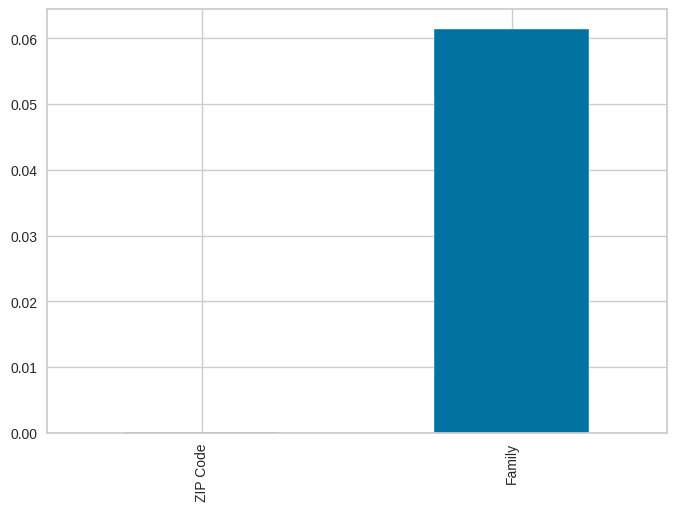

In [154]:
cat_df.corr()['Personal Loan'][0:2].plot.bar();


In [ ]:
###### Observation :

#Family' and 'Education' has low association with 'Personal Loan'




#Let's check our confidence with logistic regresstion

In [155]:
cat_df['intercept'] = 1
log_mod_1 = sm.Logit(cat_df['Personal Loan'], cat_df[['intercept', 'Family', 'Education']]).fit()

Optimization terminated successfully.
         Current function value: 0.305406
         Iterations 7


In [156]:
log_mod_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                 0.03415
Time:                        21:40:37   Log-Likelihood:                -1527.0
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.575e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.7670      0.175    -21.574      0.000      -4.109      -3.425
Family         0.1623      0.042      3.863      0.000       0.080       0.245
Education      0.5487      0.059      9.260      0.000       0.433       0.665
==============================================================================
"""

In [ ]:
##### Observation:

#We can say with confidence that 'Family' and 'Education' both has statisticaly significant association with 'Personal Loan', since their p-value in logistic regression < 0.05

In [ ]:
#The bar chart of coefficient distribution

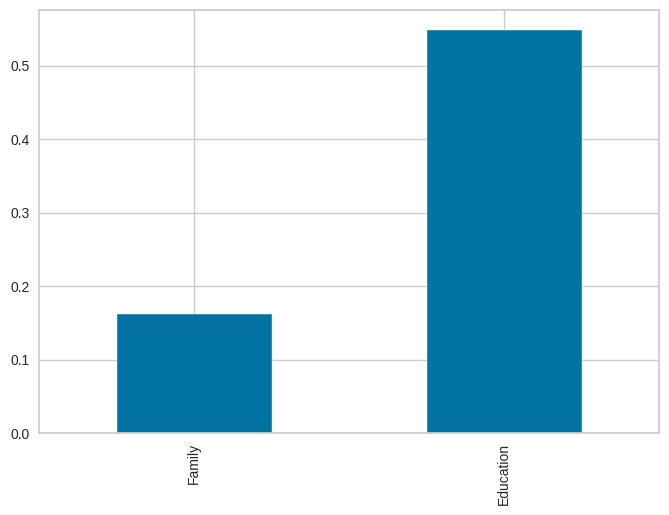

In [157]:
# exclude 'intercept'
log_mod_1.params[1:3].plot.bar();

In [ ]:
##### Observation:

#'Education' has strongest association with 'Personal Loan'

In [158]:
cat_df_main = {}
for i in log_mod_1.params[1:3].to_dict().keys():
    if log_mod_1.pvalues[i] < 0.05:
        cat_df_main[i] = log_mod_1.params[i]
    else:
        continue

cat_df_main

{'Family': np.float64(0.1623178507480379),
 'Education': np.float64(0.5487286631107696)}

In [159]:
cat_df_odds_1 = {k : np.exp(v) for k, v in cat_df_main.items()}
cat_df_odds_1

{'Family': np.float64(1.176234048782635),
 'Education': np.float64(1.7310508695002484)}

In [ ]:
##### Observation:

#Conclusion:

#'Personal Loan' has statisticaly significant association with:

 #   'Family' : coef = 0.16231
  #  'Education' : coef = 0.54873
#Both variables are positively associated with 'Personal Loan'. We may say the following:

 #   For each unit increase in 'Family' we expect the odds to sell Personal Loan to increase by 17.62%, holding everything else constant

  #  For each unit increase in 'Education' we expect the odds to sell Personal Loan to increase by 73.11%, holding everything else constant

In [246]:
#ZIPCODE
cat_df.head()

ZIP Code  Family  Education  Personal Loan  intercept
0     91107       4          1              0          1
1     90089       3          1              0          1
2     94720       1          1              0          1
3     94112       1          2              0          1
4     91330       4          2              0          1

In [247]:
zip_df = cat_df[['Personal Loan', 'intercept','ZIP Code']].copy()
zip_df.head(2)

Personal Loan  intercept  ZIP Code
0              0          1     91107
1              0          1     90089

In [248]:
zip_df['ZIP Code'].nunique()

467

In [249]:
# make string version of original column, call it 'col'
zip_df['ZIP Code_str'] = zip_df['ZIP Code'].astype(str)
zip_df.info()

# make the new columns using string indexing
zip_df['zip_df_2'] = zip_df['ZIP Code_str'].str[0:2]
zip_df['zip_df_3'] = zip_df['ZIP Code_str'].str[0:3]
zip_df.info()
zip_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Personal Loan  5000 non-null   int64 
 1   intercept      5000 non-null   int64 
 2   ZIP Code       5000 non-null   int64 
 3   ZIP Code_str   5000 non-null   object
dtypes: int64(3), object(1)
memory usage: 156.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Personal Loan  5000 non-null   int64 
 1   intercept      5000 non-null   int64 
 2   ZIP Code       5000 non-null   int64 
 3   ZIP Code_str   5000 non-null   object
 4   zip_df_2       5000 non-null   object
 5   zip_df_3       5000 non-null   object
dtypes: int64(3), object(3)
memory usage: 234.5+ KB


Personal Loan  intercept  ZIP Code ZIP Code_str zip_df_2 zip_df_3
0              0          1     91107        91107       91      911
1              0          1     90089        90089       90      900
2              0          1     94720        94720       94      947
3              0          1     94112        94112       94      941
4              0          1     91330        91330       91      913

In [250]:
zip_df['zip_df_3'].nunique()

57

In [251]:
zip_df['zip_df_2'].nunique()

7

In [252]:
zip_df['zip_df_2'].value_counts()

zip_df_2
94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: count, dtype: int64

In [ ]:
#Guess this set is okay for the first view since we assume that the initial campaign of selling Personal Loans was evenly spreaded through all zip codes.

In [ ]:
#before we get dummies, let us drop ZIP Code, ZIP Code_str and zip_df_3

In [253]:
zip_2_df = copy.deepcopy(zip_df)
zip_2_df

Personal Loan  intercept  ZIP Code ZIP Code_str zip_df_2 zip_df_3
0                 0          1     91107        91107       91      911
1                 0          1     90089        90089       90      900
2                 0          1     94720        94720       94      947
3                 0          1     94112        94112       94      941
4                 0          1     91330        91330       91      913
...             ...        ...       ...          ...      ...      ...
4995              0          1     92697        92697       92      926
4996              0          1     92037        92037       92      920
4997              0          1     93023        93023       93      930
4998              0          1     90034        90034       90      900
4999              0          1     92612        92612       92      926

[5000 rows x 6 columns]

In [254]:
zip_2_df.drop(['ZIP Code', 'ZIP Code_str','zip_df_3'], axis=1, inplace=True)
zip_2_df

Personal Loan  intercept zip_df_2
0                 0          1       91
1                 0          1       90
2                 0          1       94
3                 0          1       94
4                 0          1       91
...             ...        ...      ...
4995              0          1       92
4996              0          1       92
4997              0          1       93
4998              0          1       90
4999              0          1       92

[5000 rows x 3 columns]

In [206]:
dum_zip_df = pd.get_dummies(zip_2_df, prefix = "Z", drop_first = True)
dum_zip_df

Personal Loan  intercept  ZIP Code  Z_90007  Z_90009  Z_90011  Z_90016  \
0                 0          1     91107    False    False    False    False   
1                 0          1     90089    False    False    False    False   
2                 0          1     94720    False    False    False    False   
3                 0          1     94112    False    False    False    False   
4                 0          1     91330    False    False    False    False   
...             ...        ...       ...      ...      ...      ...      ...   
4995              0          1     92697    False    False    False    False   
4996              0          1     92037    False    False    False    False   
4997              0          1     93023    False    False    False    False   
4998              0          1     90034    False    False    False    False   
4999              0          1     92612    False    False    False    False   

      Z_90018  Z_90019  Z_90024  ...  Z_953  Z_954  Z_955  Z_956  Z_957  \
0       False    False    False  ...  False  False  False  False  False   
1       False    False    False  ...  False  False  False  False  False   
2       False    False    False  ...  False  False  False  False  False   
3       False    False    False  ...  False  False  False  False  False   
4       False    False    False  ...  False  False  False  False  False   
...       ...      ...      ...  ...    ...    ...    ...    ...    ...   
4995    False    False    False  ...  False  False  False  False  False   
4996    False    False    False  ...  False  False  False  False  False   
4997    False    False    False  ...  False  False  False  False  False   
4998    False    False    False  ...  False  False  False  False  False   
4999    False    False    False  ...  False  False  False  False  False   

      Z_958  Z_959  Z_960  Z_961  Z_966  
0     False  False  False  False  False  
1     False  False  False  False  False  
2     False  False  False  False  False  
3     False  False  False  False  False  
4     False  False  False  False  False  
...     ...    ...    ...    ...    ...  
4995  False  False  False  False  False  
4996  False  False  False  False  False  
4997  False  False  False  False  False  
4998  False  False  False  False  False  
4999  False  False  False  False  False  

[5000 rows x 531 columns]

In [255]:
#Fit a logic model
#exclude 'Personal Loan' from independ vars
dum_zip_df_columns = dum_zip_df.columns.drop('Personal Loan').tolist()
dum_zip_df_columns

#Fit a logic model
#exclude 'Personal Loan' from independ vars
dum_zip_df_columns = dum_zip_df.columns.drop('Personal Loan').tolist()
dum_zip_df_columns

['intercept',
 'ZIP Code',
 'Z_90007',
 'Z_90009',
 'Z_90011',
 'Z_90016',
 'Z_90018',
 'Z_90019',
 'Z_90024',
 'Z_90025',
 'Z_90027',
 'Z_90028',
 'Z_90029',
 'Z_90032',
 'Z_90033',
 'Z_90034',
 'Z_90035',
 'Z_90036',
 'Z_90037',
 'Z_90041',
 'Z_90044',
 'Z_90045',
 'Z_90048',
 'Z_90049',
 'Z_90057',
 'Z_90058',
 'Z_90059',
 'Z_90064',
 'Z_90065',
 'Z_90066',
 'Z_90068',
 'Z_90071',
 'Z_90073',
 'Z_90086',
 'Z_90089',
 'Z_90095',
 'Z_90210',
 'Z_90212',
 'Z_90230',
 'Z_90232',
 'Z_90245',
 'Z_90250',
 'Z_90254',
 'Z_90266',
 'Z_90272',
 'Z_90274',
 'Z_90275',
 'Z_90277',
 'Z_90280',
 'Z_90291',
 'Z_90304',
 'Z_90401',
 'Z_90404',
 'Z_90405',
 'Z_90502',
 'Z_90503',
 'Z_90504',
 'Z_90505',
 'Z_90509',
 'Z_90601',
 'Z_90623',
 'Z_90630',
 'Z_90638',
 'Z_90639',
 'Z_90640',
 'Z_90650',
 'Z_90717',
 'Z_90720',
 'Z_90740',
 'Z_90745',
 'Z_90747',
 'Z_90755',
 'Z_90813',
 'Z_90840',
 'Z_91006',
 'Z_91007',
 'Z_91016',
 'Z_91024',
 'Z_91030',
 'Z_91040',
 'Z_91101',
 'Z_91103',
 'Z_91105',
 

In [256]:
log_mod_2 = sm.Logit(dum_zip_df['Personal Loan'], dum_zip_df[dum_zip_df_columns]).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [229]:
log_mod_2.summary()

NameError: name 'log_mod_2' is not defined

In [244]:
print(X.dtypes)

intercept    int64
ZIP Code     int64
Z_90007       bool
Z_90009       bool
Z_90011       bool
             ...  
Z_958         bool
Z_959         bool
Z_960         bool
Z_961         bool
Z_966         bool
Length: 530, dtype: object


In [245]:
import statsmodels.api as sm

# 1. Convert bools to int
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 2. Fill missing values
X = X.fillna(0)

# 3. Ensure target is numeric
y_numeric = y.astype(int)

# 4. Add intercept
X = sm.add_constant(X, has_constant='add')

# 5. Fit logistic regression
log_mod_2 = sm.Logit(y_numeric, X).fit()
log_mod_2.summary()


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
##### Observation

#We can say with confidence that any ZIP Code does not have statisticaly significant association with 'Personal Loan', since their p-value in logistic regression > 0.05

In [ ]:
##### BINARY VARIABLES

#'Securities Account', 'CD Account', 'Online', 'Credit Card'

In [171]:
bin_df = bank_per_loan_df[['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']].copy()
bin_df.head()

Personal Loan  Securities Account  CD Account  Online  CreditCard
0              0                   1           0       0           0
1              0                   1           0       0           0
2              0                   0           0       0           0
3              0                   0           0       0           0
4              0                   0           0       0           1

In [172]:
bin_df.corr()['Personal Loan']

Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

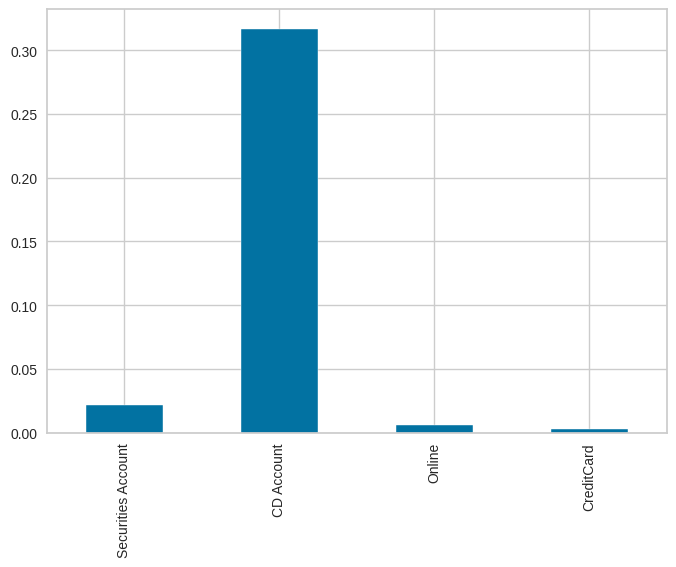

In [173]:
bin_df.corr()['Personal Loan'][1:].plot.bar();

In [ ]:
##### Observation

#CD Account' - the only one variable with moderate association

In [ ]:
#Let's fit logistic regression
bin_df['intercept'] = 1
bin_df_colmn = bin_df.columns.drop('Personal Loan').tolist()
log_mod_3 = sm.Logit(bin_df['Personal Loan'], bin_df[bin_df_colmn]).fit()

Optimization terminated successfully.
         Current function value: 0.273620
         Iterations 7


In [ ]:
log_mod_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4995
Method:                           MLE   Df Model:                            4
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.1347
Time:                        00:23:59   Log-Likelihood:                -1368.1
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 7.257e-91
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Securities Account    -1.3318      0.201     -6.621      0.000      -1.726      -0.938
CD Account             3.8738      0.206     18.780      0.000       3.470       4.278
Online                -0.5107      0.111     -4.598      0.000      -0.728      -0.293
CreditCard            -1.1518      0.153     -7.508      0.000      -1.452      -0.851
intercept             -1.9991      0.081    -24.581      0.000      -2.159      -1.840
======================================================================================
"""

In [ ]:
log_mod_4 = sm.Logit(bin_df['Personal Loan'], bin_df[['intercept', 'CD Account']]).fit()

Optimization terminated successfully.
         Current function value: 0.285748
         Iterations 6


In [ ]:
log_mod_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                 0.09632
Time:                        00:24:27   Log-Likelihood:                -1428.7
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                 3.340e-68
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.5508      0.056    -45.301      0.000      -2.661      -2.440
CD Account     2.4049      0.128     18.730      0.000       2.153       2.657
==============================================================================
"""

In [ ]:
bin_odds = {'CD Account' : np.exp(log_mod_4.params[1])}
bin_odds

{'CD Account': np.float64(11.076978939724052)}

In [ ]:
##### Observation


Conclusion:

'Personal Loan' has statisticaly significant positive association with only:

    'CD Account' : coef = 2.40
We may say the following:

    With customer been hold CD Account with The Bank we expect the odds to sell Personal Loan to increase 10 times, holding everything else constant

In [ ]:
### Summary Conclusion:

'Personal Loan' has statisticaly significant association with:

    'CD Account' : coef = 2.40 : odds = 11.07
    'Family' : coef = 0.16231 : odds = 1.176
    'Education' : coef = 0.54873 : odds = 1.731
    'Income' : coef = 0.03508 : odds = 1.036
    'CCAvg' : coef = 0.06879 : odds = 1.071
Both variables are positively associated with 'Personal Loan'. We may say the following:

    With customer been hold CD Account with The Bank we expect the odds to sell Personal Loan to increase 11 times, holding everything else constant

    For each unit increase in 'Family' we expect the odds to sell Personal Loan to increase by 17.62%, holding everything else constant

    For each unit increase in 'Education' we expect the odds to sell Personal Loan to increase by 73.11%, holding everything else constant

    For each $1000 increase in 'Income' we expect the odds to sell Personal Loan to increase by 3.57%, holding everything else constant

    For each $1000 increase in 'CCAvg' we expect the odds to sell Personal Loan to increase by 7.12%, holding everything else constant

In [ ]:
# Question 3: Get the target distribution.

In [ ]:
## Target Label

In [ ]:
#Personal Loan will be the target

In [ ]:
# 0 = didnt take loan in the last campaign (90.4%)
# 1 = took loan in the last campaign (9.6%)
bank_per_loan_df["Personal Loan"].value_counts().to_frame()

count
Personal Loan       
0               4520
1                480

<Axes: xlabel='Personal Loan'>

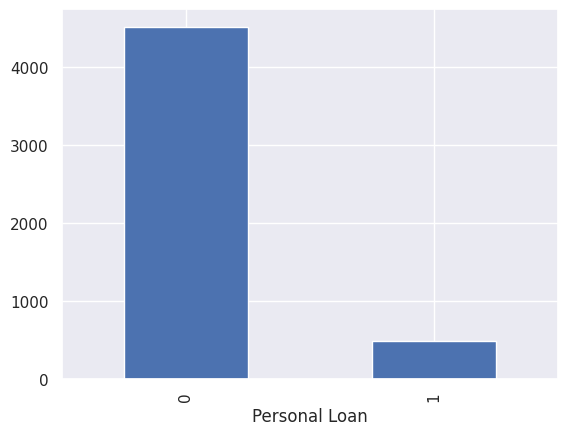

In [ ]:
pd.value_counts(bank_per_loan_df["Personal Loan"]).plot(kind="bar")

In [ ]:
count_no_sub = len(bank_per_loan_df[bank_per_loan_df['Personal Loan']==0])
print('count_no_sub :',count_no_sub)
count_sub = len(bank_per_loan_df[bank_per_loan_df['Personal Loan']==1])
print('count_sub :',count_sub)
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print('pct_of_no_sub')
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

count_no_sub : 4520
count_sub : 480
pct_of_no_sub
percentage of no subscription is 90.4
percentage of subscription 9.6


In [ ]:
##### Looking into the distribution to the various attributes in relation with the target.

In [ ]:
bank_per_loan_df.groupby(bank_per_loan_df['Personal Loan']).mean()

ID        Age  Experience      Income      ZIP Code  \
Personal Loan                                                                 
0              2512.165487  45.367257   20.378982   66.237389  93152.428761   
1              2390.650000  45.066667   19.843750  144.745833  93153.202083   

                 Family     CCAvg  Education    Mortgage  Securities Account  \
Personal Loan                                                                  
0              2.373451  1.729009   1.843584   51.789381            0.102212   
1              2.612500  3.905354   2.233333  100.845833            0.125000   

               CD Account    Online  CreditCard  
Personal Loan                                    
0                0.035841  0.595796    0.293584  
1                0.291667  0.606250    0.297917

In [ ]:
##### Observations:

#1). The average Income of customers who took loan is more than double of the avg income of customers who didn’t take loan last year.

#2). The Avg. spending on credit cards per month ($000) is also more than double for the customer's who took loan.

#3). The average mortage for loan availing customers is approximately double for the not availing customers.

#4). Avg literacy is less for non loan takers.

#As given in the data description that person who took loan in the last camping is 9.6%

In [ ]:
# Question 4: Split the data into training and test set in the ratio of 70:30 respectively.

In [ ]:
# Data Split 70:30 Ratio

In [9]:
train_set, test_set = train_test_split(bank_per_loan_df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state= 77)

In [10]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [11]:
train_set_indep = bank_per_loan_df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = bank_per_loan_df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
#### Also I have showing couple variation of models, and have also scaled the data to increase the accuracy of the model by standard scaler mthod, shown later below.

In [ ]:
# Question 5: Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

In [ ]:
# Logistic Regression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)

LogisticRegression()

In [13]:
predict = logmodel.predict(X_Test)
predictProb = logmodel.predict_proba(X_Test)

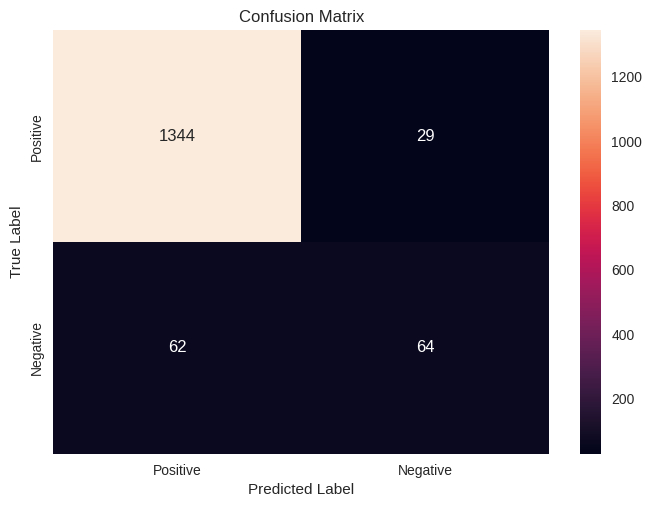

In [14]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
# Classification Report
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1373
           1       0.69      0.51      0.58       126

    accuracy                           0.94      1499
   macro avg       0.82      0.74      0.78      1499
weighted avg       0.93      0.94      0.94      1499



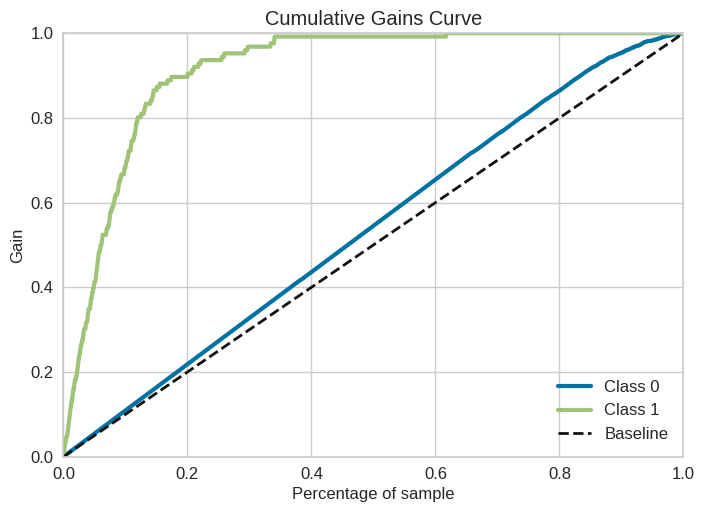

In [16]:
predictProb = logmodel.predict_proba(X_Test)
skplt.metrics.plot_cumulative_gain(Y_Test, predictProb)
plt.show()

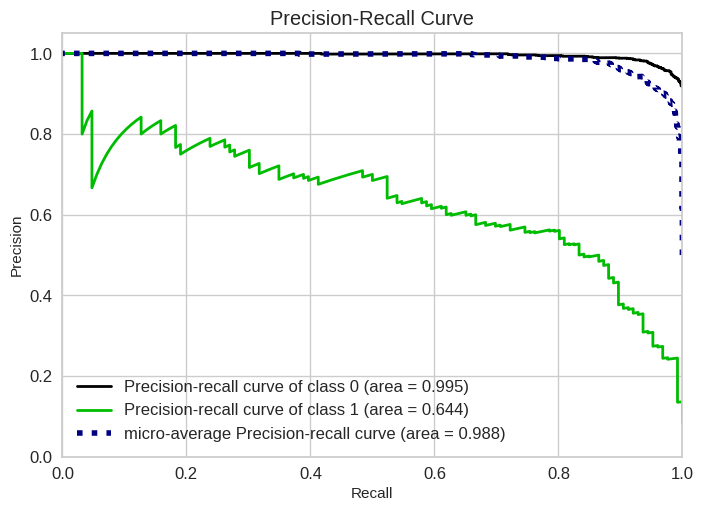

In [17]:
skplt.metrics.plot_precision_recall(Y_Test, predictProb)
plt.show()

In [ ]:
# K-NN

In [ ]:
##### Cross Validation

In [18]:
# Creating odd list of K for KNN
myList = list(range(1,20))
# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [19]:
# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)

    # Predict the response
    Y_Pred = knn.predict(X_Test)

    # Evaluate accuracy
    scores = accuracy_score(Y_Test, Y_Pred)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [ ]:
#Model

In [20]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(X_Train, Y_Train)
predicted = knn.predict(X_Test)
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9112741827885257


Text(0, 0.5, 'Misclassification Error')

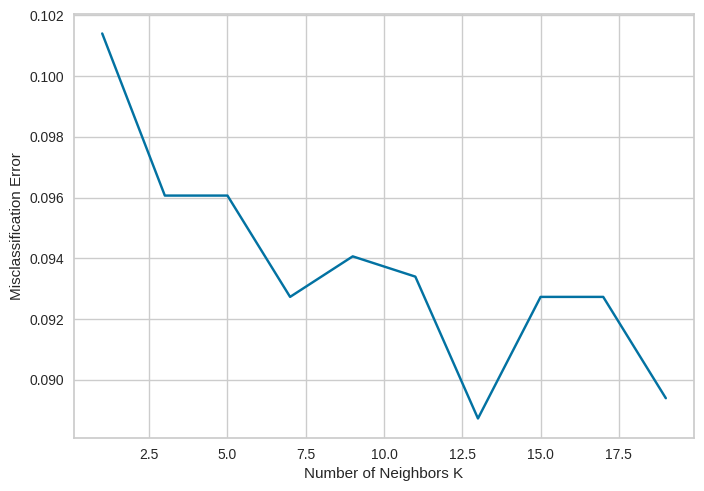

In [21]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

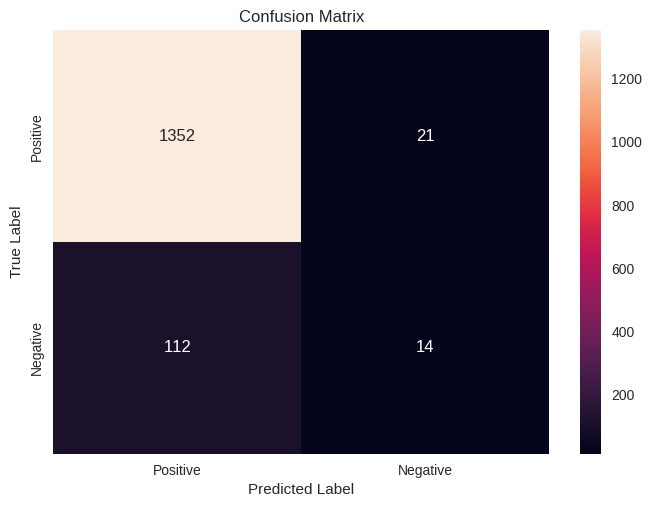

In [22]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
# Classification Report
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1373
           1       0.40      0.11      0.17       126

    accuracy                           0.91      1499
   macro avg       0.66      0.55      0.56      1499
weighted avg       0.88      0.91      0.89      1499



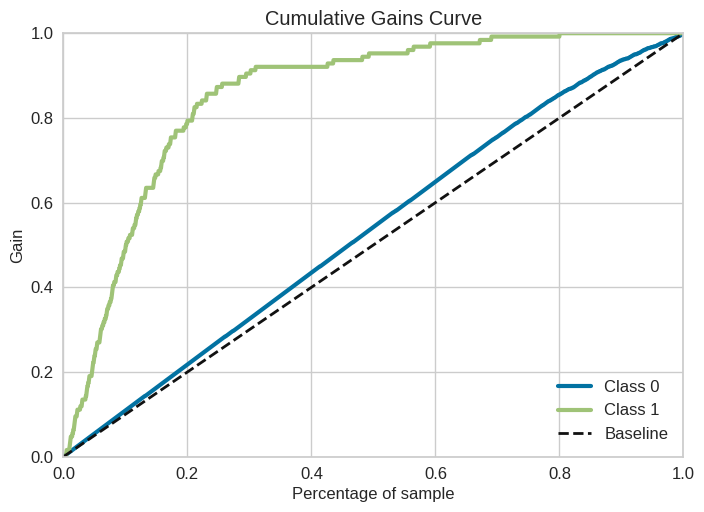

In [24]:
y_probas17= knn.predict_proba(X_Test)
skplt.metrics.plot_cumulative_gain(Y_Test, y_probas17)
plt.show()

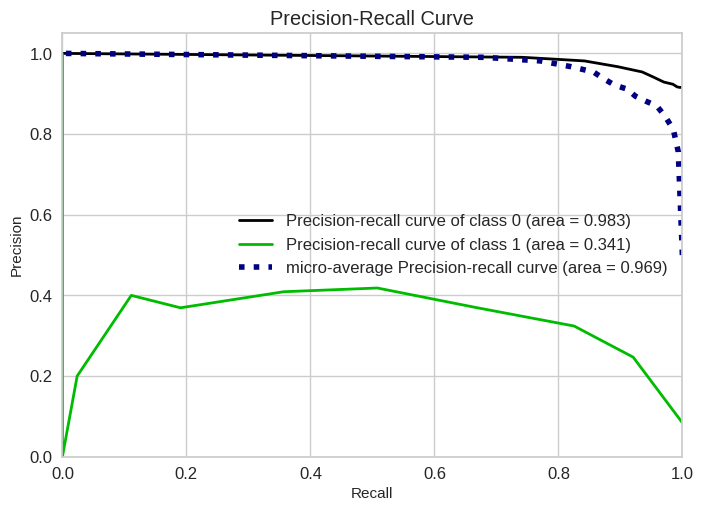

In [25]:
skplt.metrics.plot_precision_recall(Y_Test, y_probas17)
plt.show()


In [ ]:
# Naive Bayes

In [26]:
# Model
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)
prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8786666666666667

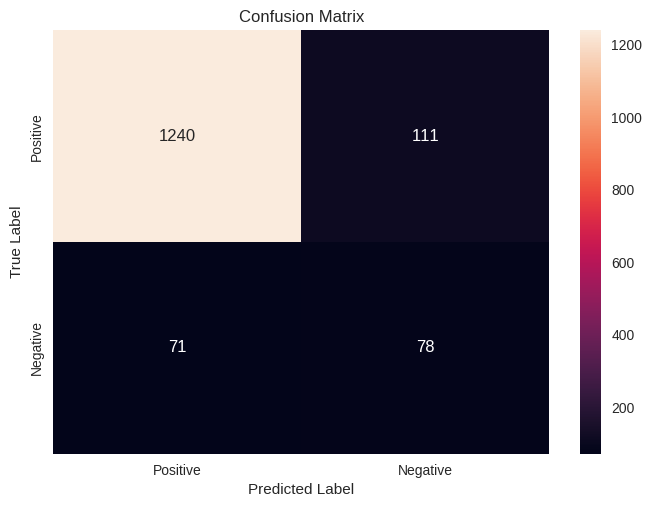

In [27]:
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
# Classififcation Report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.41      0.52      0.46       149

    accuracy                           0.88      1500
   macro avg       0.68      0.72      0.70      1500
weighted avg       0.89      0.88      0.88      1500



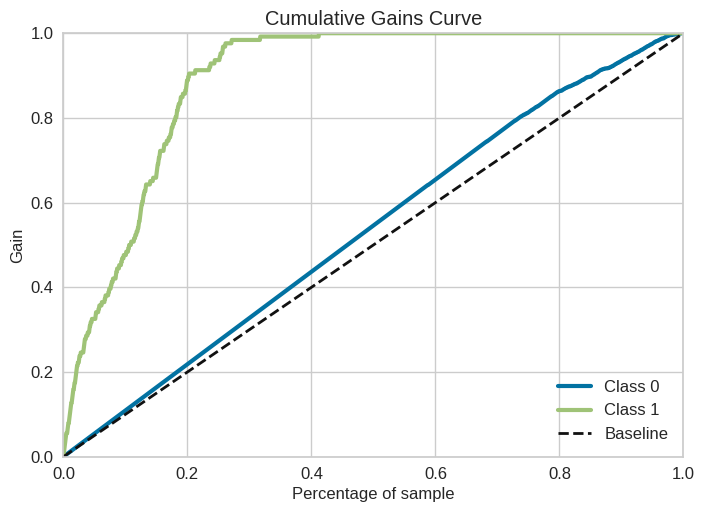

In [29]:
y_probas67 = naive_model.predict_proba(X_Test)
skplt.metrics.plot_cumulative_gain(Y_Test, y_probas67)
plt.show()

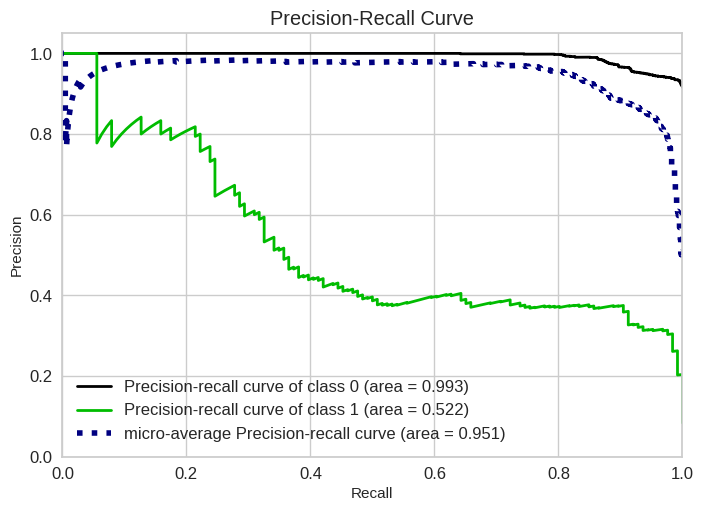

In [30]:
skplt.metrics.plot_precision_recall(Y_Test, y_probas67)
plt.show()

In [ ]:
# Model Comparison

KNN: 0.900200 (0.010137)
LR: 0.927600 (0.016752)
NB: 0.887400 (0.020862)


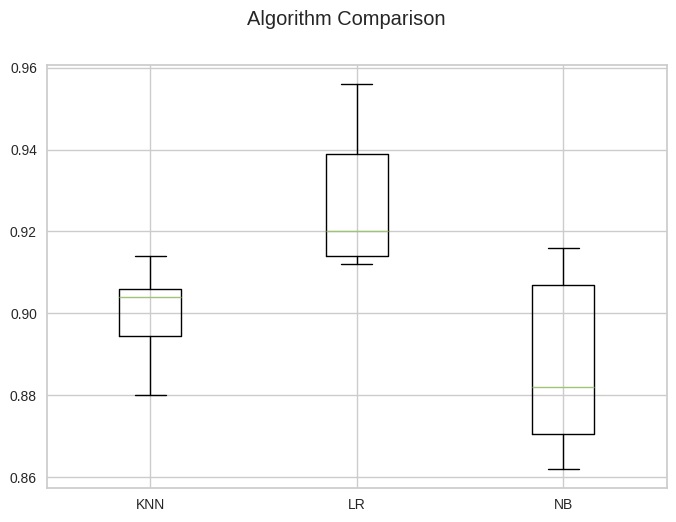

In [32]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# 6. Print the confusion matrix for all the above models

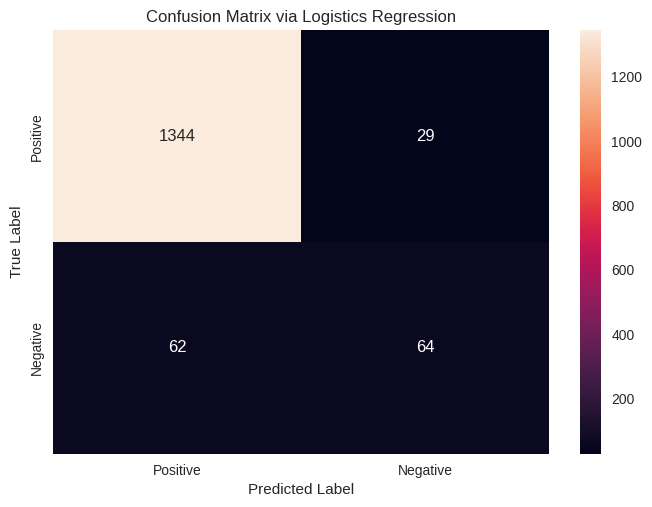

In [33]:
# Confusion Matrix
cm = confusion_matrix(Y_Test, predict)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix via Logistics Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

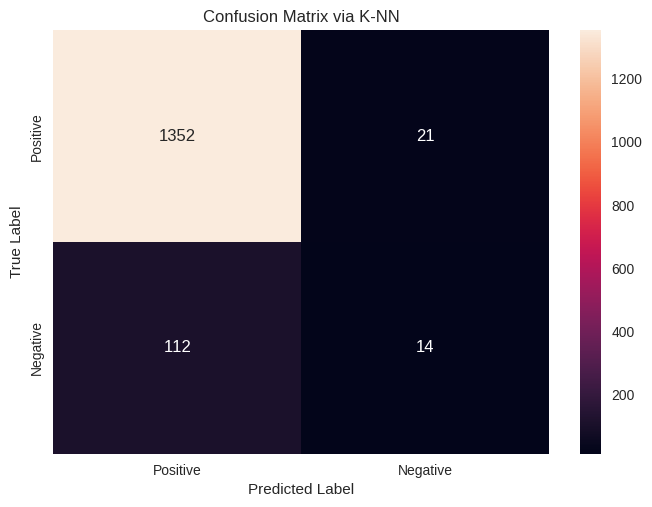

In [34]:
# Confusion Matrix
cm1 = confusion_matrix(Y_Test, predicted)
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix via K-NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

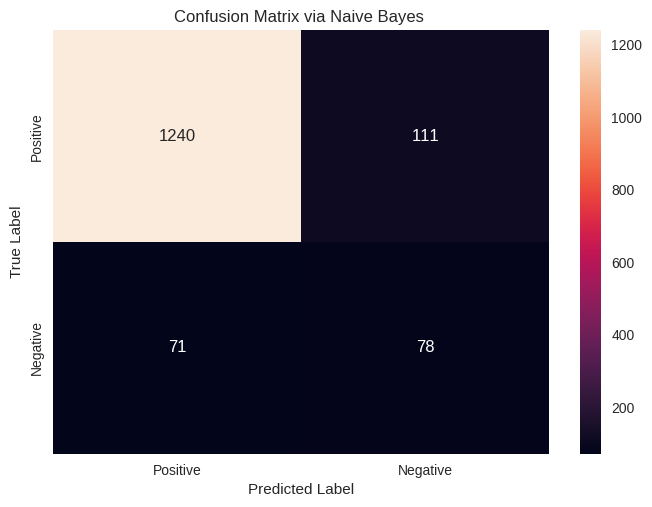

In [35]:
# Confusion Matrix
cm2 = confusion_matrix(test_labels, prediction)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix via Naive Bayes ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# 7. Give your reasoning on which is the best model in this case and why it performs better?



KNN: 0.900200 (0.010137)
LR: 0.927600 (0.016752)
NB: 0.887400 (0.020862)


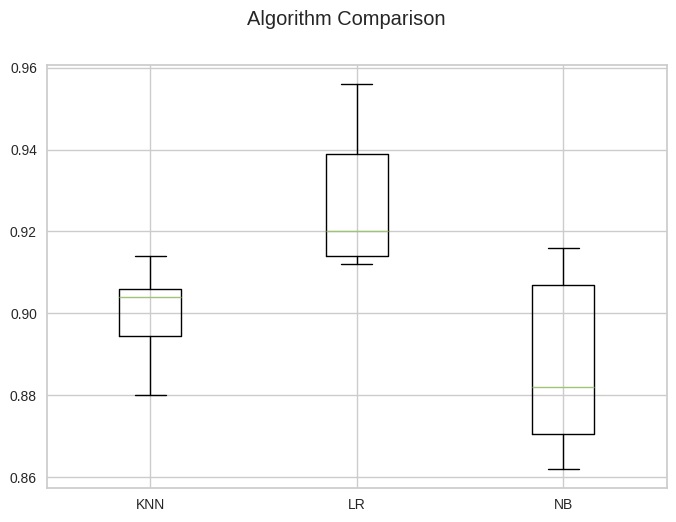

In [38]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:

#Summary

    #The aim of the Bank is to convert there liability customers into loan customers.
    #They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
    #Three classification algorithms were used in this study.
    #From the above graph , it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model


   # The logistic Regression model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to other models.

#The requirement is to classify the target. The KNN is distance based which not perfect for this situation.Though the accuracy is good but confusion matrix tells that is correct predictions is not that much acceptable.

#The Naive Bayes giving the ccuracy less in comaprision to other models meaning the probability of determing the target correctly is less.




In [ ]:
#### Another apporach for model, cleaning the outlier in the dataset for Zscore greater than 3, scaling the data via standardization, ROC , others

In [39]:
bank_per_loan_1_df = copy.deepcopy(bank_per_loan_df)
bank_per_loan_1_df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [ ]:
#Due to these outliers’ bulk of the data in the Mortgage is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the z-score.

In [40]:
bank_per_loan_1_df['Mortgage_zscore'] = np.abs(stats.zscore(bank_per_loan_1_df['Mortgage']))
bank_per_loan_1_df = bank_per_loan_1_df[bank_per_loan_1_df['Mortgage_zscore']<3]
bank_per_loan_1_df.drop('Mortgage_zscore', axis =1, inplace =True)

In [41]:
bank_per_loan_1_df.shape

(4895, 14)

In [ ]:
#Removed the outlier
#Here I had chosen those rows only whose z_score is less than 3, it can vary accordingly. Here we had dropped more than 100+ rows which contain outliers and now we can start with the model building

In [42]:
bank_per_loan_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4895 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4895 non-null   int64  
 1   Age                 4895 non-null   int64  
 2   Experience          4895 non-null   int64  
 3   Income              4895 non-null   int64  
 4   ZIP Code            4895 non-null   int64  
 5   Family              4895 non-null   int64  
 6   CCAvg               4895 non-null   float64
 7   Education           4895 non-null   int64  
 8   Mortgage            4895 non-null   int64  
 9   Personal Loan       4895 non-null   int64  
 10  Securities Account  4895 non-null   int64  
 11  CD Account          4895 non-null   int64  
 12  Online              4895 non-null   int64  
 13  CreditCard          4895 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 573.6 KB


In [ ]:
#Also, no need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.

In [43]:
#also droping - 'ID','Experience'
bank_per_loan_1_df.drop('ID', axis =1, inplace =True)
bank_per_loan_1_df.drop('Experience', axis =1, inplace =True)
bank_per_loan_1_df.drop('ZIP Code', axis =1, inplace =True)
bank_per_loan_1_df.shape

(4895, 11)

In [44]:
bank_per_loan_1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4895 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4895 non-null   int64  
 1   Income              4895 non-null   int64  
 2   Family              4895 non-null   int64  
 3   CCAvg               4895 non-null   float64
 4   Education           4895 non-null   int64  
 5   Mortgage            4895 non-null   int64  
 6   Personal Loan       4895 non-null   int64  
 7   Securities Account  4895 non-null   int64  
 8   CD Account          4895 non-null   int64  
 9   Online              4895 non-null   int64  
 10  CreditCard          4895 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 458.9 KB


In [ ]:
# Logistic Regression

In [45]:
X_1 = bank_per_loan_1_df.drop('Personal Loan', axis =1)
y_1 = bank_per_loan_1_df['Personal Loan']

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1,test_size=0.3, random_state = 2)

In [46]:
LogReg_model = LogisticRegression()
LogReg_model.fit(X1_train,y1_train)

LogisticRegression()

In [47]:
y_1_pred = LogReg_model.predict(X1_test)
print(classification_report(y1_test,y_1_pred))
print(accuracy_score(y1_test,y_1_pred))
print(confusion_matrix(y1_test,y_1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.80      0.63      0.70       118

    accuracy                           0.96      1469
   macro avg       0.89      0.81      0.84      1469
weighted avg       0.95      0.96      0.96      1469

0.9577944179714091
[[1333   18]
 [  44   74]]


In [48]:
LogReg_prob = LogReg_model.predict_proba(X1_test)
fpr1,tpr1, thresholds1 = roc_curve(y1_test, LogReg_prob[:,1])
roc_auc1 = auc(fpr1,tpr1)
print("Area under the ROC curve  :  %f" %roc_auc1)

Area under the ROC curve  :  0.956805


In [ ]:
#### STANDARDIZATION

In [49]:
col_names_standard = bank_per_loan_1_df.columns
scaler_1 = preprocessing.StandardScaler()
scaled_X1_train = scaler_1.fit_transform(X1_train)
scaled_X1_test = scaler_1.fit_transform(X1_test)

In [50]:
LogReg_scaled_model = LogisticRegression()
LogReg_scaled_model.fit(scaled_X1_train,y1_train)

LogisticRegression()

In [51]:
y_1_scaled_pred = LogReg_scaled_model.predict(scaled_X1_test)
print(classification_report(y1_test,y_1_scaled_pred))
print(accuracy_score(y1_test,y_1_scaled_pred))
print(confusion_matrix(y1_test,y_1_scaled_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.80      0.66      0.73       118

    accuracy                           0.96      1469
   macro avg       0.89      0.82      0.85      1469
weighted avg       0.96      0.96      0.96      1469

0.9598366235534377
[[1332   19]
 [  40   78]]


In [52]:
LogReg_scaled_prob = LogReg_scaled_model.predict_proba(scaled_X1_test)
fpr2,tpr2, thresholds2 = roc_curve(y1_test, LogReg_scaled_prob[:,1])
roc_auc2 = auc(fpr2,tpr2)
print("Area under the ROC curve  :  %f" % roc_auc2)

Area under the ROC curve  :  0.966171


In [ ]:
#We get an increase in accuracy and clearly see the difference between evaluation metrics with standardization of the data. As mentioned before, accuracy alone can’t define my model how well it predicted so we will play with recall now.

In [ ]:
#We get a recall value of 66%, which means our model did much better in predicting True Positives.

#Also, the area under the curve is around 96%, much higher than previously.

#Further, we will analyze other models with only scaled data.

In [ ]:
# Naive Bayes

In [53]:
naive_model_2 = GaussianNB()
naive_model_2.fit(scaled_X1_train, y1_train)

y_2_scaled_pred = naive_model_2.predict(scaled_X1_test)
print(classification_report(y1_test,y_2_scaled_pred))
print(accuracy_score(y1_test,y_2_scaled_pred))
print(confusion_matrix(y1_test,y_2_scaled_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1351
           1       0.43      0.64      0.51       118

    accuracy                           0.90      1469
   macro avg       0.70      0.78      0.73      1469
weighted avg       0.92      0.90      0.91      1469

0.9033356024506467
[[1252   99]
 [  43   75]]


In [54]:
naive_scaled_prob = naive_model_2.predict_proba(scaled_X1_test)
fpr3,tpr3, thresholds3 = roc_curve(y1_test, naive_scaled_prob[:,1])
roc_auc3 = auc(fpr3,tpr3)
print("Area under the ROC curve  :  %f" % roc_auc3)

Area under the ROC curve  :  0.938225


In [ ]:
#We got an accuracy score of around 90% with a recall value of 64% which is much less as compared to the Logistic Regression.

#Also, the area under the curve is around 93%, less than the logistic regression one.

#Hence Naive Bayes terms out to be not a good classifier with this particular dataset.

In [ ]:
# kNN

In [55]:
kNN_scaled_model = KNeighborsClassifier(n_neighbors= 3)
kNN_scaled_model.fit(scaled_X1_train, y1_train)

y_3_scaled_pred = kNN_scaled_model.predict(scaled_X1_test)
print(classification_report(y1_test,y_3_scaled_pred))
print(accuracy_score(y1_test,y_3_scaled_pred))
print(confusion_matrix(y1_test,y_3_scaled_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.92      0.75      0.83       118

    accuracy                           0.97      1469
   macro avg       0.95      0.87      0.91      1469
weighted avg       0.97      0.97      0.97      1469

0.9748127978216474
[[1343    8]
 [  29   89]]


In [56]:
kNN_scaled_prob = kNN_scaled_model.predict_proba(scaled_X1_test)
fpr4,tpr4, thresholds4 = roc_curve(y1_test, kNN_scaled_prob[:,1])
roc_auc4 = auc(fpr4,tpr4)
print("Area under the ROC curve  :  %f" % roc_auc4)

Area under the ROC curve  :  0.935139


In [ ]:
#And here we are with around 97% accuracy in determining if a customer will buy the personal loan or not. Also, the recall value is 75% is much better than logistic regression and Naive Bayes algorithms. Also, the area under the curve is fairly good.

In [ ]:
# SVM (Support Vector Machine)

In [57]:
clf_1 = svm.SVC(C=3, kernel ='rbf', probability = True)
clf_1.fit(scaled_X1_train, y1_train)

y_4_scaled_pred = clf_1.predict(scaled_X1_test)
print(classification_report(y1_test,y_4_scaled_pred))
print(accuracy_score(y1_test,y_4_scaled_pred))
print(confusion_matrix(y1_test,y_4_scaled_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.93      0.81      0.87       118

    accuracy                           0.98      1469
   macro avg       0.96      0.90      0.93      1469
weighted avg       0.98      0.98      0.98      1469

0.9802586793737236
[[1344    7]
 [  22   96]]


In [58]:
svm_scaled_prob = clf_1.predict_proba(scaled_X1_test)
fpr5,tpr5, thresholds5 = roc_curve(y1_test, svm_scaled_prob[:,1])
roc_auc5 = auc(fpr5,tpr5)
print("Area under the ROC curve  :  %f" % roc_auc5)

Area under the ROC curve  :  0.991243


In [ ]:
#We got 98% accuracy score with 81% recall value, also the area under the curve is about 99%… JUST WOW…!

In [ ]:
## Another  approach, by breaking down the features into sub category,  then doing the model analysis

In [177]:
loan_ml1_df = copy.deepcopy(bank_per_loan_df)
loan_ml1_df = loan_ml1_df.drop('Experience', axis=1)
loan_ml1_df = loan_ml1_df.drop('ID', axis=1)
loan_ml1_df

Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25      49     91107       4    1.6          1         0   
1      45      34     90089       3    1.5          1         0   
2      39      11     94720       1    1.0          1         0   
3      35     100     94112       1    2.7          2         0   
4      35      45     91330       4    1.0          2         0   
...   ...     ...       ...     ...    ...        ...       ...   
4995   29      40     92697       1    1.9          3         0   
4996   30      15     92037       4    0.4          1        85   
4997   63      24     93023       2    0.3          3         0   
4998   65      49     90034       3    0.5          2         0   
4999   28      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [186]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        #bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    #iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = pd.concat([IV, pd.DataFrame([new_row])], ignore_index=True)
    iv = iv.reset_index()
    return(iv_df,iv)

In [188]:
import pandas as pd
import numpy as np
from pandas import Series
from scipy import stats
import re
import traceback

max_bin = 20
force_bin = 3

def mono_bin(Y, X, n=max_bin):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[df1.X.isnull()]
    notmiss = df1[df1.X.notnull()]
    r = 0

    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, _ = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1] - (bins[1] / 2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y,
                           "Bucket": pd.cut(notmiss.X, np.unique(bins), include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({
        "MIN_VALUE": d2.min().X,
        "MAX_VALUE": d2.max().X,
        "COUNT": d2.count().Y,
        "EVENT": d2.sum().Y
    })
    d3["NONEVENT"] = d3.COUNT - d3.EVENT
    d3 = d3.reset_index(drop=True)

    if len(justmiss) > 0:
        d4 = pd.DataFrame({
            'MIN_VALUE': [np.nan],
            'MAX_VALUE': [np.nan],
            'COUNT': [justmiss.Y.count()],
            'EVENT': [justmiss.Y.sum()],
            'NONEVENT': [justmiss.Y.count() - justmiss.Y.sum()]
        })
        d3 = pd.concat([d3, d4], ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.EVENT.sum()
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.NONEVENT.sum()
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT).replace([np.inf, -np.inf], 0)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * d3.WOE
    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE','IV']]
    d3.IV = d3.IV.sum()
    return d3

def char_bin(Y, X):
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[df1.X.isnull()]
    notmiss = df1[df1.X.notnull()]
    df2 = notmiss.groupby('X', as_index=True)

    d3 = pd.DataFrame({
        "MIN_VALUE": df2.sum().Y.index,
        "MAX_VALUE": df2.sum().Y.index,
        "COUNT": df2.count().Y,
        "EVENT": df2.sum().Y
    })
    d3["NONEVENT"] = d3.COUNT - d3.EVENT
    d3 = d3.reset_index(drop=True)

    if len(justmiss) > 0:
        d4 = pd.DataFrame({
            'MIN_VALUE': [np.nan],
            'MAX_VALUE': [np.nan],
            'COUNT': [justmiss.Y.count()],
            'EVENT': [justmiss.Y.sum()],
            'NONEVENT': [justmiss.Y.count() - justmiss.Y.sum()]
        })
        d3 = pd.concat([d3, d4], ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT / d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT / d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT / d3.EVENT.sum()
    d3["DIST_NON_EVENT"] = d3.NONEVENT / d3.NONEVENT.sum()
    d3["WOE"] = np.log(d3.DIST_EVENT / d3.DIST_NON_EVENT).replace([np.inf, -np.inf], 0)
    d3["IV"] = (d3.DIST_EVENT - d3.DIST_NON_EVENT) * d3.WOE
    d3["VAR_NAME"] = "VAR"

    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE',
             'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE','IV']]
    d3.IV = d3.IV.sum()
    return d3

def data_vars(df1, target):
    x = df1.columns
    iv_list = []

    for i in x:
        if i.upper() != target.name.upper():
            if np.issubdtype(df1[i], np.number) and df1[i].nunique() > 2:
                conv = mono_bin(target, df1[i])
            else:
                conv = char_bin(target, df1[i])
            conv["VAR_NAME"] = i
            iv_list.append(conv)

    iv_df = pd.concat(iv_list, ignore_index=True)
    iv_summary = iv_df.groupby('VAR_NAME', as_index=False)['IV'].max()
    return iv_df, iv_summary


In [189]:
final_iv, IV = data_vars(loan_ml1_df,loan_ml1_df['Personal Loan'])



In [190]:
final_iv

VAR_NAME  MIN_VALUE  MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0                  Age       23.0       45.0   2519    248    0.098452   
1                  Age       46.0       67.0   2481    232    0.093511   
2               Income        8.0       39.0   1312      0    0.000000   
3               Income       40.0       64.0   1238      2    0.001616   
4               Income       65.0       98.0   1204     34    0.028239   
5               Income       99.0      224.0   1246    444    0.356340   
6                CCAvg        0.0        0.9   1683     47    0.027926   
7                CCAvg        1.0        2.1   1664     52    0.031250   
8                CCAvg        2.2       10.0   1653    381    0.230490   
9             Mortgage        0.0        0.0   3462    312    0.090121   
10            Mortgage       75.0      635.0   1538    168    0.109233   
11  Securities Account        0.0        0.0   4478    420    0.093792   
12  Securities Account        1.0        1.0    522     60    0.114943   
13          CD Account        0.0        0.0   4698    340    0.072371   
14          CD Account        1.0        1.0    302    140    0.463576   
15              Online        0.0        0.0   2016    189    0.093750   
16              Online        1.0        1.0   2984    291    0.097520   
17          CreditCard        0.0        0.0   3530    337    0.095467   
18          CreditCard        1.0        1.0   1470    143    0.097279   
19          California        0.0        0.0      6      0    0.000000   
20          California        1.0        1.0   4994    480    0.096115   
21       undergraduate        0.0        0.0   2904    387    0.133264   
22       undergraduate        1.0        1.0   2096     93    0.044370   
23            graduate        0.0        0.0   3597    298    0.082847   
24            graduate        1.0        1.0   1403    182    0.129722   
25            family_1        0.0        0.0   3528    373    0.105726   
26            family_1        1.0        1.0   1472    107    0.072690   
27            family_2        0.0        0.0   3704    374    0.100972   
28            family_2        1.0        1.0   1296    106    0.081790   
29            family_3        0.0        0.0   3990    347    0.086967   
30            family_3        1.0        1.0   1010    133    0.131683   

    NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0       2271        0.901548    0.516667        0.502434  0.027934  0.000811  
1       2249        0.906489    0.483333        0.497566 -0.029022  0.000811  
2       1312        1.000000    0.000000        0.290265  0.000000  2.604722  
3       1236        0.998384    0.004167        0.273451 -4.184007  2.604722  
4       1170        0.971761    0.070833        0.258850 -1.295917  2.604722  
5        802        0.643660    0.925000        0.177434  1.651197  2.604722  
6       1636        0.972074    0.097917        0.361947 -1.307381  1.172301  
7       1612        0.968750    0.108333        0.356637 -1.191506  1.172301  
8       1272        0.769510    0.793750        0.281416  1.036935  1.172301  
9       3150        0.909879    0.650000        0.696903 -0.069673  0.010016  
10      1370        0.890767    0.350000        0.303097  0.143879  0.010016  
11      4058        0.906208    0.875000        0.897788 -0.025710  0.005172  
12       462        0.885057    0.125000        0.102212  0.201261  0.005172  
13      4358        0.927629    0.708333        0.964159 -0.308342  0.615228  
14       162        0.536424    0.291667        0.035841  2.096527  0.615228  
15      1827        0.906250    0.393750        0.404204 -0.026202  0.000456  
16      2693        0.902480    0.606250        0.595796  0.017393  0.000456  
17      3193        0.904533    0.702083        0.706416 -0.006152  0.000090  
18      1327        0.902721    0.297917        0.293584  0.014650  0.000090  
19         6        1.000000    0.000000        0.001327  0.00000

In [191]:
IV

VAR_NAME        IV
0                  Age  0.000811
1                CCAvg  1.172301
2           CD Account  0.615228
3           California  0.000002
4           CreditCard  0.000090
5               Income  2.604722
6             Mortgage  0.010016
7               Online  0.000456
8   Securities Account  0.005172
9             family_1  0.032493
10            family_2  0.009838
11            family_3  0.038628
12            graduate  0.054611
13       undergraduate  0.298622

In [192]:
IV.sort_values('IV')

VAR_NAME        IV
3           California  0.000002
4           CreditCard  0.000090
7               Online  0.000456
0                  Age  0.000811
8   Securities Account  0.005172
10            family_2  0.009838
6             Mortgage  0.010016
9             family_1  0.032493
11            family_3  0.038628
12            graduate  0.054611
13       undergraduate  0.298622
2           CD Account  0.615228
1                CCAvg  1.172301
5               Income  2.604722

In [179]:
loan_ml1_df['California']=(loan_ml1_df['ZIP Code']<96200).astype(int)
loan_ml1_df['undergraduate']=(loan_ml1_df['Education']==1).astype(int)
loan_ml1_df['graduate']=(loan_ml1_df['Education']==2).astype(int)
loan_ml1_df['family_1']=(loan_ml1_df['Family']==1).astype(int)
loan_ml1_df['family_2']=(loan_ml1_df['Family']==2).astype(int)
loan_ml1_df['family_3']=(loan_ml1_df['Family']==3).astype(int)
loan_ml1_df=loan_ml1_df.drop('ZIP Code',axis=1)
loan_ml1_df=loan_ml1_df.drop('Education',axis=1)
loan_ml1_df=loan_ml1_df.drop('Family',axis=1)
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  undergraduate  graduate  \
0              0       0           0           1              1         0   
1              0       0           0           1              1         0   
2              0       0           0           1              1         0   
3              0       0           0           1              0         1   
4              0       0           1           1              0         1   
...          ...     ...         ...         ...            ...       ...   
4995           0       1           0           1              0         0   
4996           0       1           0           1              1         0   
4997           0       0           0           1              0         0   
4998           0       1           0           1              0         1   
4999           0       1           1           1              1         0   

      family_1  family_2  family_3  
0            0         0         0  
1            0         0         1  
2            1         0         0  
3            1         0         0  
4            0         0         0  
...        ...       ...       ...  
4995         1         0         0  
4996         0         0         0  
4997         0         1         0  
4998         0         0         1  
4999         0         0         1  

[5000 rows x 15 columns]

In [67]:
loan_ml1_df['Age_0_25']=(loan_ml1_df['Age']<=25).astype(int)
loan_ml1_df['Age_25_30']=(loan_ml1_df['Age']>25).astype(int) & (loan_ml1_df['Age']<=30).astype(int)
loan_ml1_df['Age_30_35']=(loan_ml1_df['Age']>30).astype(int) & (loan_ml1_df['Age']<=35).astype(int)
loan_ml1_df['Age_35_40']=(loan_ml1_df['Age']>35).astype(int) & (loan_ml1_df['Age']<=40).astype(int)
loan_ml1_df['Age_40_45']=(loan_ml1_df['Age']>40).astype(int) & (loan_ml1_df['Age']<=45).astype(int)
loan_ml1_df['Age_45_50']=(loan_ml1_df['Age']>45).astype(int) & (loan_ml1_df['Age']<=50).astype(int)
loan_ml1_df['Age_50_55']=(loan_ml1_df['Age']>50).astype(int) & (loan_ml1_df['Age']<=55).astype(int)
loan_ml1_df['Age_55_60']=(loan_ml1_df['Age']>55).astype(int) & (loan_ml1_df['Age']<=60).astype(int)
loan_ml1_df['Age_60_65']=(loan_ml1_df['Age']>60).astype(int) & (loan_ml1_df['Age']<=65).astype(int)
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  ...  family_3  Age_0_25  \
0              0       0           0           1  ...         0         1   
1              0       0           0           1  ...         1         0   
2              0       0           0           1  ...         0         0   
3              0       0           0           1  ...         0         0   
4              0       0           1           1  ...         0         0   
...          ...     ...         ...         ...  ...       ...       ...   
4995           0       1           0           1  ...         0         0   
4996           0       1           0           1  ...         0         0   
4997           0       0           0           1  ...         0         0   
4998           0       1           0           1  ...         1         0   
4999           0       1           1           1  ...         1         0   

      Age_25_30  Age_30_35  Age_35_40  Age_40_45  Age_45_50  Age_50_55  \
0             0          0          0          0          0          0   
1             0          0          0          1          0          0   
2             0          0          1          0          0          0   
3             0          1          0          0          0          0   
4             0          1          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4995          1          0          0          0          0          0   
4996          1          0          0          0          0          0   
4997          0          0          0          0          0          0   
4998          0          0          0          0          0          0   
4999          1          0          0          0          0          0   

      Age_55_60  Age_60_65  
0             0          0  
1             0          0  
2             0          0  
3             0          0  
4             0          0  
...         ...        ...  
4995          0          0  
4996          0          0  
4997          0          1  
4998          0          1  
4999          0          0  

[5000 rows x 24 columns]

In [68]:
loan_ml1_df['CC_0_1']=(loan_ml1_df['CCAvg']<=1).astype(int)
loan_ml1_df['CC_1_2']=(loan_ml1_df['CCAvg']>1).astype(int) & (loan_ml1_df['CCAvg']<=2).astype(int)
loan_ml1_df['CC_2_3']=(loan_ml1_df['CCAvg']>2).astype(int) & (loan_ml1_df['CCAvg']<=3).astype(int)
loan_ml1_df['CC_3_4']=(loan_ml1_df['CCAvg']>3).astype(int) & (loan_ml1_df['CCAvg']<=4).astype(int)
loan_ml1_df['CC_4_5']=(loan_ml1_df['CCAvg']>4).astype(int) & (loan_ml1_df['CCAvg']<=5).astype(int)
loan_ml1_df['CC_5_6']=(loan_ml1_df['CCAvg']>5).astype(int) & (loan_ml1_df['CCAvg']<=6).astype(int)
loan_ml1_df['CC_6_7']=(loan_ml1_df['CCAvg']>6).astype(int) & (loan_ml1_df['CCAvg']<=7).astype(int)
loan_ml1_df['CC_7_8']=(loan_ml1_df['CCAvg']>7).astype(int) & (loan_ml1_df['CCAvg']<=8).astype(int)
loan_ml1_df['CC_8_9']=(loan_ml1_df['CCAvg']>8).astype(int) & (loan_ml1_df['CCAvg']<=9).astype(int)
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  ...  Age_60_65  CC_0_1  \
0              0       0           0           1  ...          0       0   
1              0       0           0           1  ...          0       0   
2              0       0           0           1  ...          0       1   
3              0       0           0           1  ...          0       0   
4              0       0           1           1  ...          0       1   
...          ...     ...         ...         ...  ...        ...     ...   
4995           0       1           0           1  ...          0       0   
4996           0       1           0           1  ...          0       1   
4997           0       0           0           1  ...          1       1   
4998           0       1           0           1  ...          1       1   
4999           0       1           1           1  ...          0       1   

      CC_1_2  CC_2_3  CC_3_4  CC_4_5  CC_5_6  CC_6_7  CC_7_8  CC_8_9  
0          1       0       0       0       0       0       0       0  
1          1       0       0       0       0       0       0       0  
2          0       0       0       0       0       0       0       0  
3          0       1       0       0       0       0       0       0  
4          0       0       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...     ...     ...  
4995       1       0       0       0       0       0       0       0  
4996       0       0       0       0       0       0       0       0  
4997       0       0       0       0       0       0       0       0  
4998       0       0       0       0       0       0       0       0  
4999       0       0       0       0       0       0       0       0  

[5000 rows x 33 columns]

In [69]:
loan_ml1_df['Income_0_20']=(loan_ml1_df['Income']<=20).astype(int)
loan_ml1_df['Income_20_40']=(loan_ml1_df['Income']>20).astype(int) & (loan_ml1_df['Income']<=40).astype(int)
loan_ml1_df['Income_40_60']=(loan_ml1_df['Income']>40).astype(int) & (loan_ml1_df['Income']<=60).astype(int)
loan_ml1_df['Income_60_80']=(loan_ml1_df['Income']>60).astype(int) & (loan_ml1_df['Income']<=80).astype(int)
loan_ml1_df['Income_80_100']=(loan_ml1_df['Income']>80).astype(int) & (loan_ml1_df['Income']<=100).astype(int)
loan_ml1_df['Income_100_120']=(loan_ml1_df['Income']>100).astype(int) & (loan_ml1_df['Income']<=120).astype(int)
loan_ml1_df['Income_120_140']=(loan_ml1_df['Income']>120).astype(int) & (loan_ml1_df['Income']<=140).astype(int)
loan_ml1_df['Income_140_160']=(loan_ml1_df['Income']>140).astype(int) & (loan_ml1_df['Income']<=160).astype(int)
loan_ml1_df['Income_160_180']=(loan_ml1_df['Income']>160).astype(int) & (loan_ml1_df['Income']<=180).astype(int)
loan_ml1_df['Income_180_200']=(loan_ml1_df['Income']>180).astype(int) & (loan_ml1_df['Income']<=200).astype(int)
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  ...  Income_0_20  \
0              0       0           0           1  ...            0   
1              0       0           0           1  ...            0   
2              0       0           0           1  ...            1   
3              0       0           0           1  ...            0   
4              0       0           1           1  ...            0   
...          ...     ...         ...         ...  ...          ...   
4995           0       1           0           1  ...            0   
4996           0       1           0           1  ...            1   
4997           0       0           0           1  ...            0   
4998           0       1           0           1  ...            0   
4999           0       1           1           1  ...            0   

      Income_20_40  Income_40_60  Income_60_80  Income_80_100  Income_100_120  \
0                0             1             0              0               0   
1                1             0             0              0               0   
2                0             0             0              0               0   
3                0             0             0              1               0   
4                0             1             0              0               0   
...            ...           ...           ...            ...             ...   
4995             1             0             0              0               0   
4996             0             0             0              0               0   
4997             1             0             0              0               0   
4998             0             1             0              0               0   
4999             0             0             0              1               0   

      Income_120_140  Income_140_160  Income_160_180  Income_180_200  
0                  0               0               0               0  
1                  0               0               0               0  
2                  0               0               0               0  
3                  0               0               0               0  
4                  0               0               0               0  
...              ...             ...             ...             ...  
4995               0               0               0               0  
4996               0               0               0               0  
4997               0               0               0               0  
4998               0               0               0               0  
4999               0               0               0               0  

[5000 rows x 43 columns]

In [70]:
loan_ml1_df['Mortgage_0_75']=(loan_ml1_df['Mortgage']==0).astype(int)
loan_ml1_df['Mortgage_75_125']=(loan_ml1_df['Mortgage']>=75).astype(int) & (loan_ml1_df['Mortgage']<125).astype(int)
loan_ml1_df['Mortgage_125_175']=(loan_ml1_df['Mortgage']>=125).astype(int) & (loan_ml1_df['Mortgage']<175).astype(int)
loan_ml1_df['Mortgage_175_225']=(loan_ml1_df['Mortgage']>=175).astype(int) & (loan_ml1_df['Mortgage']<225).astype(int)
loan_ml1_df['Mortgage_225_275']=(loan_ml1_df['Mortgage']>=225).astype(int) & (loan_ml1_df['Mortgage']<275).astype(int)
loan_ml1_df['Mortgage_275_325']=(loan_ml1_df['Mortgage']>=275).astype(int) & (loan_ml1_df['Mortgage']<325).astype(int)
loan_ml1_df['Mortgage_325_400']=(loan_ml1_df['Mortgage']>=325).astype(int) & (loan_ml1_df['Mortgage']<400).astype(int)
loan_ml1_df['Mortgage_400_500']=(loan_ml1_df['Mortgage']>=400).astype(int) & (loan_ml1_df['Mortgage']<500).astype(int)
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  ...  Income_160_180  \
0              0       0           0           1  ...               0   
1              0       0           0           1  ...               0   
2              0       0           0           1  ...               0   
3              0       0           0           1  ...               0   
4              0       0           1           1  ...               0   
...          ...     ...         ...         ...  ...             ...   
4995           0       1           0           1  ...               0   
4996           0       1           0           1  ...               0   
4997           0       0           0           1  ...               0   
4998           0       1           0           1  ...               0   
4999           0       1           1           1  ...               0   

      Income_180_200  Mortgage_0_75  Mortgage_75_125  Mortgage_125_175  \
0                  0              1                0                 0   
1                  0              1                0                 0   
2                  0              1                0                 0   
3                  0              1                0                 0   
4                  0              1                0                 0   
...              ...            ...              ...               ...   
4995               0              1                0                 0   
4996               0              0                1                 0   
4997               0              1                0                 0   
4998               0              1                0                 0   
4999               0              1                0                 0   

      Mortgage_175_225  Mortgage_225_275  Mortgage_275_325  Mortgage_325_400  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
4995                 0                 0                 0                 0   
4996                 0                 0                 0                 0   
4997                 0                 0                 0                 0   
4998                 0                 0                 0                 0   
4999                 0                 0                 0                 0   

      Mortgage_400_500  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
4995                 0  
4996                 0  
4997                 0  
4998                 0  
4999                 0  

[5000 rows x 51 columns]

In [71]:
loan_ml1_df[['Age_sq','Income_sq','CCAvg_sq','Mortgage_sq']]=loan_ml1_df[['Age','Income','CCAvg','Mortgage']].apply(lambda x: np.square(x))
loan_ml1_df[['Age_sqrt','Income_sqrt','CCAvg_sqrt','Mortgage_sqrt']]=loan_ml1_df[['Age','Income','CCAvg','Mortgage']].apply(lambda x: np.sqrt(x))
loan_ml1_df[['Age_ln','Income_ln','CCAvg_ln','Mortgage_ln']]=loan_ml1_df[['Age','Income','CCAvg','Mortgage']].apply(lambda x: np.log(x))
loan_ml1_df

Age  Income  CCAvg  Mortgage  Personal Loan  Securities Account  \
0      25      49    1.6         0              0                   1   
1      45      34    1.5         0              0                   1   
2      39      11    1.0         0              0                   0   
3      35     100    2.7         0              0                   0   
4      35      45    1.0         0              0                   0   
...   ...     ...    ...       ...            ...                 ...   
4995   29      40    1.9         0              0                   0   
4996   30      15    0.4        85              0                   0   
4997   63      24    0.3         0              0                   0   
4998   65      49    0.5         0              0                   0   
4999   28      83    0.8         0              0                   0   

      CD Account  Online  CreditCard  California  ...  CCAvg_sq  Mortgage_sq  \
0              0       0           0           1  ...      2.56            0   
1              0       0           0           1  ...      2.25            0   
2              0       0           0           1  ...      1.00            0   
3              0       0           0           1  ...      7.29            0   
4              0       0           1           1  ...      1.00            0   
...          ...     ...         ...         ...  ...       ...          ...   
4995           0       1           0           1  ...      3.61            0   
4996           0       1           0           1  ...      0.16         7225   
4997           0       0           0           1  ...      0.09            0   
4998           0       1           0           1  ...      0.25            0   
4999           0       1           1           1  ...      0.64            0   

      Age_sqrt  Income_sqrt  CCAvg_sqrt  Mortgage_sqrt    Age_ln  Income_ln  \
0     5.000000     7.000000    1.264911       0.000000  3.218876   3.891820   
1     6.708204     5.830952    1.224745       0.000000  3.806662   3.526361   
2     6.244998     3.316625    1.000000       0.000000  3.663562   2.397895   
3     5.916080    10.000000    1.643168       0.000000  3.555348   4.605170   
4     5.916080     6.708204    1.000000       0.000000  3.555348   3.806662   
...        ...          ...         ...            ...       ...        ...   
4995  5.385165     6.324555    1.378405       0.000000  3.367296   3.688879   
4996  5.477226     3.872983    0.632456       9.219544  3.401197   2.708050   
4997  7.937254     4.898979    0.547723       0.000000  4.143135   3.178054   
4998  8.062258     7.000000    0.707107       0.000000  4.174387   3.891820   
4999  5.291503     9.110434    0.894427       0.000000  3.332205   4.418841   

      CCAvg_ln  Mortgage_ln  
0     0.470004         -inf  
1     0.405465         -inf  
2     0.000000         -inf  
3     0.993252         -inf  
4     0.000000         -inf  
...        ...          ...  
4995  0.641854         -inf  
4996 -0.916291     4.442651  
4997 -1.203973         -inf  
4998 -0.693147         -inf  
4999 -0.223144         -inf  

[5000 rows x 63 columns]

In [72]:
loan_ml1_df.loc[loan_ml1_df['Mortgage_ln']<0,['Mortgage_ln']]= 0

In [181]:
correl_13 = loan_ml1_df.corr().abs()
# Select upper triangle of correlation matrix
upper = correl_13.where(np.triu(np.ones(correl_13.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop
correl_13.to_csv('file13.csv',index=False)
#correl_13.style.background_gradient(cmap='coolwarm').set_precision(2)
correl_13.style.background_gradient(cmap='coolwarm').format("{:.2f}")

In [74]:
# can remove age and its transformations
# can remove mortgage and its transformations except mortgage_sq
# can remove income transformations
# can remove all CCavg variables
loan_ml1_df.columns
loan_ml1_df_new=loan_ml1_df.drop(['Age','CCAvg','Income','Mortgage','Age_sq', 'Income_sq', 'CCAvg_sq',
                'Age_sqrt','Income_sqrt', 'CCAvg_sqrt', 'Mortgage_sqrt', 'Age_ln','Income_ln',
                'CCAvg_ln', 'Mortgage_ln','Age_0_25', 'Age_25_30', 'Age_30_35','Age_35_40',
                'Age_40_45', 'Age_45_50', 'Age_50_55', 'Age_55_60','Age_60_65','California',
                'Mortgage_sq'],axis=1)
loan_ml1_df_new
# no dependency on online, creditcard, securities account
# Customers having high CCAvg need personal loan
# Family with income less than 100k are less likely to take loan
# higher mortgage is more likely to get the loan
# Income with more than 50 is more likely to get the personal loan
# customers having COD account have high prob of taking loan
# undergraduate has very less prob of taking the loan
# family size of more than 3 are more likely to get the loan
# 'CC_0_1', 'CC_1_2', 'CC_2_3', 'CC_3_4', 'CC_4_5', 'CC_5_6','CC_6_7', 'CC_7_8', 'CC_8_9',
# 'Mortgage_0_75', 'Mortgage_75_125', 'Mortgage_125_175','Mortgage_175_225','Mortgage_225_275', 'Mortgage_275_325', 'Mortgage_325_400', 'Mortgage_400_500',

Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4995              0                   0           0       1           0   
4996              0                   0           0       1           0   
4997              0                   0           0       0           0   
4998              0                   0           0       1           0   
4999              0                   0           0       1           1   

      undergraduate  graduate  family_1  family_2  family_3  ...  \
0                 1         0         0         0         0  ...   
1                 1         0         0         0         1  ...   
2                 1         0         1         0         0  ...   
3                 0         1         1         0         0  ...   
4                 0         1         0         0         0  ...   
...             ...       ...       ...       ...       ...  ...   
4995              0         0         1         0         0  ...   
4996              1         0         0         0         0  ...   
4997              0         0         0         1         0  ...   
4998              0         1         0         0         1  ...   
4999              1         0         0         0         1  ...   

      Income_160_180  Income_180_200  Mortgage_0_75  Mortgage_75_125  \
0                  0               0              1                0   
1                  0               0              1                0   
2                  0               0              1                0   
3                  0               0              1                0   
4                  0               0              1                0   
...              ...             ...            ...              ...   
4995               0               0              1                0   
4996               0               0              0                1   
4997               0               0              1                0   
4998               0               0              1                0   
4999               0               0              1                0   

      Mortgage_125_175  Mortgage_175_225  Mortgage_225_275  Mortgage_275_325  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
4995                 0                 0                 0                 0   
4996                 0                 0                 0                 0   
4997                 0                 0                 0                 0   
4998                 0                 0                 0                 0   
4999                 0                 0                 0                 0   

      Mortgage_325_400  Mortgage_400_500  
0                    0                 0  
1                    0                 0  
2                    0                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
4995                 0                 0  
4996                 0                 0  
4997                 0                 0  
4998                 0          

In [75]:
loan_ml1_df_new.columns

Index(['Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'undergraduate', 'graduate', 'family_1', 'family_2',
       'family_3', 'CC_0_1', 'CC_1_2', 'CC_2_3', 'CC_3_4', 'CC_4_5', 'CC_5_6',
       'CC_6_7', 'CC_7_8', 'CC_8_9', 'Income_0_20', 'Income_20_40',
       'Income_40_60', 'Income_60_80', 'Income_80_100', 'Income_100_120',
       'Income_120_140', 'Income_140_160', 'Income_160_180', 'Income_180_200',
       'Mortgage_0_75', 'Mortgage_75_125', 'Mortgage_125_175',
       'Mortgage_175_225', 'Mortgage_225_275', 'Mortgage_275_325',
       'Mortgage_325_400', 'Mortgage_400_500'],
      dtype='object')

In [182]:
correl_24 = loan_ml1_df_new.corr().abs()
# Select upper triangle of correlation matrix
upper = correl_24.where(np.triu(np.ones(correl_24.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop
correl_24.to_csv('file24.csv',index=False)
#correl_24.style.background_gradient(cmap='coolwarm').set_precision(2)
correl_24.style.background_gradient(cmap='coolwarm').format("{:.2f}")

In [77]:
X7=loan_ml1_df_new.iloc[:,1:]
y7=loan_ml1_df_new.iloc[:,0]
X7_train,X7_test,y7_train,y7_test=train_test_split(X7,y7,test_size=0.3,random_state=28)

In [78]:
print("X_train shape   ",X7_train.shape)
print("X_test shape   ",X7_test.shape)
print("y_train shape   ",y7_train.shape)
print("y_test shape   ",y7_test.shape)

X_train shape    (3500, 36)
X_test shape    (1500, 36)
y_train shape    (3500,)
y_test shape    (1500,)


In [79]:
logit_model_base7=sm.Logit(endog=y7_train,exog=X7_train)
result_17=logit_model_base7.fit()
print(result_17.summary())

         Current function value: 0.076403
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3464
Method:                           MLE   Df Model:                           35
Date:                Fri, 22 Aug 2025   Pseudo R-squ.:                  0.7496
Time:                        21:05:47   Log-Likelihood:                -267.41
converged:                      False   LL-Null:                       -1068.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Securities Account    -1.0589      0.484     -2.187      0.029      -2.008      -0.110
CD Account             4.1574      0.563 

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
def elimination(x,sl,y):
    numvars=len(x.columns)
    for i in range(0,numvars):
        lr=sm.Logit(y,x.values).fit()
        maxvar=max(lr.pvalues)
        if maxvar>sl:
            for j in range(0,numvars-i):
                if(lr.pvalues[j]==maxvar):
                    del x[x.columns[j]]
    lr.summary()
    return x

sl = 0.05
x7_model=elimination(X7_train,sl,y7_train)
lr7=sm.Logit(endog=y7_train,exog=x7_model).fit()
print(lr7.summary())

vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

         Current function value: 0.076403
         Iterations: 35
         Current function value: 0.076403
         Iterations: 35


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.076403
         Iterations: 35


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.076629
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076639
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076650
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076691
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076722
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076809
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.076897
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.077061
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.077334
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

VIF Factor            features
0     1.282026  Securities Account
1     1.471151          CD Account
2     2.603421              Online
3     1.570835          CreditCard
4     1.921142       undergraduate
5     2.295893            family_1
6     2.230647            family_2
7     1.864193            family_3
8     3.227962              CC_0_1
9     2.550581              CC_1_2
10    2.168240              CC_2_3
11    1.540054              CC_3_4
12    1.490088              CC_4_5
13    1.288374              CC_5_6
14    1.406935              CC_6_7
15    1.313253              CC_7_8
16    1.188309              CC_8_9
17    1.282485       Income_80_100
18    1.232441      Income_100_120
19    1.355016      Income_120_140
20    1.384972      Income_140_160
21    1.302949      Income_160_180
22    1.233840      Income_180_200

In [81]:
del x7_model['CC_0_1']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

VIF Factor            features
0     1.256574  Securities Account
1     1.449291          CD Account
2     2.114019              Online
3     1.480966          CreditCard
4     1.827707       undergraduate
5     1.730772            family_1
6     1.738150            family_2
7     1.405869            family_3
8     1.504062              CC_1_2
9     1.392254              CC_2_3
10    1.271281              CC_3_4
11    1.288494              CC_4_5
12    1.197988              CC_5_6
13    1.268723              CC_6_7
14    1.210313              CC_7_8
15    1.133304              CC_8_9
16    1.273836       Income_80_100
17    1.229821      Income_100_120
18    1.354673      Income_120_140
19    1.384819      Income_140_160
20    1.302832      Income_160_180
21    1.232821      Income_180_200

In [82]:
del x7_model['Online']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif


VIF Factor            features
0     1.256537  Securities Account
1     1.414406          CD Account
2     1.475969          CreditCard
3     1.796501       undergraduate
4     1.604577            family_1
5     1.635275            family_2
6     1.307133            family_3
7     1.444743              CC_1_2
8     1.363810              CC_2_3
9     1.262884              CC_3_4
10    1.286105              CC_4_5
11    1.192228              CC_5_6
12    1.266795              CC_6_7
13    1.209213              CC_7_8
14    1.132013              CC_8_9
15    1.268250       Income_80_100
16    1.229777      Income_100_120
17    1.353724      Income_120_140
18    1.384430      Income_140_160
19    1.302832      Income_160_180
20    1.232189      Income_180_200

In [83]:
del x7_model['CreditCard']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

VIF Factor            features
0     1.246838  Securities Account
1     1.270032          CD Account
2     1.774172       undergraduate
3     1.574781            family_1
4     1.589129            family_2
5     1.289866            family_3
6     1.416867              CC_1_2
7     1.354328              CC_2_3
8     1.261406              CC_3_4
9     1.285995              CC_4_5
10    1.192165              CC_5_6
11    1.266150              CC_6_7
12    1.209201              CC_7_8
13    1.132008              CC_8_9
14    1.266961       Income_80_100
15    1.229751      Income_100_120
16    1.353127      Income_120_140
17    1.383993      Income_140_160
18    1.302121      Income_160_180
19    1.231547      Income_180_200

In [84]:
del x7_model['CC_8_9']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

VIF Factor            features
0     1.244932  Securities Account
1     1.269532          CD Account
2     1.767800       undergraduate
3     1.568820            family_1
4     1.587494            family_2
5     1.288681            family_3
6     1.405266              CC_1_2
7     1.341234              CC_2_3
8     1.251703              CC_3_4
9     1.266430              CC_4_5
10    1.179839              CC_5_6
11    1.250254              CC_6_7
12    1.197404              CC_7_8
13    1.266052       Income_80_100
14    1.227878      Income_100_120
15    1.350054      Income_120_140
16    1.373555      Income_140_160
17    1.247177      Income_160_180
18    1.152453      Income_180_200

In [85]:
del x7_model['CC_1_2']
del x7_model['CC_2_3']
del x7_model['CC_7_8']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

VIF Factor            features
0     1.238101  Securities Account
1     1.268361          CD Account
2     1.731483       undergraduate
3     1.397683            family_1
4     1.465536            family_2
5     1.154453            family_3
6     1.170436              CC_3_4
7     1.185291              CC_4_5
8     1.141009              CC_5_6
9     1.185887              CC_6_7
10    1.216092       Income_80_100
11    1.198529      Income_100_120
12    1.308670      Income_120_140
13    1.262112      Income_140_160
14    1.194726      Income_160_180
15    1.135745      Income_180_200

In [86]:
del x7_model['CC_6_7']
del x7_model['Income_80_100']
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x7_model.values,i) for i in range(x7_model.shape[1])]
vif['features']=x7_model.columns
vif

VIF Factor            features
0     1.237316  Securities Account
1     1.267734          CD Account
2     1.714813       undergraduate
3     1.334442            family_1
4     1.391591            family_2
5     1.134167            family_3
6     1.126598              CC_3_4
7     1.152392              CC_4_5
8     1.124997              CC_5_6
9     1.156473      Income_100_120
10    1.246704      Income_120_140
11    1.142624      Income_140_160
12    1.143817      Income_160_180
13    1.099732      Income_180_200

In [87]:
mylist7=list(x7_model.columns)
print(mylist7)
print(X7_test)
print(X7_train)
X7_test=X7_test.loc[:, X7_test.columns.str.contains('|'.join(mylist7))]

['Securities Account', 'CD Account', 'undergraduate', 'family_1', 'family_2', 'family_3', 'CC_3_4', 'CC_4_5', 'CC_5_6', 'Income_100_120', 'Income_120_140', 'Income_140_160', 'Income_160_180', 'Income_180_200']
      Securities Account  CD Account  Online  CreditCard  undergraduate  \
2862                   0           0       1           0              0   
4807                   0           0       1           1              1   
4470                   0           0       1           0              0   
4655                   0           0       0           0              0   
1046                   0           0       0           0              0   
...                  ...         ...     ...         ...            ...   
4314                   0           0       0           0              0   
3116                   0           0       0           1              0   
3290                   0           0       0           0              0   
643                    0           0    

In [88]:
X7_test

Securities Account  CD Account  undergraduate  family_1  family_2  \
2862                   0           0              0         0         0   
4807                   0           0              1         1         0   
4470                   0           0              0         0         1   
4655                   0           0              0         0         1   
1046                   0           0              0         0         0   
...                  ...         ...            ...       ...       ...   
4314                   0           0              0         0         0   
3116                   0           0              0         0         0   
3290                   0           0              0         1         0   
643                    0           0              1         0         1   
3276                   0           0              0         1         0   

      family_3  CC_3_4  CC_4_5  CC_5_6  Income_100_120  Income_120_140  \
2862         0       0       0       0               1               0   
4807         0       0       0       0               0               0   
4470         0       0       0       1               1               0   
4655         0       0       0       0               0               0   
1046         0       0       0       0               0               0   
...        ...     ...     ...     ...             ...             ...   
4314         0       0       0       0               0               0   
3116         1       0       0       0               0               0   
3290         0       0       0       0               1               0   
643          0       0       0       0               0               0   
3276         0       1       0       0               0               0   

      Income_140_160  Income_160_180  Income_180_200  
2862               0               0               0  
4807               0               0               0  
4470               0               0               0  
4655               0               0               1  
1046               0               0               0  
...              ...             ...             ...  
4314               0               0               0  
3116               0               0               0  
3290               0               0               0  
643                1               0               0  
3276               1               0               0  

[1500 rows x 14 columns]

In [89]:
X7_train

Securities Account  CD Account  undergraduate  family_1  family_2  \
1557                   0           0              1         0         0   
3360                   0           0              1         1         0   
268                    0           0              1         1         0   
596                    0           0              0         1         0   
2949                   0           0              0         0         0   
...                  ...         ...            ...       ...       ...   
4236                   0           0              1         0         1   
87                     0           0              1         0         0   
1541                   0           0              1         0         1   
4089                   0           0              0         0         0   
1281                   0           0              1         0         0   

      family_3  CC_3_4  CC_4_5  CC_5_6  Income_100_120  Income_120_140  \
1557         0       0       0       0               0               0   
3360         0       0       1       0               0               1   
268          0       0       0       0               0               1   
596          0       1       0       0               0               0   
2949         1       0       0       0               0               0   
...        ...     ...     ...     ...             ...             ...   
4236         0       1       0       0               0               1   
87           1       0       0       0               0               0   
1541         0       0       0       0               0               0   
4089         0       0       0       0               0               0   
1281         1       0       0       0               0               0   

      Income_140_160  Income_160_180  Income_180_200  
1557               0               0               0  
3360               0               0               0  
268                0               0               0  
596                1               0               0  
2949               0               0               0  
...              ...             ...             ...  
4236               0               0               0  
87                 0               0               0  
1541               1               0               0  
4089               0               0               0  
1281               0               0               0  

[3500 rows x 14 columns]

In [90]:
X7

Securities Account  CD Account  Online  CreditCard  undergraduate  \
0                      1           0       0           0              1   
1                      1           0       0           0              1   
2                      0           0       0           0              1   
3                      0           0       0           0              0   
4                      0           0       0           1              0   
...                  ...         ...     ...         ...            ...   
4995                   0           0       1           0              0   
4996                   0           0       1           0              1   
4997                   0           0       0           0              0   
4998                   0           0       1           0              0   
4999                   0           0       1           1              1   

      graduate  family_1  family_2  family_3  CC_0_1  ...  Income_160_180  \
0            0         0         0         0       0  ...               0   
1            0         0         0         1       0  ...               0   
2            0         1         0         0       1  ...               0   
3            1         1         0         0       0  ...               0   
4            1         0         0         0       1  ...               0   
...        ...       ...       ...       ...     ...  ...             ...   
4995         0         1         0         0       0  ...               0   
4996         0         0         0         0       1  ...               0   
4997         0         0         1         0       1  ...               0   
4998         1         0         0         1       1  ...               0   
4999         0         0         0         1       1  ...               0   

      Income_180_200  Mortgage_0_75  Mortgage_75_125  Mortgage_125_175  \
0                  0              1                0                 0   
1                  0              1                0                 0   
2                  0              1                0                 0   
3                  0              1                0                 0   
4                  0              1                0                 0   
...              ...            ...              ...               ...   
4995               0              1                0                 0   
4996               0              0                1                 0   
4997               0              1                0                 0   
4998               0              1                0                 0   
4999               0              1                0                 0   

      Mortgage_175_225  Mortgage_225_275  Mortgage_275_325  Mortgage_325_400  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
4995                 0                 0                 0                 0   
4996                 0                 0                 0                 0   
4997                 0                 0                 0                 0   
4998                 0                 0                 0                 0   
4999                 0                 0                 0                 0   

      Mortgage_400_500  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
4995                 0  
4996                 0  
4997                 0  
4998                 0  
4999                 0  

[5000 rows x 36 columns]

In [91]:
x7_model


Securities Account  CD Account  undergraduate  family_1  family_2  \
1557                   0           0              1         0         0   
3360                   0           0              1         1         0   
268                    0           0              1         1         0   
596                    0           0              0         1         0   
2949                   0           0              0         0         0   
...                  ...         ...            ...       ...       ...   
4236                   0           0              1         0         1   
87                     0           0              1         0         0   
1541                   0           0              1         0         1   
4089                   0           0              0         0         0   
1281                   0           0              1         0         0   

      family_3  CC_3_4  CC_4_5  CC_5_6  Income_100_120  Income_120_140  \
1557         0       0       0       0               0               0   
3360         0       0       1       0               0               1   
268          0       0       0       0               0               1   
596          0       1       0       0               0               0   
2949         1       0       0       0               0               0   
...        ...     ...     ...     ...             ...             ...   
4236         0       1       0       0               0               1   
87           1       0       0       0               0               0   
1541         0       0       0       0               0               0   
4089         0       0       0       0               0               0   
1281         1       0       0       0               0               0   

      Income_140_160  Income_160_180  Income_180_200  
1557               0               0               0  
3360               0               0               0  
268                0               0               0  
596                1               0               0  
2949               0               0               0  
...              ...             ...             ...  
4236               0               0               0  
87                 0               0               0  
1541               1               0               0  
4089               0               0               0  
1281               0               0               0  

[3500 rows x 14 columns]

In [ ]:
### Logistic Regression

In [92]:
lr7 = LogisticRegression(C=1.0, class_weight=None,    dual=False, fit_intercept=True,    intercept_scaling=1, max_iter=100,    multi_class='ovr', n_jobs=1, penalty='l2',    random_state=42, solver='liblinear',    tol=0.0001, verbose=0, warm_start=False)
print(lr7.fit(X7_train, y7_train))
print(lr7.score(X7_test, y7_test))
print(lr7.predict(X7_test.iloc[[0]]))
print(lr7.predict_proba(X7_test.iloc[[0]]))
print(lr7.predict_log_proba(X7_test.iloc[[0]]))
print(lr7.decision_function(X7_test.iloc[[0]]))

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')
0.9613333333333334
[0]
[[0.64415395 0.35584605]]
[[-0.43981752 -1.0332571 ]]
[-0.59343957]


In [ ]:
#intercept is the log odds of the baseline condition. We can convert it back to a percent accuracy (proportion)

In [93]:
lr7.intercept_

array([-3.43739226])

In [ ]:
#### Using the inverse logit function, we see that the baseline for personal loan approval is 3.11%:

In [94]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))
inv_logit(lr7.intercept_)

array([0.03114708])

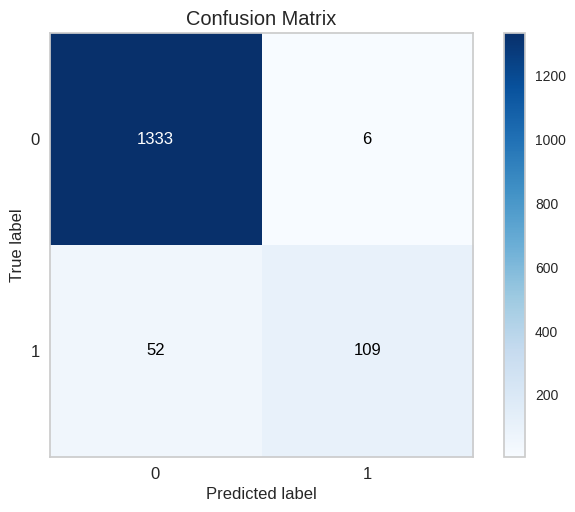

In [95]:
y_pred7 = lr7.predict(X7_test)
skplt.metrics.plot_confusion_matrix(y7_test, y_pred7)
plt.show()

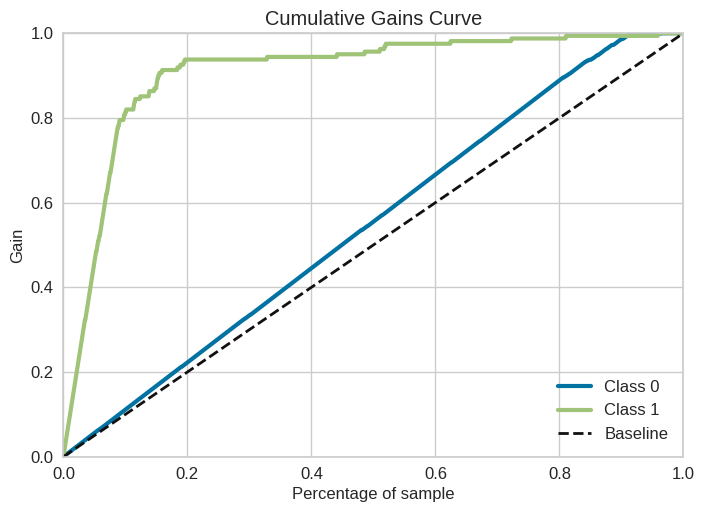

In [96]:
y_probas17 = lr7.predict_proba(X7_test)
skplt.metrics.plot_cumulative_gain(y7_test, y_probas17)
plt.show()

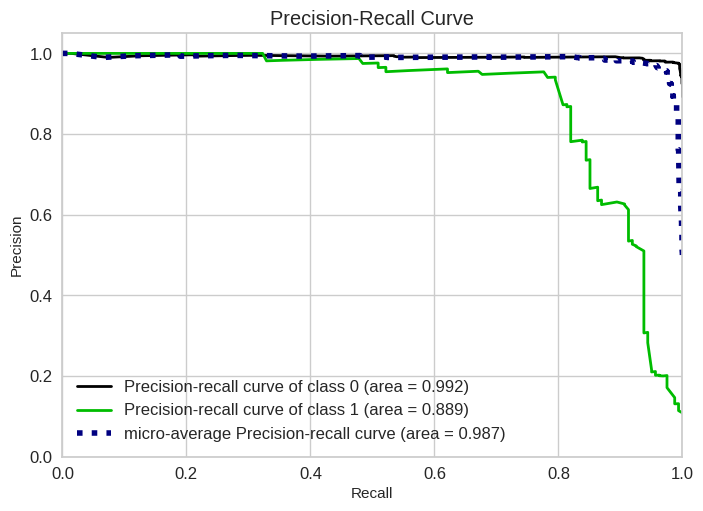

In [97]:
skplt.metrics.plot_precision_recall(y7_test, y_probas17)
plt.show()

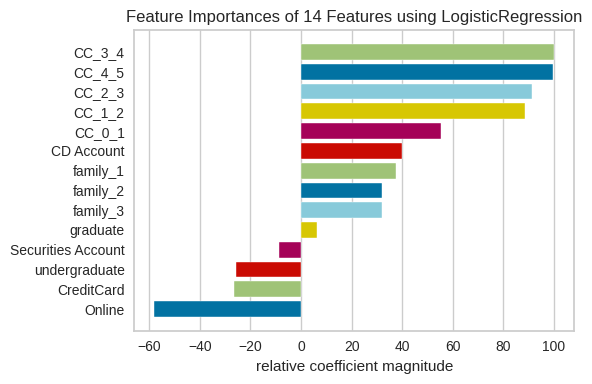

<Axes: title={'center': 'Feature Importances of 14 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [98]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr7)
fi_viz.fit(X7, y7)
fi_viz.poof()

In [ ]:
### Naive Bayes

In [99]:
nb7 = GaussianNB(priors=None, var_smoothing=1e-09)
print(nb7.fit(X7_train, y7_train))
print(nb7.score(X7_test, y7_test))
print(nb7.predict(X7_test.iloc[[0]]))
print(nb7.predict_proba(X7_test.iloc[[0]]))
print(nb7.predict_log_proba(X7_test.iloc[[0]]))

GaussianNB()
0.8686666666666667
[0]
[[0.99472795 0.00527205]]
[[-0.005286   -5.24533615]]


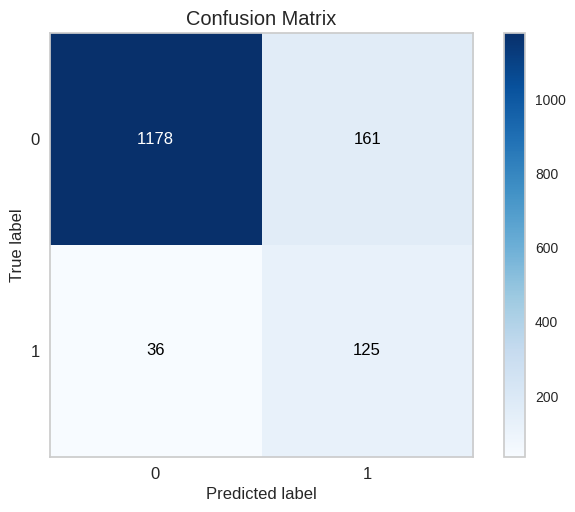

In [100]:
y_pred27 = nb7.predict(X7_test)
skplt.metrics.plot_confusion_matrix(y7_test, y_pred27)
plt.show()

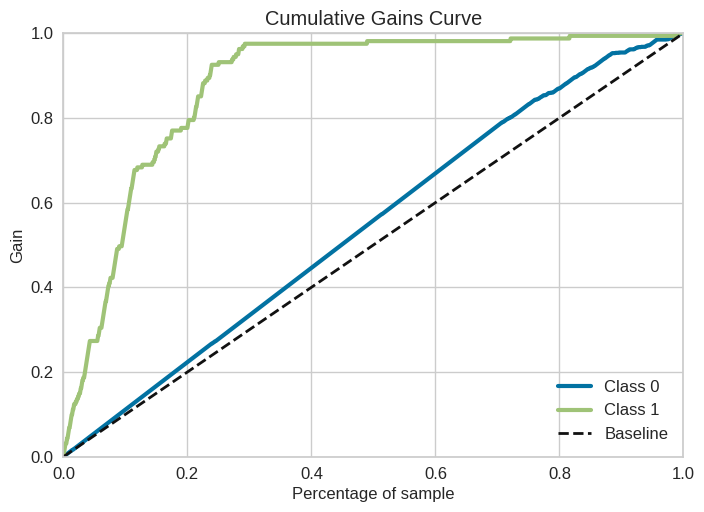

In [101]:
y_probas27 = nb7.predict_proba(X7_test)
skplt.metrics.plot_cumulative_gain(y7_test, y_probas27)
plt.show()

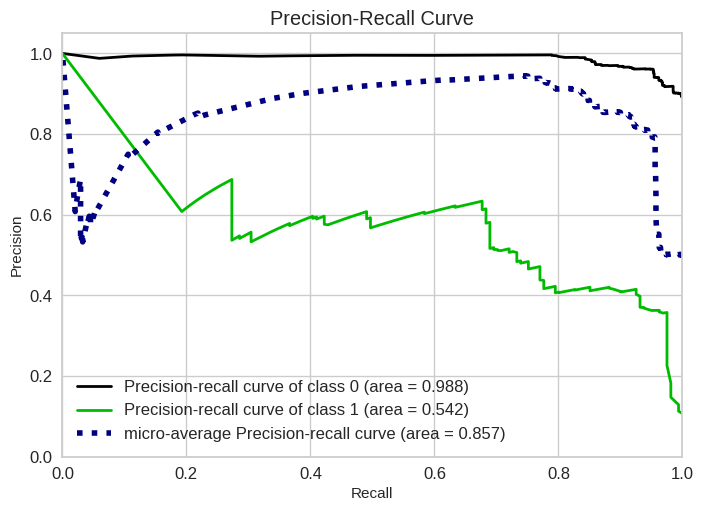

In [102]:
skplt.metrics.plot_precision_recall(y7_test, y_probas27)
plt.show()

In [ ]:
### KNN

In [103]:
knc7 = KNeighborsClassifier(algorithm='auto',  leaf_size=30, metric='minkowski',  metric_params=None, n_jobs=1, n_neighbors=5,  p=2, weights='uniform')
print(knc7.fit(X7_train, y7_train))
print(knc7.score(X7_test, y7_test))
print(knc7.predict(X7_test.iloc[[0]]))
print(knc7.predict_proba(X7_test.iloc[[0]]))

KNeighborsClassifier(n_jobs=1)
0.952
[1]
[[0.4 0.6]]


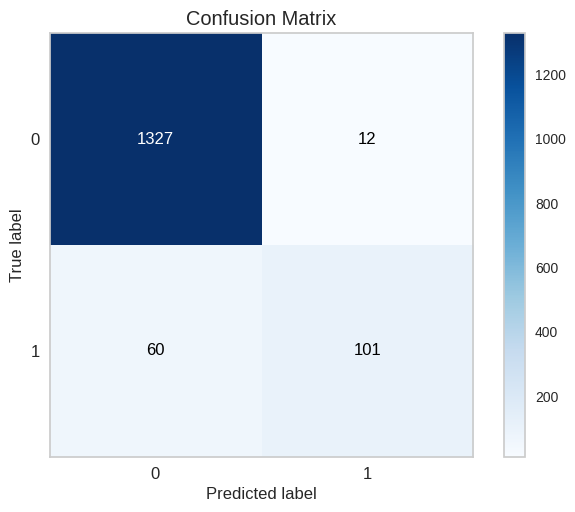

In [104]:
y_pred37 = knc7.predict(X7_test)
skplt.metrics.plot_confusion_matrix(y7_test, y_pred37)
plt.show()

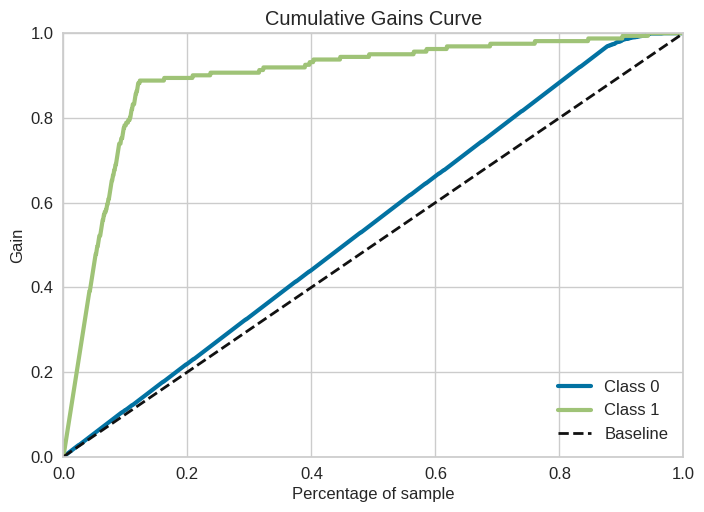

In [105]:
y_probas37= knc7.predict_proba(X7_test)
skplt.metrics.plot_cumulative_gain(y7_test, y_probas37)
plt.show()

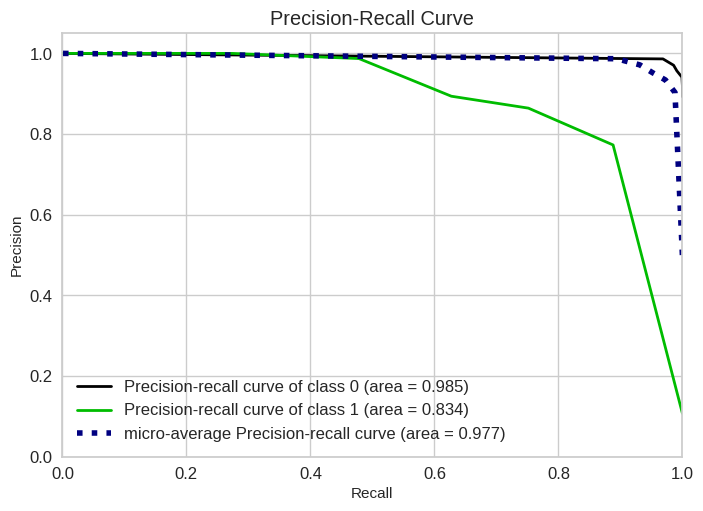

In [106]:
skplt.metrics.plot_precision_recall(y7_test, y_probas37)
plt.show()

In [ ]:
# Additional EDA Analysis
##### What are those Main Characteristics that has a higher association with Loan Fact and what the strength of association ?

#Here is a subset of the initial data frame with just characteristics that have a positive association with 'Personal Loan' and the size of association is higher than moderate

In [107]:
exp_df = bank_per_loan_df[['Income', 'CCAvg', 'Family', 'Education', 'CD Account', 'Personal Loan']].copy()
exp_df

Income  CCAvg  Family  Education  CD Account  Personal Loan
0         49    1.6       4          1           0              0
1         34    1.5       3          1           0              0
2         11    1.0       1          1           0              0
3        100    2.7       1          2           0              0
4         45    1.0       4          2           0              0
...      ...    ...     ...        ...         ...            ...
4995      40    1.9       1          3           0              0
4996      15    0.4       4          1           0              0
4997      24    0.3       2          3           0              0
4998      49    0.5       3          2           0              0
4999      83    0.8       3          1           0              0

[5000 rows x 6 columns]

In [ ]:
#Let's apply logistic regression on this subset

In [108]:
exp_df['intercept'] = 1

log_mod_5 = sm.Logit(exp_df['Personal Loan'], exp_df[['intercept','Income', 'CCAvg', 'Family', 'Education', 'CD Account']]).fit()

Optimization terminated successfully.
         Current function value: 0.134028
         Iterations 9


In [ ]:
#Get P-Values for each variable

In [109]:
log_mod_5.pvalues[1:]

Income        1.566029e-104
CCAvg          4.874608e-03
Family         2.077798e-21
Education      2.510413e-53
CD Account     1.430612e-28
dtype: float64

In [ ]:
##### All p-values are less than 0.05

In [ ]:
#Get Odds for each variable

In [111]:
odds_exp = np.exp(log_mod_5.params)
odds_exp

intercept      0.000001
Income         1.056149
CCAvg          1.114021
Family         1.991687
Education      5.352775
CD Account    12.021671
dtype: float64

In [112]:
odds_df = pd.DataFrame(odds_exp[1:], columns = ["Odds"])
odds_df

Odds
Income       1.056149
CCAvg        1.114021
Family       1.991687
Education    5.352775
CD Account  12.021671

In [113]:
odds_df['odds_increment'] = odds_df.Odds
odds_df

Odds  odds_increment
Income       1.056149        1.056149
CCAvg        1.114021        1.114021
Family       1.991687        1.991687
Education    5.352775        5.352775
CD Account  12.021671       12.021671

In [ ]:
#Here is the data frame with Main Characteristics ...

#... and their odds to increase the chance to sell Personal Loan with increase value of variable by one unit

In [114]:
odds_df.sort_values('Odds', ascending = False)

Odds  odds_increment
CD Account  12.021671       12.021671
Education    5.352775        5.352775
Family       1.991687        1.991687
CCAvg        1.114021        1.114021
Income       1.056149        1.056149

In [ ]:
##### The chart demonstrating the proportion of strength of association between Personal Loan and values of Main Characteristic

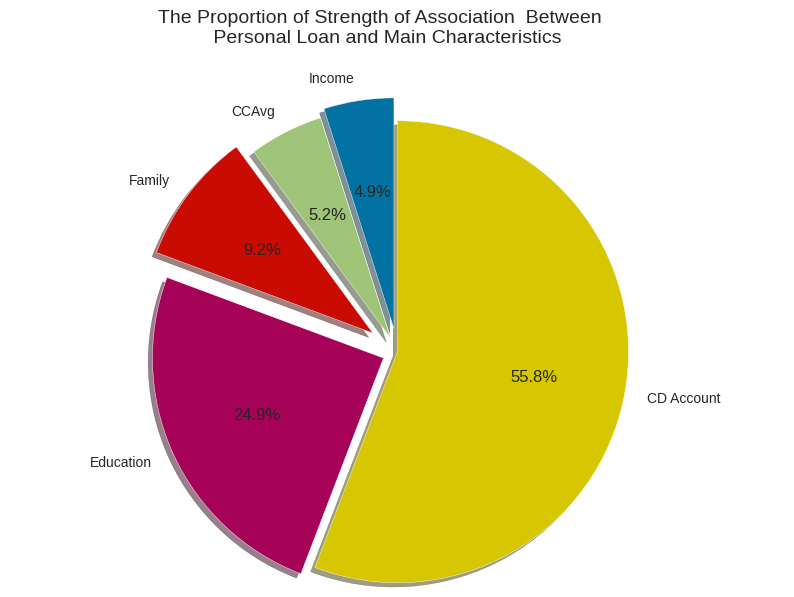

In [115]:
sizes = odds_df.Odds.tolist()# list of sizes of slices
labels = odds_df.index.tolist() # list of labels
explode = (0.15, 0.1, 0.2, 0.1, 0)  # "explode" the 2nd and 3rd slices
fig = plt.figure(figsize=(10, 5))
plt.suptitle('The Proportion of Strength of Association  Between  \n Personal Loan and Main Characteristics', \
          fontsize = 14, y = 1.18)
plt.axis('equal'); # set aspect ration as equal to make sure the pie is drawn as a circle
plt.pie(sizes, labels = labels, explode = explode, radius = 1.5, \
        shadow = True, startangle = 90,autopct= '%1.1f%%')

plt.savefig('proportion_of_stregth_of_association1.png', bbox_inches = 'tight');

In [ ]:
##### What the Segments of Main Characteristics, that has a higher strength of association with Personal Loan?

In [ ]:
#Lets get a closer look at each of Main Characteristics

In [ ]:
#### CD Account


#Here is the distribution of "Personal Loan" values among groups of "CD Account" values

In [116]:
series_cd = exp_df[exp_df['Personal Loan'] == 1]['CD Account'].value_counts()
series_cd

CD Account
0    340
1    140
Name: count, dtype: int64

In [117]:
series_cdd = exp_df[exp_df['Personal Loan'] == 0]['CD Account'].value_counts()
series_cdd

CD Account
0    4358
1     162
Name: count, dtype: int64

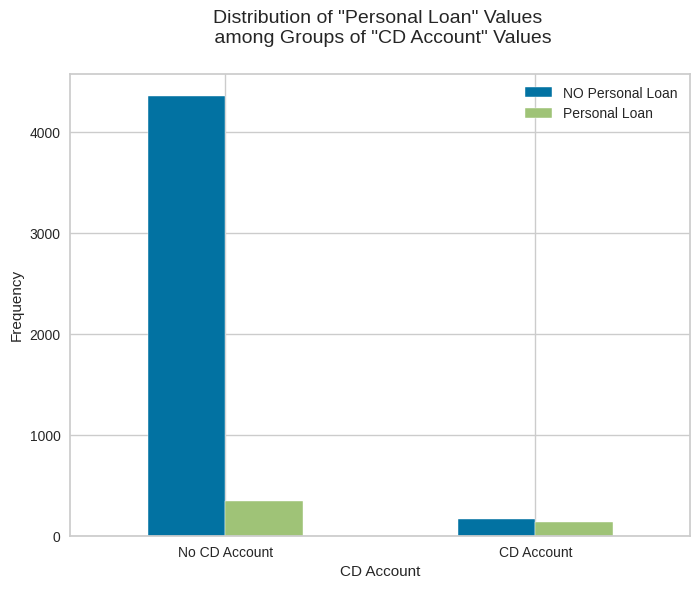

In [118]:
pd.DataFrame(dict( NO_PL= series_cdd, PL= series_cd,)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xticks(np.arange(2),('No CD Account','CD Account'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Distribution of "Personal Loan" Values \n among Groups of "CD Account" Values', fontsize = 14, y = 1.05);
plt.savefig('distribution_of_PL_among_CDacc1.png', bbox_inches = 'tight')

In [ ]:
##### Observation
#We may say that the proportion of persons who has Personal Loan among them who has CD account with The Bank is quit high.


#Let's see the exact number of proportion of "loanees" among "depositees"

In [119]:
series = exp_df[exp_df['CD Account'] == 1]['Personal Loan'].value_counts()
series

Personal Loan
0    162
1    140
Name: count, dtype: int64

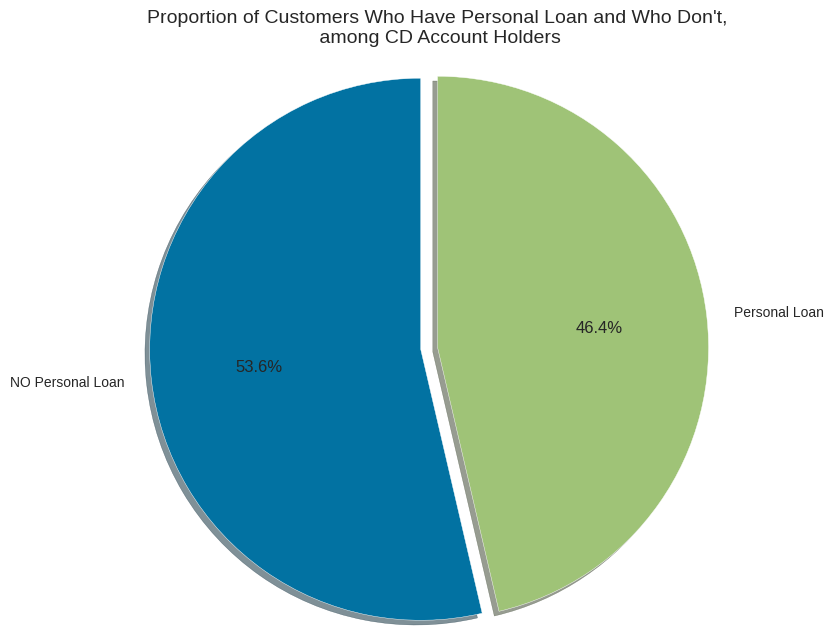

In [120]:
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.savefig('Proportion_of_loanees_among_depositees1.png', bbox_inches = 'tight');

In [ ]:
##### Conclusion


    #46.4% of CD Account Holders have Perconal Loan.
   # For 'CD Account' characteristic - the main segment to sell Personal Loan is the people who already have a CD Account with the Bank.
    #Target value of 'CD Account' variable = 1

In [ ]:
#### Education


#Here is the distribution of "Personal Loan" values among groups of "Education" values

In [121]:
series_ed = exp_df[exp_df['Personal Loan'] == 1]['Education'].value_counts()
series_ed

Education
3    205
2    182
1     93
Name: count, dtype: int64

In [122]:
series_edd = exp_df[exp_df['Personal Loan'] == 0]['Education'].value_counts()
series_edd

Education
1    2003
3    1296
2    1221
Name: count, dtype: int64

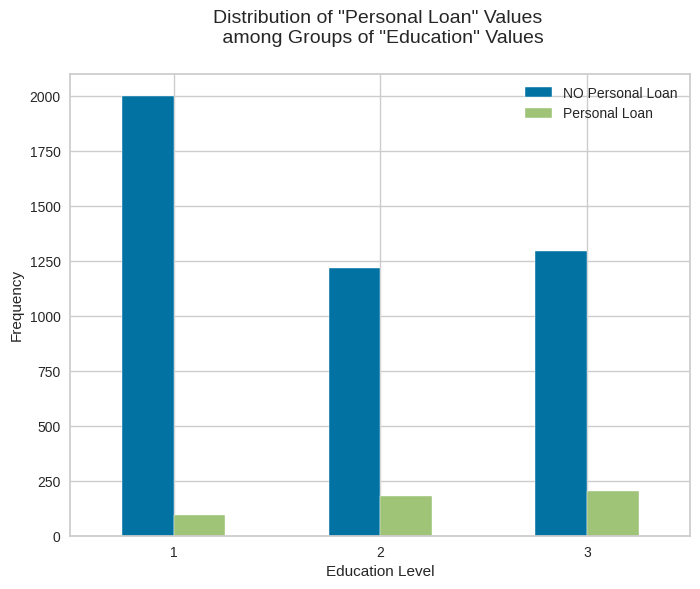

In [123]:
pd.DataFrame(dict(NO_PL= series_edd, PL= series_ed)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xlabel('Education Level')
plt.xticks(np.arange(3),('1','2','3'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'))
plt.title('Distribution of "Personal Loan" Values \n among Groups of "Education" Values', fontsize = 14, y = 1.05);
plt.savefig('distribution_PL_among_Education1.png', bbox_inches = 'tight')

In [ ]:
###### Observations

#We may say that the proportion of persons who has Personal Loan among them who has Third and Second Level of Education is higher than proportion among people who has First level of Edication.

#Let's see the exact numbers of proportions.

In [124]:
series_edu_3 = exp_df[exp_df['Education'] == 3]['Personal Loan'].value_counts()
series_edu_3

Personal Loan
0    1296
1     205
Name: count, dtype: int64

In [125]:
series_edu_2 = exp_df[exp_df['Education'] == 2]['Personal Loan'].value_counts()
series_edu_2

Personal Loan
0    1221
1     182
Name: count, dtype: int64

In [126]:
series_edu_1 = exp_df[exp_df['Education'] == 1]['Personal Loan'].value_counts()
series_edu_1

Personal Loan
0    2003
1      93
Name: count, dtype: int64

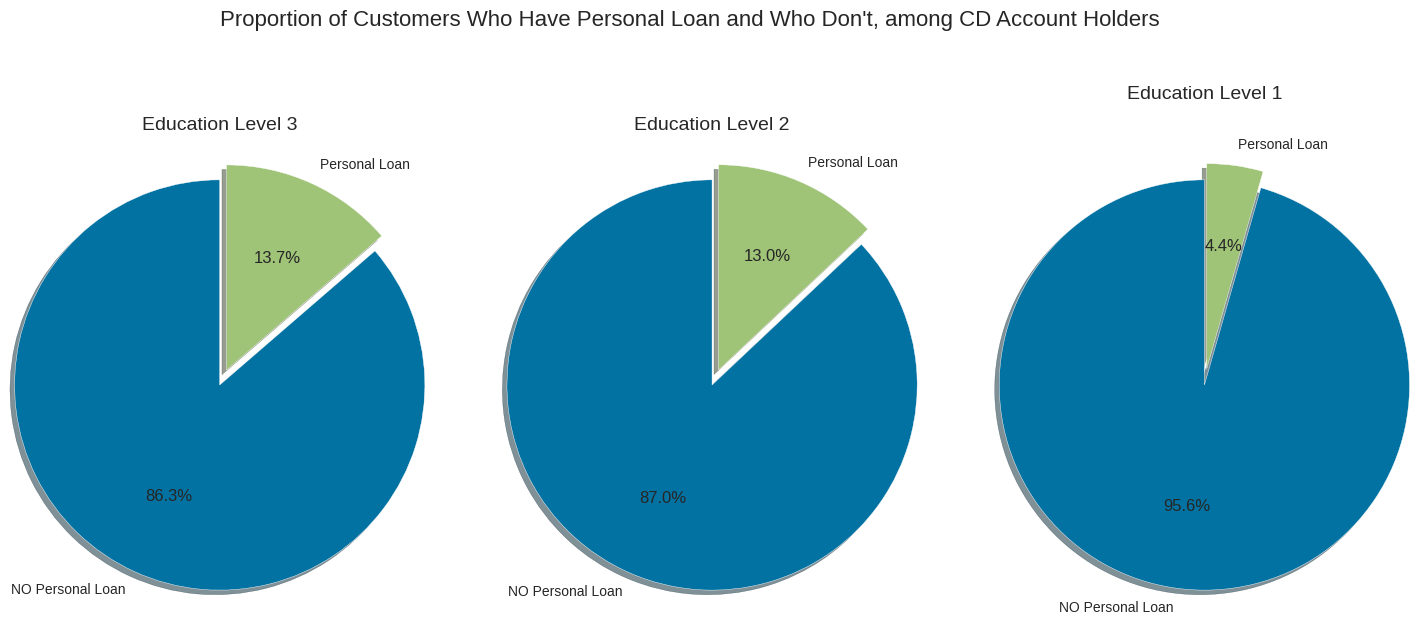

In [127]:
labels = ['NO Personal Loan','Personal Loan']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,6),subplot_kw=dict(aspect="equal"))
plt.axis('equal')
ax1.pie(series_edu_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Education Level 3',fontsize = 14, y = 1.1)

ax2.pie(series_edu_2, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Education Level 2', fontsize = 14, y = 1.1)

ax3.pie(series_edu_1, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90);
ax3.set_title('Education Level 1',fontsize = 14, y = 1.1)

plt.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, among CD Account Holders', \
             fontsize = 16, y = 1.12);

plt.savefig('Proportion_of_PL_among edu_levels1.png', bbox_inches = 'tight');

In [128]:
series_edu_4 = exp_df[exp_df['Personal Loan'] == 1]['Education'].value_counts()
series_edu_4

Education
3    205
2    182
1     93
Name: count, dtype: int64

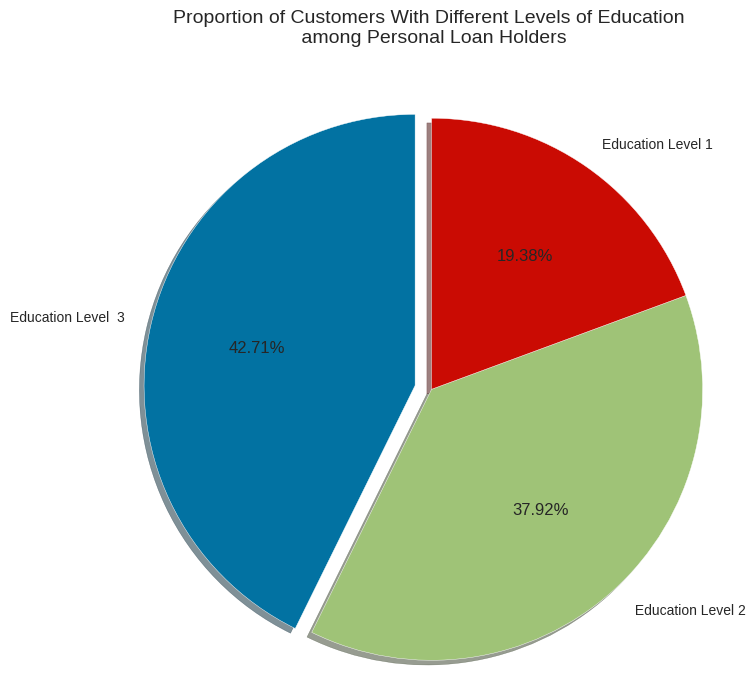

In [129]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(series_edu_4, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL1.png', bbox_inches = 'tight');

In [ ]:
##### Conclusion


    #42.7% and 37.9% of persons who have Personal Loan, have Education level 3 and Level 2 respectively.
    #For 'Education' characteristic - the main segments to sell Personal Loan is the people who have Second and Third levels of education
    #Target values of 'Education' variable are 3 and 2 in descending order of priority

In [ ]:
#### Family

#Here is the distribution of "Personal Loan" values among groups of "Family" valuesx

In [130]:
series_fam = exp_df[exp_df['Personal Loan'] == 1]['Family'].value_counts()
series_fam

Family
4    134
3    133
1    107
2    106
Name: count, dtype: int64

In [131]:
series_famm = exp_df[exp_df['Personal Loan'] == 0]['Family'].value_counts()
series_famm

Family
1    1365
2    1190
4    1088
3     877
Name: count, dtype: int64

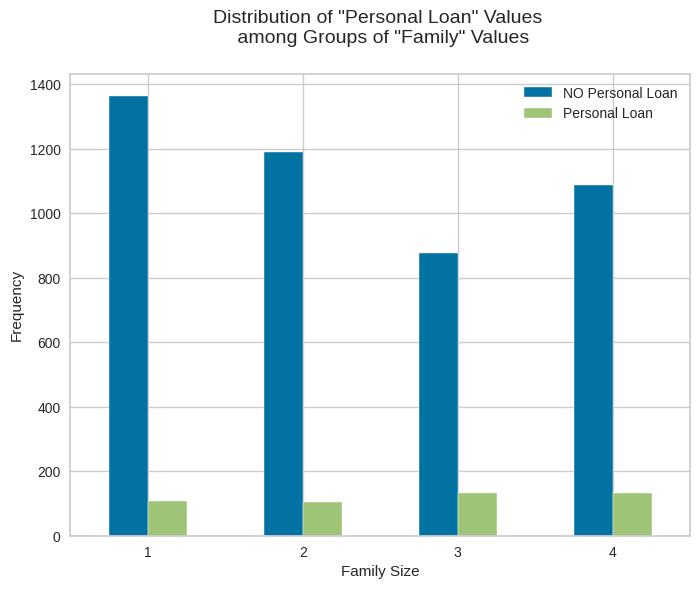

In [132]:
pd.DataFrame(dict( NO_PL = series_famm, PL= series_fam,)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xlabel('Family Size')
plt.xticks(np.arange(4),('1', '2', '3', '4'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Distribution of "Personal Loan" Values \n among Groups of "Family" Values', fontsize = 14, y = 1.05);
plt.savefig('distribution_of_PL_among_family1.png', bbox_inches = 'tight')

In [ ]:
##### Observation

#We may say that the proportion of persons who has Personal Loan among them who has Family size 2 and 3 is highest proportion.


#Let's see the exact number of that proportions of "loanees" among "depositees"

In [133]:
series_fam_3 = exp_df[exp_df['Family'] == 3]['Personal Loan'].value_counts()
series_fam_3

Personal Loan
0    877
1    133
Name: count, dtype: int64

In [134]:
series_fam_4 = exp_df[exp_df['Family'] == 4]['Personal Loan'].value_counts()
series_fam_4

Personal Loan
0    1088
1     134
Name: count, dtype: int64

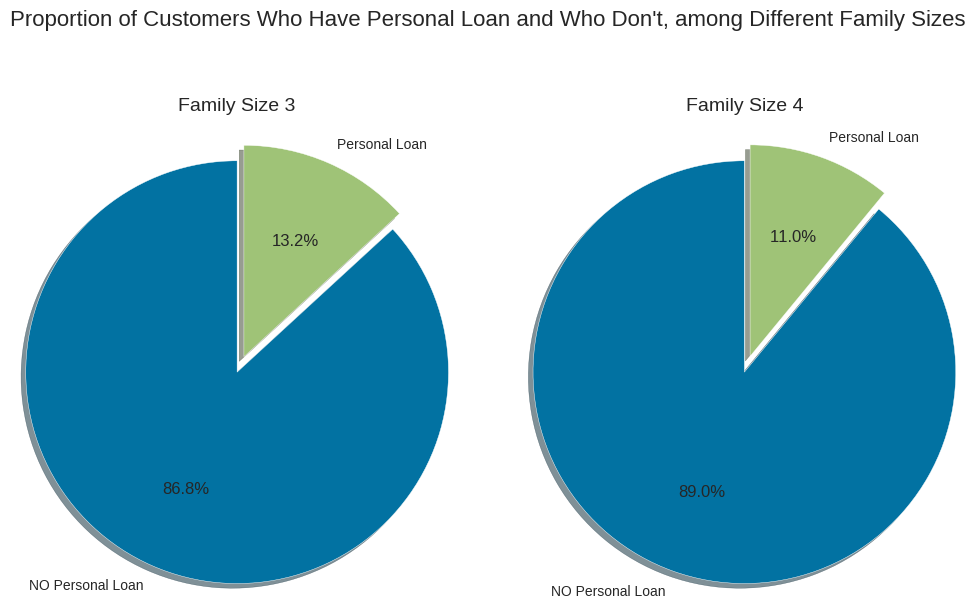

In [135]:
labels = ['NO Personal Loan','Personal Loan']

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6),subplot_kw=dict(aspect="equal"))
fig.suptitle('Proportion of Customers Who Have Personal Loan and Who Don\'t, \
among Different Family Sizes', fontsize = 16, y = 1.1, x = 0.51);

ax1.pie(series_fam_3, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax1.set_title('Family Size 3',fontsize = 14, y = 1.1)

ax2.pie(series_fam_4, labels = labels, autopct= '%1.1f%%', shadow = True,explode = (0, 0.1), radius = 1.25, startangle = 90)
ax2.set_title('Family Size 4', fontsize = 14, y = 1.1);

plt.savefig('Proportion_of_PL_among_family_levels1.png', bbox_inches = 'tight');

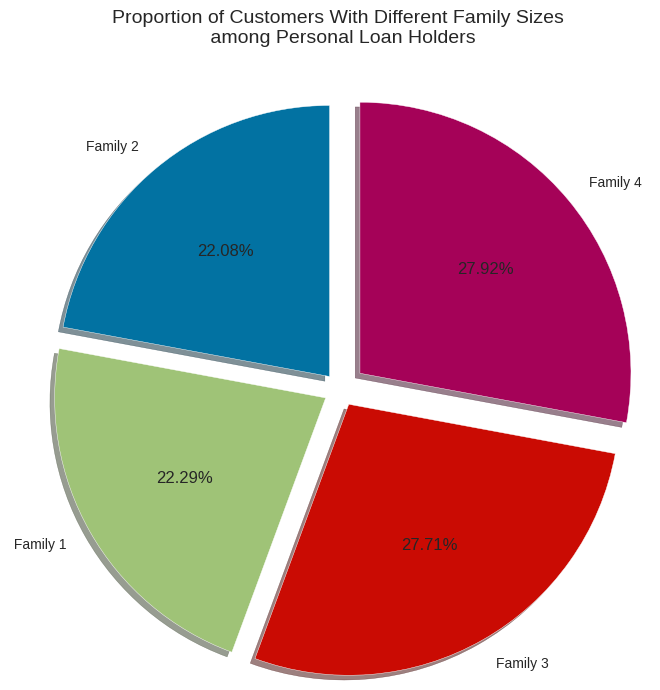

In [136]:
plt.axis('equal')
plt.title('Proportion of Customers With Different Family Sizes \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Family 2',' Family 1','Family 3','Family 4']
plt.pie(series_fam.sort_values(ascending = True), labels = labels, \
        autopct= '%1.2f%%', shadow = True, explode = (0.1, 0.1, 0.1,0.15), radius = 1.6, startangle = 90);
plt.savefig('Proportion_family_size_among_PL1.png', bbox_inches = 'tight');

In [ ]:
##### Conclusion

    #27.9% and 27.7% of persons who have Personal Loan, have Family size 4 and Level 3 respectively.

    #For 'Family' characteristic - the main segments to sell Personal Loan is the people who have Family Size 3 and 4.

    #Target values of 'Family' variable are 3 and 4 in descending order of priority, since the proportion of people who has Personal Loan is the higthest with Family Size 3 - 13,2%.

In [ ]:
#### CCAvg

#Here is the distribution of "CCAvg" values among Personal Loan holders and among whole population.

In [137]:
series_cca = exp_df[exp_df['Personal Loan'] == 1]['CCAvg'].value_counts()
series_cca

CCAvg
3.00    19
4.10    13
3.40    13
3.10    12
4.20    11
        ..
3.33     1
5.33     1
9.30     1
6.33     1
2.75     1
Name: count, Length: 95, dtype: int64

In [138]:
series_cca.describe()

count    95.000000
mean      5.052632
std       3.349717
min       1.000000
25%       2.000000
50%       5.000000
75%       7.000000
max      19.000000
Name: count, dtype: float64

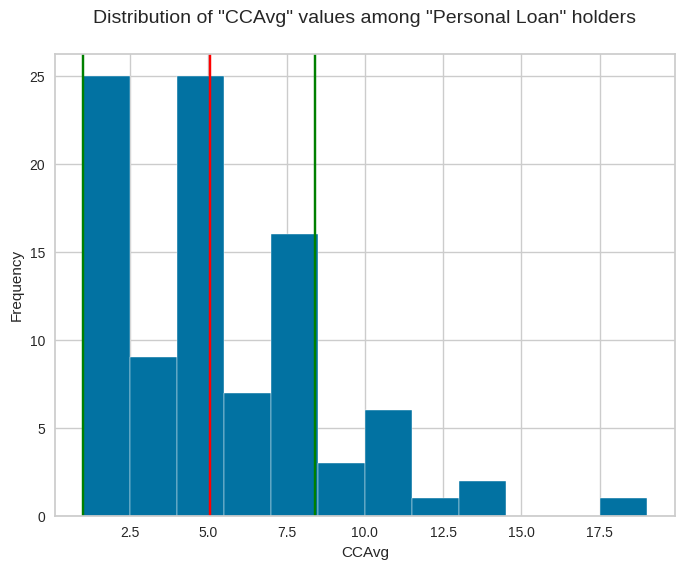

In [139]:
width = 1.5 #wdth of bins in histogram - play with it to find good point for groupping
series_cca.plot.hist(bins = np.arange(series_cca.min(), series_cca.max() + width, width ), figsize = (8,6))
plt.xlabel('CCAvg')
plt.axvline(x = series_cca.mean(), color = 'red')
plt.axvline(x = series_cca.min(), color = 'green')
plt.axvline(x = series_cca.mean() + series_cca.std(), color = 'green')
plt.title('Distribution of "CCAvg" values among "Personal Loan" holders', fontsize = 14, y = 1.05);
plt.savefig('Distrib_ccavg_among_PL1.png', bbox_inches = 'tight')

In [ ]:
##### Observation

#We may say that CCAvg characteristics values can be devided in three groups in descending order of priority consider its frequncy among Personal Loan holder:

  #  Group I: 1 < CCAvg < 2.5
  #  Group II: 4 < CCAvg < 5.5
   # Group III: 7 < CCAvg < 8.5

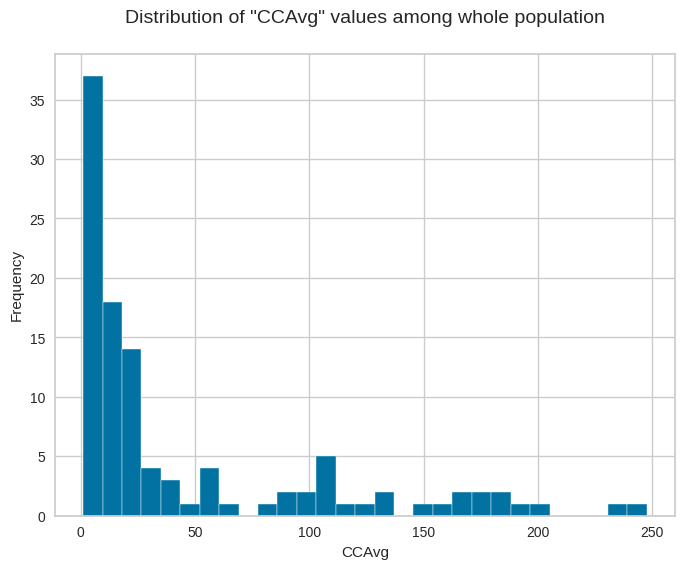

In [140]:
series_ccaa = exp_df['CCAvg'].value_counts()
width = 8.5 #wdth of bins in histogram - play with it to find good point for groupping
series_ccaa.plot.hist(bins = np.arange(series_ccaa.min(), series_ccaa.max() + width, width ), figsize = (8,6))
plt.xlabel('CCAvg')
plt.title('Distribution of "CCAvg" values among whole population', fontsize = 14, y = 1.05);
plt.savefig('Distrib_ccavg_among_population1.png', bbox_inches = 'tight')

In [ ]:
##### Observation
We may say, that all our groups of 'CCAvg' defined as priority groups to sell Personal Loan, lies inside segment with pretty high frequency among whole population.

##### Conclusion

Target groups of 'CCAvg' characteristic is in descending order of priority:

    Group I: 1 < CCAvg < 2.5
    Group II: 4 < CCAvg < 5.5
    Group III: 7 < CCAvg < 8.5


In [ ]:
#### Income

Here is the distribution of "Income" values among Personal Loan holders and among whole population

In [141]:
series_inc = exp_df[exp_df['Personal Loan'] == 1]['Income'].value_counts()
series_inc

Income
130    11
182    11
135    10
158    10
179     9
       ..
201     1
82      1
90      1
151     1
81      1
Name: count, Length: 102, dtype: int64

In [142]:
series_inc.describe()


count    102.000000
mean       4.705882
std        2.723525
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       11.000000
Name: count, dtype: float64

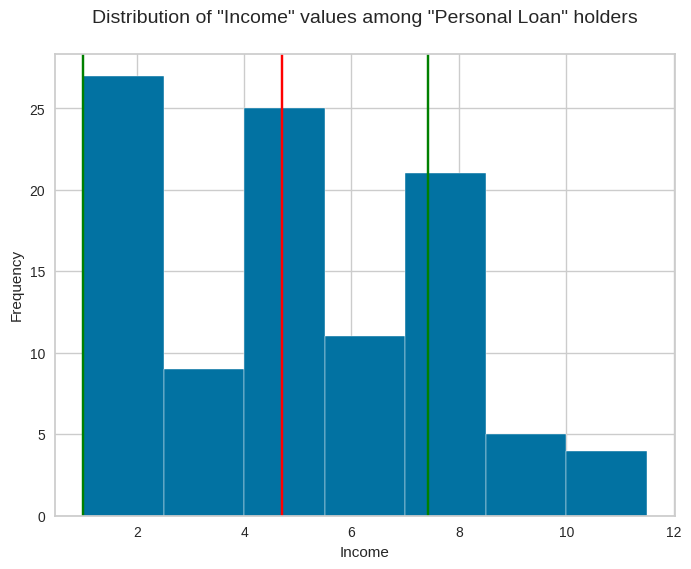

In [143]:
width = 1.5 #wdth of bins in histogram - play with it to find good point for groupping
series_inc.plot.hist(bins = np.arange(series_inc.min(), series_inc.max() + width, width ), figsize = (8,6))
plt.xlabel('Income')
plt.axvline(x = series_inc.mean(), color = 'red')
plt.axvline(x = series_inc.min(), color = 'green')
plt.axvline(x = series_inc.mean() + series_inc.std(), color = 'green')
plt.title('Distribution of "Income" values among "Personal Loan" holders', fontsize = 14, y = 1.05);
plt.savefig('Distrib_income_among_PL1.png', bbox_inches = 'tight')

In [ ]:
##### Observation

We may say that 'Income' characteristic values can be devided in three groups in descending order of priority consider its frequncy among Personal Loan holder:

    Group I: 1 < Income < 2.5
    Group II: 4 < Income < 5.5
    Group III: 7 < Income < 8.5

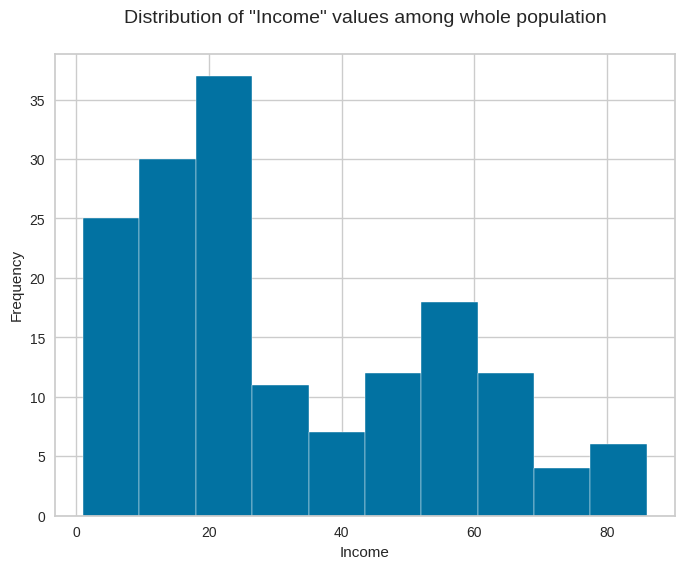

In [144]:
series_incc = exp_df['Income'].value_counts()
width = 8.5 #wdth of bins in histogram - play with it to find good point for groupping
series_incc.plot.hist(bins = np.arange(series_incc.min(), series_incc.max() + width, width ), figsize = (8,6))
plt.xlabel('Income')
plt.title('Distribution of "Income" values among whole population', fontsize = 14, y = 1.05);
plt.savefig('Distrib_income_among_population1.png', bbox_inches = 'tight')

In [ ]:
##### Observation
We may say, that all our groups of 'Income' defined as priority groups to sell Personal Loan, lies inside segment with pretty high frequency among whole population.

##### Conclusion

Target groups of 'Income' characteristic is:

    Group I: 1 < Income < 2.5
    Group II: 4 < Income < 5.5
    Group III: 7 < Income < 8.5

In [ ]:
##### Summary Conclusion

We made the simple step-by-step analysis of customer's characteristics to identify patterns to effectively choose the subset of customers who have a higher probability to buy new product "Personal Loan" from The Bank. We performed the following steps:

    We check all twelve characteristics whether or not each of them has an association with the fact the product been sold.
    We find FIVE main characteristics that have higher than moderate strength of association with the product.
    We analyze main characteristics and get segments in each with different strength of association with the product.